<a href="https://colab.research.google.com/github/Icamtu/ML/blob/main/kamaleswar_mohanta_1F_Credit_Card_Acquisition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Data Link https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction

# About Dataset

A Credit Card Dataset for Machine Learning!

# Context

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Credit score cards are based on historical data.Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
Predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. 

# Task

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. 

# Project Objective
Background Goal, Number of Resources, Business Impact, Time Taken

# **Importing Libraries**

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [ ]:
# application_record reading
application_record=pd.read_csv('https://raw.githubusercontent.com/Icamtu/ML/main/application_record.csv')
application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
# credit_record reading
credit_record=pd.read_csv('https://raw.githubusercontent.com/Icamtu/ML/main/credit_record.csv')
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


# Data Exploration and Validation

## application_record

In [ ]:
# application_record information about dtypes, range, entries,variables,memory usage
application_record.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
application_record.shape

(438557, 18)

In [ ]:
# No of unique records
application_record.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [ ]:
# No OF Duplicate ID
application_record['ID'].duplicated().value_counts()

False    438510
True         47
Name: ID, dtype: int64

47 RECORDS ARE DUPLICATEE , SO NEED TO GET RID OF IT

In [ ]:
#drop 47 duplicate records from ID
application_record=application_record.drop_duplicates(subset=['ID'])

In [ ]:
application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0



## **credit_record**

In [ ]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
# number of rows and columns
credit_record.shape

(1048575, 3)

In [ ]:
# No of Unique records
credit_record.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

In [ ]:
credit_record['ID'].duplicated().value_counts()

True     1002590
False      45985
Name: ID, dtype: int64

1002590 NO OF RECORDS INDICATE DUPLICATION. SO NEED TO ANALYSE DATA SET

In [ ]:
credit_record.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


so no of record is repeated from account opening date to latest date. to get rid of this type of duplicacy need to groupby ID to find account length(ie age of account) & with risk factor from staus.

how many months account has been open for which can be a parameter to co-relate with risky accounts

In [ ]:
#Finding account opening period
record=pd.DataFrame(credit_record.groupby(["ID"])["MONTHS_BALANCE"].min())
record


,MONTHS_BALANCE
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59
...,...
5150482,-28
5150483,-17
5150484,-12


In [ ]:
# Renaming it to Account Length
record=record.rename(columns={'MONTHS_BALANCE':'Account_Length'}) 
record

,Account_Length
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59
...,...
5150482,-28
5150483,-17
5150484,-12


In [ ]:
# Removing Negetive value
record['Account_Length']=-record['Account_Length']
record

,Account_Length
ID,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59
...,...
5150482,28
5150483,17
5150484,12


In [ ]:
#Merging Account Length with application_record
application_record=pd.merge(application_record,record,how="inner",on="ID") 
application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account_Length
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,11
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,23
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,32
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,9


## Finding Target variable

From credit records 'STATUS' ,target variable can be derived as X, C & 0 are not Risky,but 1,2,3,4,5 are Risky

In [ ]:
# Creating Target Variable
credit_record['Target']=credit_record['STATUS']
credit_record['Target'].replace('X', 0, inplace=True)
credit_record['Target'].replace('C', 0, inplace=True)
credit_record['Target'].replace('1', 0, inplace=True)
credit_record['Target']=credit_record['Target'].astype(int) #converting dtypes STR TO int
credit_record.loc[credit_record['Target']>1,'Target']=1


In [ ]:
print(credit_record['Target'].value_counts())

0    1045471
1       3104
Name: Target, dtype: int64


In [ ]:
#Creating df where high Risk is Target=1
target_df=pd.DataFrame(credit_record.groupby(['ID'])['Target'].max()).reset_index()
target_df

,ID,Target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


In [ ]:
target_df['Target'].value_counts()

0    45318
1      667
Name: Target, dtype: int64

In [ ]:
# merging(Inner join:do not need null target value) target_df with credit_application_record on ID as Target variable
credit_application_record=pd.merge(left=application_record,right=target_df, how='inner', on=['ID'])
credit_application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account_Length,Target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,11,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,23,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,32,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,9,1


In [ ]:
credit_application_record['Target'].value_counts()

0    35841
1      616
Name: Target, dtype: int64

## credit_application_record details

In [ ]:
# credit_application_record information about dtypes, range, entries,variables,memory usage
credit_application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [ ]:
credit_application_record.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'House',
                         'CNT_CHILDREN':'NoOfChild','AMT_INCOME_TOTAL':'IncomeTotal',
                         'NAME_EDUCATION_TYPE':'Education','NAME_FAMILY_STATUS':'FamilyType',
                        'NAME_HOUSING_TYPE':'HouseType','DAYS_BIRTH':'AgebyDay','DAYS_EMPLOYED':'EmpExpbyDay','FLAG_MOBIL':'mobile','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'IncomeType','FLAG_WORK_PHONE':'WkPhone',
                         'FLAG_PHONE':'Phone','CNT_FAM_MEMBERS':'FamSize',
                        'OCCUPATION_TYPE':'OccupationType'
                        },inplace=True)


In [ ]:
# number of rows and columns
credit_application_record.shape

(36457, 20)

In [ ]:
credit_application_record.nunique()

ID                36457
Gender                2
Car                   2
House                 2
NoOfChild             9
IncomeTotal         265
IncomeType            5
Education             5
FamilyType            5
HouseType             6
AgebyDay           7183
EmpExpbyDay        3640
mobile                1
WkPhone               2
Phone                 2
email                 2
OccupationType       18
FamSize              10
Account_Length       61
Target                2
dtype: int64

In [ ]:
# sum of null values in each variables
credit_application_record.isnull().sum()

ID                    0
Gender                0
Car                   0
House                 0
NoOfChild             0
IncomeTotal           0
IncomeType            0
Education             0
FamilyType            0
HouseType             0
AgebyDay              0
EmpExpbyDay           0
mobile                0
WkPhone               0
Phone                 0
email                 0
OccupationType    11323
FamSize               0
Account_Length        0
Target                0
dtype: int64

note:OCCUPATION_TYPE Has NULL value

In [ ]:
# any suspicious variables
credit_application_record.columns.values

array(['ID', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'IncomeType', 'Education', 'FamilyType', 'HouseType', 'AgebyDay',
       'EmpExpbyDay', 'mobile', 'WkPhone', 'Phone', 'email',
       'OccupationType', 'FamSize', 'Account_Length', 'Target'],
      dtype=object)

In [ ]:
#Display the variable formats
credit_application_record.dtypes

ID                  int64
Gender             object
Car                object
House              object
NoOfChild           int64
IncomeTotal       float64
IncomeType         object
Education          object
FamilyType         object
HouseType          object
AgebyDay            int64
EmpExpbyDay         int64
mobile              int64
WkPhone             int64
Phone               int64
email               int64
OccupationType     object
FamSize           float64
Account_Length      int64
Target              int64
dtype: object

note:Need to convert FamSize & Account Length  into int dtypes
Gender,Car,House,mobile,wkPhone,Phone,email to int dtypes from y/n

In [ ]:
#Print the first 10 observations
credit_application_record.head(10)

,ID,Gender,Car,House,NoOfChild,IncomeTotal,IncomeType,Education,FamilyType,HouseType,AgebyDay,EmpExpbyDay,mobile,WkPhone,Phone,email,OccupationType,FamSize,Account_Length,Target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,38,0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,20,0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,16,0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,17,0


In [ ]:
#Print the last 10 observations
credit_application_record.tail(10)

,ID,Gender,Car,House,NoOfChild,IncomeTotal,IncomeType,Education,FamilyType,HouseType,AgebyDay,EmpExpbyDay,mobile,WkPhone,Phone,email,OccupationType,FamSize,Account_Length,Target
36447,5149145,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-10952,-3577,1,1,0,0,Laborers,2.0,25,1
36448,5149158,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-10952,-3577,1,1,0,0,Laborers,2.0,28,1
36449,5149190,M,Y,N,1,450000.0,Working,Higher education,Married,House / apartment,-9847,-502,1,0,1,1,Core staff,3.0,11,1
36450,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,1,0,0,0,NaN,2.0,21,1
36451,5149775,F,Y,Y,0,130500.0,Working,Secondary / secondary special,Married,House / apartment,-16137,-9391,1,0,1,0,Laborers,2.0,19,1
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,11,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,23,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,32,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,9,1
36456,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,13,1


In [ ]:
#Print the random 10 observations
credit_application_record.sample(n=10)

,ID,Gender,Car,House,NoOfChild,IncomeTotal,IncomeType,Education,FamilyType,HouseType,AgebyDay,EmpExpbyDay,mobile,WkPhone,Phone,email,OccupationType,FamSize,Account_Length,Target
13011,5053340,F,N,N,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-17708,-1571,1,0,0,0,NaN,3.0,33,0
25039,5117954,M,Y,N,0,67500.0,Pensioner,Lower secondary,Married,House / apartment,-24500,365243,1,0,0,0,NaN,2.0,45,0
28025,5115671,M,Y,Y,1,189000.0,Working,Higher education,Married,House / apartment,-13317,-3663,1,0,0,0,High skill tech staff,3.0,13,0
8400,5139892,F,N,Y,0,112500.0,State servant,Secondary / secondary special,Civil marriage,House / apartment,-18484,-6033,1,0,1,0,Medicine staff,2.0,15,0
18893,5078903,F,N,Y,1,180000.0,Working,Higher education,Civil marriage,House / apartment,-13767,-1882,1,0,0,0,Sales staff,3.0,7,0
33099,5142153,M,Y,Y,0,450000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15960,-3574,1,0,0,0,High skill tech staff,1.0,45,0
28848,5116735,M,Y,Y,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-24780,365243,1,0,0,0,NaN,2.0,35,0
19886,5088496,F,N,N,0,189000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-20701,-1746,1,0,0,0,Sales staff,1.0,8,0
21907,5091273,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23441,365243,1,0,0,0,NaN,2.0,3,0
5804,5028610,M,Y,Y,0,225000.0,Commercial associate,Higher education,Single / not married,With parents,-10681,-2152,1,0,1,0,Sales staff,1.0,7,0


## **Discrete & Categorical Variable Exploration**

In [ ]:
credit_application_record.dtypes

ID                  int64
Gender             object
Car                object
House              object
NoOfChild           int64
IncomeTotal       float64
IncomeType         object
Education          object
FamilyType         object
HouseType          object
AgebyDay            int64
EmpExpbyDay         int64
mobile              int64
WkPhone             int64
Phone               int64
email               int64
OccupationType     object
FamSize           float64
Account_Length      int64
Target              int64
dtype: object

### Gender

In [ ]:
# Converting Gender into [0,1] (int dtypes)
credit_application_record["Gender"] =  credit_application_record["Gender"].replace(['F','M'],[0,1])

0    24430
1    12027
Name: Gender, dtype: int64


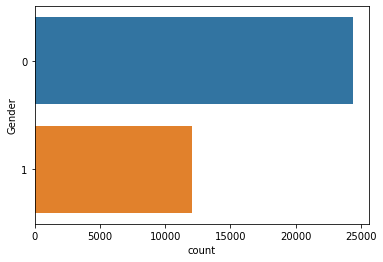

In [ ]:
print(credit_application_record['Gender'].value_counts())
sns.countplot(y="Gender",  data=credit_application_record)

### email

0    33186
1     3271
Name: email, dtype: int64


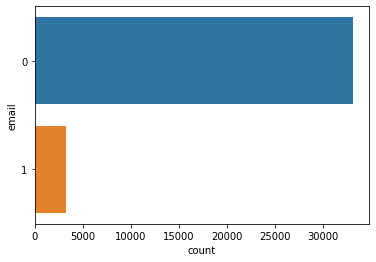

In [ ]:
print(credit_application_record['email'].value_counts())
sns.countplot(y="email",  data=credit_application_record)

### Car

In [ ]:
# Converting Car into [0,1] (int dtypes)
credit_application_record["Car"] =  credit_application_record["Car"].replace(['N','Y'],[0,1])

0    22614
1    13843
Name: Car, dtype: int64


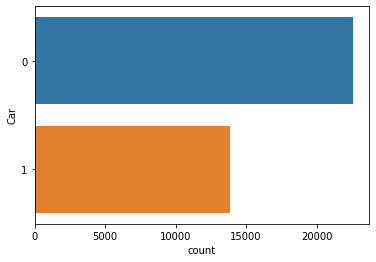

In [ ]:
print(credit_application_record['Car'].value_counts())
sns.countplot(y="Car",  data=credit_application_record)

### House

In [ ]:
# Converting House into [0,1] (int dtypes)
credit_application_record["House"] =  credit_application_record["House"].replace(['N','Y'],[0,1])

1    24506
0    11951
Name: House, dtype: int64


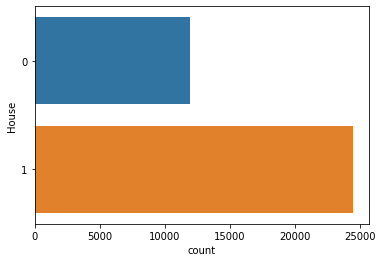

In [ ]:
print(credit_application_record['House'].value_counts())
sns.countplot(y="House",  data=credit_application_record)

### mobile

1    36457
Name: mobile, dtype: int64


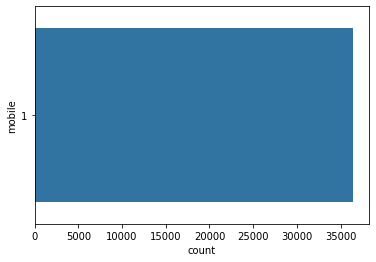

In [ ]:
print(credit_application_record['mobile'].value_counts())
sns.countplot(y="mobile",  data=credit_application_record)

**SINGULAR_MATRIX:**Everyone has mobile SO this variable is not going to add any value, so It should be Dropped
 

In [ ]:
credit_application_record.drop('mobile',axis=1,inplace=True)

In [ ]:
credit_application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              36457 non-null  int64  
 1   Gender          36457 non-null  int64  
 2   Car             36457 non-null  int64  
 3   House           36457 non-null  int64  
 4   NoOfChild       36457 non-null  int64  
 5   IncomeTotal     36457 non-null  float64
 6   IncomeType      36457 non-null  object 
 7   Education       36457 non-null  object 
 8   FamilyType      36457 non-null  object 
 9   HouseType       36457 non-null  object 
 10  AgebyDay        36457 non-null  int64  
 11  EmpExpbyDay     36457 non-null  int64  
 12  WkPhone         36457 non-null  int64  
 13  Phone           36457 non-null  int64  
 14  email           36457 non-null  int64  
 15  OccupationType  25134 non-null  object 
 16  FamSize         36457 non-null  float64
 17  Account_Length  36457 non-null 

### NoOfChild

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: NoOfChild, dtype: int64


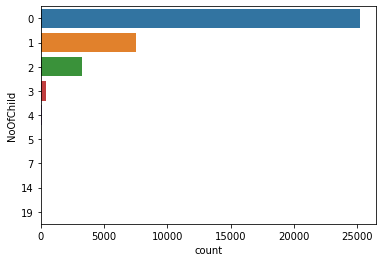

In [ ]:
print(credit_application_record['NoOfChild'].value_counts())
sns.countplot(y="NoOfChild",  data=credit_application_record)

### AgebyDay

In [ ]:
# print(credit_application_record['AgebyDay'].value_counts())
# sns.countplot(y="AgebyDay",  data=credit_application_record)

### EmpExpbyDay

In [ ]:
# print(credit_application_record['EmpExpbyDay'].value_counts())
# sns.countplot(y="EmpExpbyDay",  data=credit_application_record)

### FamSize

In [ ]:
# Changing Dat type from foat to int
credit_application_record['FamSize']=credit_application_record['FamSize'].astype('int')

In [ ]:
credit_application_record['FamSize'].dtypes

dtype('int64')

2     19463
1      6987
3      6421
4      3106
5       397
6        58
7        19
15        3
9         2
20        1
Name: FamSize, dtype: int64


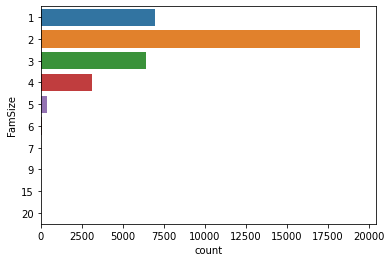

In [ ]:
print(credit_application_record['FamSize'].value_counts())
sns.countplot(y="FamSize",  data=credit_application_record)

### Account Length

7     889
11    828
6     824
8     820
5     816
     ... 
58    333
60    321
0     315
59    307
57    304
Name: Account_Length, Length: 61, dtype: int64


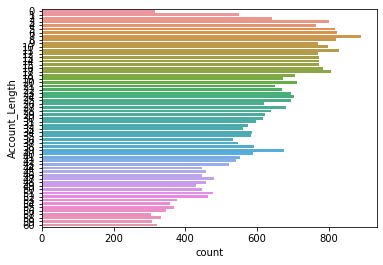

In [ ]:
print(credit_application_record['Account_Length'].value_counts())
sns.countplot(y="Account_Length",  data=credit_application_record)

### WkPhone

0    28235
1     8222
Name: WkPhone, dtype: int64


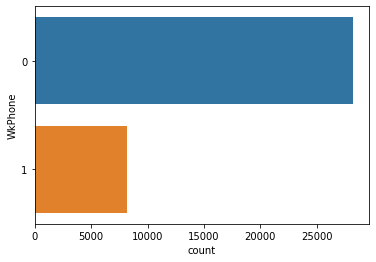

In [ ]:
print(credit_application_record['WkPhone'].value_counts())
sns.countplot(y="WkPhone",  data=credit_application_record)

### Phone

0    25709
1    10748
Name: Phone, dtype: int64


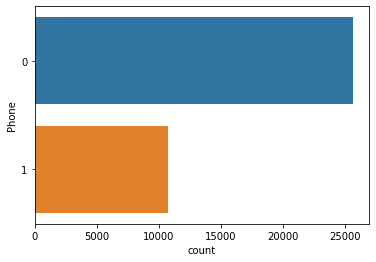

In [ ]:
print(credit_application_record['Phone'].value_counts())
sns.countplot(y="Phone",  data=credit_application_record)

### IncomeType

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: IncomeType, dtype: int64


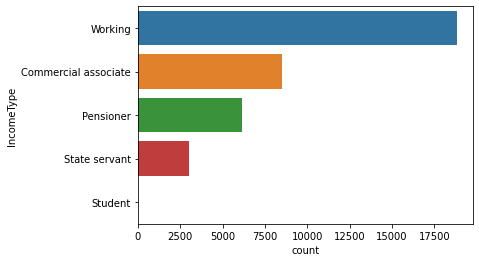

In [ ]:
print(credit_application_record['IncomeType'].value_counts())
sns.countplot(y="IncomeType",  data=credit_application_record)

### Education

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: Education, dtype: int64


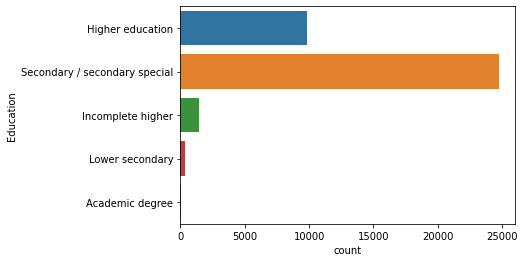

In [ ]:
print(credit_application_record['Education'].value_counts())
sns.countplot(y="Education",  data=credit_application_record)

### FamilyType

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: FamilyType, dtype: int64


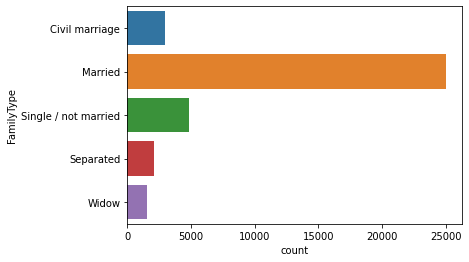

In [ ]:
print(credit_application_record['FamilyType'].value_counts())
sns.countplot(y="FamilyType",  data=credit_application_record)

### Marriage_Status

In [ ]:
credit_application_record['Marriage_Status']=0
credit_application_record['Marriage_Status'][credit_application_record['FamilyType'].isin(['Married','Civil marriage'])]=1
credit_application_record['Marriage_Status'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    27993
0     8464
Name: Marriage_Status, dtype: int64

### HouseType

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: HouseType, dtype: int64


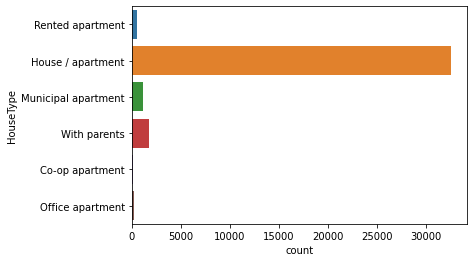

In [ ]:
print(credit_application_record['HouseType'].value_counts())
sns.countplot(y="HouseType",  data=credit_application_record)

### OccupationType

Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: OccupationType, dtype: int64


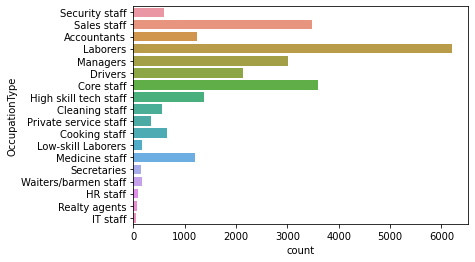

In [ ]:
print(credit_application_record['OccupationType'].value_counts())
sns.countplot(y="OccupationType",  data=credit_application_record)

### Target

0    35841
1      616
Name: Target, dtype: int64


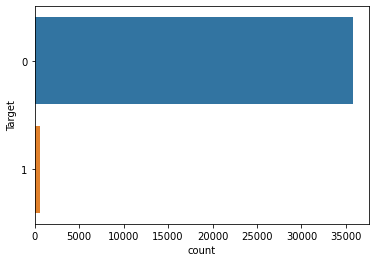

In [ ]:
print(credit_application_record['Target'].value_counts())
sns.countplot(y="Target",  data=credit_application_record)

## Continuous variables exploration

### IncomeTotal

{'whiskers': [<matplotlib.lines.Line2D at 0x7f77d7b11850>,
 'caps': [<matplotlib.lines.Line2D at 0x7f77d7b1a310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f77d7b11290>],
 'medians': [<matplotlib.lines.Line2D at 0x7f77d7b1add0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f77d7b21350>],
 'means': []}

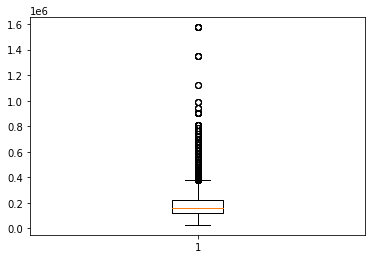

In [ ]:
plt.boxplot(credit_application_record["IncomeTotal"])

INDICATES OUTLIER IN DATASET

(array([2.246e+04, 1.138e+04, 2.099e+03, 2.740e+02, 1.650e+02, 5.800e+01,
        4.000e+00, 3.000e+00, 6.000e+00, 8.000e+00]),
 array([  27000.,  181800.,  336600.,  491400.,  646200.,  801000.,
         955800., 1110600., 1265400., 1420200., 1575000.]),
 <a list of 10 Patch objects>)

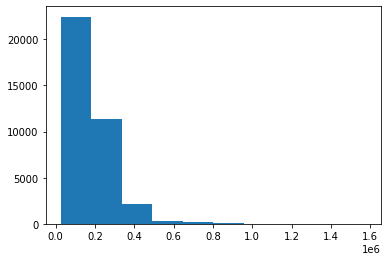

In [ ]:
plt.hist(credit_application_record["IncomeTotal"])

In [ ]:
util_percentiles=credit_application_record['IncomeTotal'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.97,0.98,0.99,1])
round(util_percentiles,2)

0.10      90000.0
0.20     112500.0
0.30     135000.0
0.40     139500.0
0.50     157500.0
0.60     180000.0
0.70     216000.0
0.80     247500.0
0.90     315000.0
0.91     315000.0
0.92     315000.0
0.93     337500.0
0.94     360000.0
0.95     360000.0
0.97     405000.0
0.98     450000.0
0.99     560250.0
1.00    1575000.0
Name: IncomeTotal, dtype: float64

0.01% Outlier negligible

# Data Cleaning and Data Preparation

## Age

In [ ]:
credit_application_record['Age']=-credit_application_record['AgebyDay']//365
credit_application_record['Age']

0        32
1        32
2        58
3        52
4        52
         ..
36452    47
36453    33
36454    33
36455    49
36456    25
Name: Age, Length: 36457, dtype: int64

In [ ]:
# print(credit_application_record['Age'].value_counts())
# sns.countplot(y='Age',data=credit_application_record)

(array([ 738., 4190., 5098., 5338., 4203., 4363., 3990., 3899., 3328.,
        1310.]),
 array([20. , 24.8, 29.6, 34.4, 39.2, 44. , 48.8, 53.6, 58.4, 63.2, 68. ]),
 <a list of 10 Patch objects>)

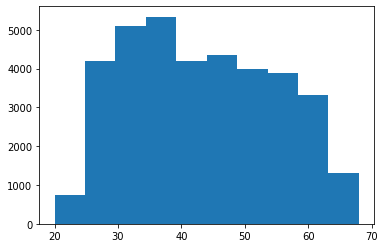

In [ ]:
plt.hist(credit_application_record["Age"])

### Creating Age Bucket

In [ ]:
# Creating Age Bucket
credit_application_record['Age Bucket']='Young Age'
credit_application_record['Age Bucket'][credit_application_record['Age']>=30]='Mid Young Age'
credit_application_record['Age Bucket'][credit_application_record['Age']>=40]='Mid Age'
credit_application_record['Age Bucket'][credit_application_record['Age']>=50]='Mid Old Age'
credit_application_record['Age Bucket'][credit_application_record['Age']>=60]='Old Age'
credit_application_record

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,ID,Gender,Car,House,NoOfChild,IncomeTotal,IncomeType,Education,FamilyType,HouseType,...,WkPhone,Phone,email,OccupationType,FamSize,Account_Length,Target,Marriage_Status,Age,Age Bucket
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2,15,0,1,32,Mid Young Age
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2,14,0,1,32,Mid Young Age
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2,29,0,1,58,Mid Old Age
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1,4,0,0,52,Mid Old Age
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1,26,0,0,52,Mid Old Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Managers,2,11,1,1,47,Mid Age
36453,5149834,0,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2,23,1,1,33,Mid Young Age
36454,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2,32,1,1,33,Mid Young Age
36455,5150049,0,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Sales staff,2,9,1,1,49,Mid Age


Mid Young Age    10436
Mid Age           9312
Mid Old Age       7952
Young Age         4928
Old Age           3829
Name: Age Bucket, dtype: int64


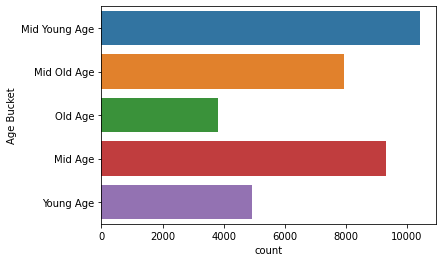

In [ ]:
print(credit_application_record['Age Bucket'].value_counts())
sns.countplot(y='Age Bucket',data=credit_application_record)

## Experience

In [ ]:
credit_application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               36457 non-null  int64  
 1   Gender           36457 non-null  int64  
 2   Car              36457 non-null  int64  
 3   House            36457 non-null  int64  
 4   NoOfChild        36457 non-null  int64  
 5   IncomeTotal      36457 non-null  float64
 6   IncomeType       36457 non-null  object 
 7   Education        36457 non-null  object 
 8   FamilyType       36457 non-null  object 
 9   HouseType        36457 non-null  object 
 10  AgebyDay         36457 non-null  int64  
 11  EmpExpbyDay      36457 non-null  int64  
 12  WkPhone          36457 non-null  int64  
 13  Phone            36457 non-null  int64  
 14  email            36457 non-null  int64  
 15  OccupationType   25134 non-null  object 
 16  FamSize          36457 non-null  int64  
 17  Account_Leng

In [ ]:
# Converting Experience in Days to Year 
credit_application_record['EmpExperience']=-(credit_application_record['EmpExpbyDay'])//365
credit_application_record['EmpExperience'].value_counts()



-1001    6135
 1       3235
 4       2879
 3       2831
 2       2763
 0       2540
 6       2130
 5       2057
 8       1830
 7       1642
 9       1282
 10      1095
 12       748
 11       712
 14       606
 13       584
 15       580
 18       304
 20       299
 16       269
 19       258
 17       236
 22       190
 21       179
 23       169
 25       156
 27       113
 24       104
 29        86
 26        84
 32        54
 28        52
 31        46
 35        35
 30        33
 33        33
 34        22
 41        20
 39        16
 40        16
 36        14
 38        12
 42         4
 37         3
 43         1
Name: EmpExperience, dtype: int64

In [ ]:
# Converting -ve Experience to 0
credit_application_record.loc[credit_application_record['EmpExperience']<0,'EmpExperience']=0
credit_application_record['EmpExperience'].value_counts()

0     8675
1     3235
4     2879
3     2831
2     2763
6     2130
5     2057
8     1830
7     1642
9     1282
10    1095
12     748
11     712
14     606
13     584
15     580
18     304
20     299
16     269
19     258
17     236
22     190
21     179
23     169
25     156
27     113
24     104
29      86
26      84
32      54
28      52
31      46
35      35
33      33
30      33
34      22
41      20
40      16
39      16
36      14
38      12
42       4
37       3
43       1
Name: EmpExperience, dtype: int64

(array([20383.,  7659.,  3837.,  2275.,  1040.,   619.,   368.,   155.,
           64.,    57.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <a list of 10 Patch objects>)

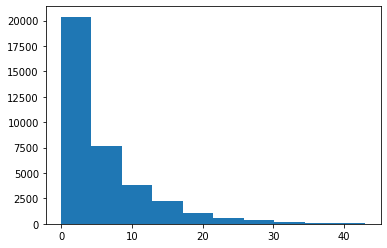

In [ ]:
plt.hist(credit_application_record["EmpExperience"])

In [ ]:
# Creating Experience Bucket
credit_application_record['EmpExp Category']='UnEmloyeed'
credit_application_record['EmpExp Category'][credit_application_record['EmpExperience']>0]='1-9 Years'
credit_application_record['EmpExp Category'][credit_application_record['EmpExperience']>=10]='10-19 Years'
credit_application_record['EmpExp Category'][credit_application_record['EmpExperience']>=20]='20-29 Years'
credit_application_record['EmpExp Category'][credit_application_record['EmpExperience']>=30]='30-39 Years'
credit_application_record['EmpExp Category'][credit_application_record['EmpExperience']>=40]='40+ Years'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

1-9 Years      20649
UnEmloyeed      8675
10-19 Years     5392
20-29 Years     1432
30-39 Years      268
40+ Years         41
Name: EmpExp Category, dtype: int64


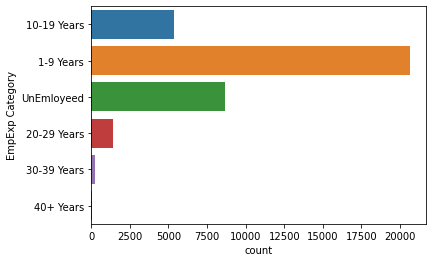

In [ ]:
print(credit_application_record['EmpExp Category'].value_counts())
sns.countplot(y='EmpExp Category',data=credit_application_record,)

### Creating Employement Status

In [ ]:
#Creating Employement Status
credit_application_record['Employement_Status']=credit_application_record["EmpExperience"]
credit_application_record['Employement_Status'][credit_application_record["EmpExperience"]==0]=0  #Unemployeed
credit_application_record['Employement_Status'][credit_application_record["EmpExperience"]>0]=1   #Employeed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1    27782
0     8675
Name: Employement_Status, dtype: int64


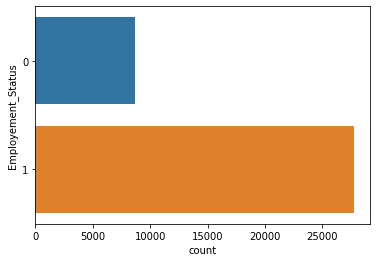

In [ ]:
print(credit_application_record['Employement_Status'].value_counts())
sns.countplot(y='Employement_Status',data=credit_application_record)

In [ ]:
credit_application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  36457 non-null  int64  
 1   Gender              36457 non-null  int64  
 2   Car                 36457 non-null  int64  
 3   House               36457 non-null  int64  
 4   NoOfChild           36457 non-null  int64  
 5   IncomeTotal         36457 non-null  float64
 6   IncomeType          36457 non-null  object 
 7   Education           36457 non-null  object 
 8   FamilyType          36457 non-null  object 
 9   HouseType           36457 non-null  object 
 10  AgebyDay            36457 non-null  int64  
 11  EmpExpbyDay         36457 non-null  int64  
 12  WkPhone             36457 non-null  int64  
 13  Phone               36457 non-null  int64  
 14  email               36457 non-null  int64  
 15  OccupationType      25134 non-null  object 
 16  FamS

## OccupationType   

In [ ]:
#Finding the missing value percentage in OccupationType
(credit_application_record['OccupationType'].isnull().sum()/len(credit_application_record))*100

31.05850728255205

31% missing records

In [ ]:
#Imputation with Missing/NA catagory
credit_application_record['OccupationType_New']=credit_application_record['OccupationType']
credit_application_record.loc[credit_application_record['OccupationType_New'].isnull(),'OccupationType_New']='Missing/NA'


In [ ]:
cross_tab_OccupationType=pd.crosstab(credit_application_record['OccupationType_New'],credit_application_record['Target']).apply(lambda r: (r/r.sum())*100, axis=1)
cross_tab_OccupationType

Target,0,1
OccupationType_New,,
Accountants,98.146656,1.853344
Cleaning staff,99.092559,0.907441
Cooking staff,98.625954,1.374046
Core staff,97.939293,2.060707
Drivers,97.708138,2.291862
HR staff,98.823529,1.176471
High skill tech staff,97.830803,2.169197
IT staff,95.000000,5.000000
Laborers,98.406054,1.593946


missing/na %value is near to Waiters/barmen staff

In [ ]:
#Replacing Missing/NA value With Waiters/barmen staff
credit_application_record['OccupationType_New'][credit_application_record['OccupationType_New']=='Missing/NA']='Waiters/barmen staff'
credit_application_record['OccupationType_New'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Waiters/barmen staff     11497
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OccupationType_New, dtype: int64

Waiters/barmen staff     11497
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OccupationType_New, dtype: int64


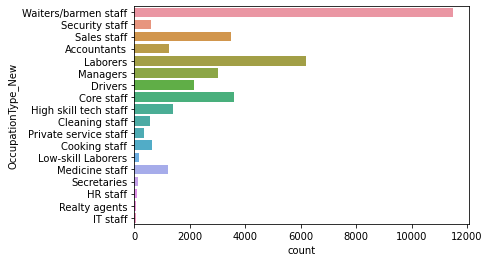

In [ ]:
print(credit_application_record['OccupationType_New'].value_counts())
sns.countplot(y='OccupationType_New',data=credit_application_record)

In [ ]:
credit_application_record['OccupationType_New'].isnull().sum()

0

In [ ]:
credit_application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  36457 non-null  int64  
 1   Gender              36457 non-null  int64  
 2   Car                 36457 non-null  int64  
 3   House               36457 non-null  int64  
 4   NoOfChild           36457 non-null  int64  
 5   IncomeTotal         36457 non-null  float64
 6   IncomeType          36457 non-null  object 
 7   Education           36457 non-null  object 
 8   FamilyType          36457 non-null  object 
 9   HouseType           36457 non-null  object 
 10  AgebyDay            36457 non-null  int64  
 11  EmpExpbyDay         36457 non-null  int64  
 12  WkPhone             36457 non-null  int64  
 13  Phone               36457 non-null  int64  
 14  email               36457 non-null  int64  
 15  OccupationType      25134 non-null  object 
 16  FamS

Droping Not Required Features

In [ ]:
credit_application_record=credit_application_record.drop(['AgebyDay','EmpExpbyDay','OccupationType'],axis=1)
credit_application_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  36457 non-null  int64  
 1   Gender              36457 non-null  int64  
 2   Car                 36457 non-null  int64  
 3   House               36457 non-null  int64  
 4   NoOfChild           36457 non-null  int64  
 5   IncomeTotal         36457 non-null  float64
 6   IncomeType          36457 non-null  object 
 7   Education           36457 non-null  object 
 8   FamilyType          36457 non-null  object 
 9   HouseType           36457 non-null  object 
 10  WkPhone             36457 non-null  int64  
 11  Phone               36457 non-null  int64  
 12  email               36457 non-null  int64  
 13  FamSize             36457 non-null  int64  
 14  Account_Length      36457 non-null  int64  
 15  Target              36457 non-null  int64  
 16  Marr

In [ ]:
credit_application_record['Target']. value_counts()

0    35841
1      616
Name: Target, dtype: int64

# **Feature Engineering**

In [ ]:
feature_engineer_data=credit_application_record

### **IncomeType**

In [ ]:
feature_engineer_data['IncomeType'].value_counts()

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: IncomeType, dtype: int64

Need to modify to Numerical Variable

One hot coding required AS WE can not ordered the values

In [ ]:
# get dummy variables
one_hot_data = pd.get_dummies(feature_engineer_data['IncomeType'])
print("one_hot_data \n", one_hot_data.sample(10))

one_hot_data 
        Commercial associate  Pensioner  State servant  Student  Working
10575                     1          0              0        0        0
18592                     0          0              0        0        1
5507                      0          0              0        0        1
15784                     0          0              1        0        0
6160                      1          0              0        0        0
16628                     0          0              0        0        1
23211                     0          0              1        0        0
33731                     0          0              0        0        1
11352                     1          0              0        0        0
32963                     0          0              1        0        0


In [ ]:
# Concatenate dummy columns with main dataframe
feature_engineer_data = pd.concat([feature_engineer_data, one_hot_data],axis=1)
feature_engineer_data.head()

,ID,Gender,Car,House,NoOfChild,IncomeTotal,IncomeType,Education,FamilyType,HouseType,...,Age Bucket,EmpExperience,EmpExp Category,Employement_Status,OccupationType_New,Commercial associate,Pensioner,State servant,Student,Working
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,Mid Young Age,12,10-19 Years,1,Waiters/barmen staff,0,0,0,0,1
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,Mid Young Age,12,10-19 Years,1,Waiters/barmen staff,0,0,0,0,1
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,Mid Old Age,3,1-9 Years,1,Security staff,0,0,0,0,1
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Mid Old Age,8,1-9 Years,1,Sales staff,1,0,0,0,0
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,Mid Old Age,8,1-9 Years,1,Sales staff,1,0,0,0,0


Droping IncomeType

In [ ]:
feature_engineer_data=feature_engineer_data.drop(['IncomeType'],axis=1)
feature_engineer_data

,ID,Gender,Car,House,NoOfChild,IncomeTotal,Education,FamilyType,HouseType,WkPhone,...,Age Bucket,EmpExperience,EmpExp Category,Employement_Status,OccupationType_New,Commercial associate,Pensioner,State servant,Student,Working
0,5008804,1,1,1,0,427500.0,Higher education,Civil marriage,Rented apartment,1,...,Mid Young Age,12,10-19 Years,1,Waiters/barmen staff,0,0,0,0,1
1,5008805,1,1,1,0,427500.0,Higher education,Civil marriage,Rented apartment,1,...,Mid Young Age,12,10-19 Years,1,Waiters/barmen staff,0,0,0,0,1
2,5008806,1,1,1,0,112500.0,Secondary / secondary special,Married,House / apartment,0,...,Mid Old Age,3,1-9 Years,1,Security staff,0,0,0,0,1
3,5008808,0,0,1,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,0,...,Mid Old Age,8,1-9 Years,1,Sales staff,1,0,0,0,0
4,5008809,0,0,1,0,270000.0,Secondary / secondary special,Single / not married,House / apartment,0,...,Mid Old Age,8,1-9 Years,1,Sales staff,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,Secondary / secondary special,Married,House / apartment,0,...,Mid Age,6,1-9 Years,1,Managers,0,0,0,0,1
36453,5149834,0,0,1,0,157500.0,Higher education,Married,House / apartment,0,...,Mid Young Age,3,1-9 Years,1,Medicine staff,1,0,0,0,0
36454,5149838,0,0,1,0,157500.0,Higher education,Married,House / apartment,0,...,Mid Young Age,3,1-9 Years,1,Medicine staff,0,1,0,0,0
36455,5150049,0,0,1,0,283500.0,Secondary / secondary special,Married,House / apartment,0,...,Mid Age,1,1-9 Years,1,Sales staff,0,0,0,0,1


### **Education**

In [ ]:
feature_engineer_data['Education'].value_counts()

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: Education, dtype: int64

higher educatonal qualifications should be given higher weight So Level Encoding

In [ ]:
feature_engineer_data['Education'].replace({"Higher education": 3, "Lower secondary": 0, "Secondary / secondary special": 1, "Incomplete higher": 2, "Academic degree":4}, inplace=True)

In [ ]:
feature_engineer_data['Education'].value_counts()

1    24777
3     9864
2     1410
0      374
4       32
Name: Education, dtype: int64

## **FamilyType**

In [ ]:
feature_engineer_data['FamilyType'].value_counts()

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: FamilyType, dtype: int64

need One Hot Encoding As we can not order them

In [ ]:
# get dummy variables
one_hot_data = pd.get_dummies(feature_engineer_data['FamilyType'])
print("one_hot_data \n", one_hot_data.sample(10))

one_hot_data 
        Civil marriage  Married  Separated  Single / not married  Widow
24648               0        1          0                     0      0
29488               0        1          0                     0      0
11955               1        0          0                     0      0
33063               0        1          0                     0      0
25278               0        1          0                     0      0
29978               0        1          0                     0      0
35877               0        1          0                     0      0
12923               1        0          0                     0      0
6532                0        1          0                     0      0
32583               0        1          0                     0      0


In [ ]:
# Concatenate dummy columns with main dataframe
feature_engineer_data = pd.concat([feature_engineer_data, one_hot_data],axis=1)
feature_engineer_data.head()

,ID,Gender,Car,House,NoOfChild,IncomeTotal,Education,FamilyType,HouseType,WkPhone,...,Commercial associate,Pensioner,State servant,Student,Working,Civil marriage,Married,Separated,Single / not married,Widow
0,5008804,1,1,1,0,427500.0,3,Civil marriage,Rented apartment,1,...,0,0,0,0,1,1,0,0,0,0
1,5008805,1,1,1,0,427500.0,3,Civil marriage,Rented apartment,1,...,0,0,0,0,1,1,0,0,0,0
2,5008806,1,1,1,0,112500.0,1,Married,House / apartment,0,...,0,0,0,0,1,0,1,0,0,0
3,5008808,0,0,1,0,270000.0,1,Single / not married,House / apartment,0,...,1,0,0,0,0,0,0,0,1,0
4,5008809,0,0,1,0,270000.0,1,Single / not married,House / apartment,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
feature_engineer_data=feature_engineer_data.drop(['FamilyType'],axis=1)
feature_engineer_data

,ID,Gender,Car,House,NoOfChild,IncomeTotal,Education,HouseType,WkPhone,Phone,...,Commercial associate,Pensioner,State servant,Student,Working,Civil marriage,Married,Separated,Single / not married,Widow
0,5008804,1,1,1,0,427500.0,3,Rented apartment,1,0,...,0,0,0,0,1,1,0,0,0,0
1,5008805,1,1,1,0,427500.0,3,Rented apartment,1,0,...,0,0,0,0,1,1,0,0,0,0
2,5008806,1,1,1,0,112500.0,1,House / apartment,0,0,...,0,0,0,0,1,0,1,0,0,0
3,5008808,0,0,1,0,270000.0,1,House / apartment,0,1,...,1,0,0,0,0,0,0,0,1,0
4,5008809,0,0,1,0,270000.0,1,House / apartment,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,1,House / apartment,0,0,...,0,0,0,0,1,0,1,0,0,0
36453,5149834,0,0,1,0,157500.0,3,House / apartment,0,1,...,1,0,0,0,0,0,1,0,0,0
36454,5149838,0,0,1,0,157500.0,3,House / apartment,0,1,...,0,1,0,0,0,0,1,0,0,0
36455,5150049,0,0,1,0,283500.0,1,House / apartment,0,0,...,0,0,0,0,1,0,1,0,0,0


## **HouseType**

In [ ]:
feature_engineer_data['HouseType'].value_counts()

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: HouseType, dtype: int64

It is not possible to order them

In [ ]:
# get dummy variables
one_hot_data = pd.get_dummies(feature_engineer_data['HouseType'])
print("one_hot_data \n", one_hot_data.sample(10))

one_hot_data 
        Co-op apartment  House / apartment  Municipal apartment  \
27076                0                  1                    0   
28334                0                  1                    0   
13594                0                  0                    0   
23782                0                  1                    0   
34822                0                  1                    0   
6176                 0                  1                    0   
6459                 0                  1                    0   
23333                0                  1                    0   
1973                 0                  1                    0   
6768                 0                  0                    0   

       Office apartment  Rented apartment  With parents  
27076                 0                 0             0  
28334                 0                 0             0  
13594                 0                 0             1  
23782                 0   

In [ ]:
# Concatenate dummy columns with main dataframe
feature_engineer_data = pd.concat([feature_engineer_data, one_hot_data],axis=1)
feature_engineer_data.head()

,ID,Gender,Car,House,NoOfChild,IncomeTotal,Education,HouseType,WkPhone,Phone,...,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,5008804,1,1,1,0,427500.0,3,Rented apartment,1,0,...,0,0,0,0,0,0,0,0,1,0
1,5008805,1,1,1,0,427500.0,3,Rented apartment,1,0,...,0,0,0,0,0,0,0,0,1,0
2,5008806,1,1,1,0,112500.0,1,House / apartment,0,0,...,1,0,0,0,0,1,0,0,0,0
3,5008808,0,0,1,0,270000.0,1,House / apartment,0,1,...,0,0,1,0,0,1,0,0,0,0
4,5008809,0,0,1,0,270000.0,1,House / apartment,0,1,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
feature_engineer_data=feature_engineer_data.drop(['HouseType'],axis=1)
feature_engineer_data

,ID,Gender,Car,House,NoOfChild,IncomeTotal,Education,WkPhone,Phone,email,...,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,5008804,1,1,1,0,427500.0,3,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5008805,1,1,1,0,427500.0,3,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,5008806,1,1,1,0,112500.0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,5008808,0,0,1,0,270000.0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
4,5008809,0,0,1,0,270000.0,1,0,1,1,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
36453,5149834,0,0,1,0,157500.0,3,0,1,1,...,1,0,0,0,0,1,0,0,0,0
36454,5149838,0,0,1,0,157500.0,3,0,1,1,...,1,0,0,0,0,1,0,0,0,0
36455,5150049,0,0,1,0,283500.0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## **OccupationType_New**

In [ ]:
feature_engineer_data['OccupationType_New'].value_counts()

Waiters/barmen staff     11497
Laborers                  6211
Core staff                3591
Sales staff               3485
Managers                  3012
Drivers                   2138
High skill tech staff     1383
Accountants               1241
Medicine staff            1207
Cooking staff              655
Security staff             592
Cleaning staff             551
Private service staff      344
Low-skill Laborers         175
Secretaries                151
HR staff                    85
Realty agents               79
IT staff                    60
Name: OccupationType_New, dtype: int64

It is not possible to order them

In [ ]:
# get dummy variables
one_hot_data = pd.get_dummies(feature_engineer_data['OccupationType_New'])
print("one_hot_data \n", one_hot_data.sample(10))

one_hot_data 
        Accountants  Cleaning staff  Cooking staff  Core staff  Drivers  \
29610            0               0              0           0        0   
33506            0               0              0           0        0   
1224             0               0              0           0        0   
19383            0               0              0           0        0   
22828            0               0              0           0        0   
15008            0               0              0           0        0   
16579            0               0              0           0        0   
22166            0               0              0           0        0   
82               0               0              0           0        0   
5859             0               0              0           1        0   

       HR staff  High skill tech staff  IT staff  Laborers  \
29610         0                      0         0         0   
33506         0                      0        

In [ ]:
# Concatenate dummy columns with main dataframe
feature_engineer_data = pd.concat([feature_engineer_data, one_hot_data],axis=1)
feature_engineer_data.head()

,ID,Gender,Car,House,NoOfChild,IncomeTotal,Education,WkPhone,Phone,email,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,5008804,1,1,1,0,427500.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5008805,1,1,1,0,427500.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5008806,1,1,1,0,112500.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,0,1,0,270000.0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,0,1,0,270000.0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0


Droping OccupationType

In [ ]:
feature_engineer_data=feature_engineer_data.drop(['OccupationType_New'],axis=1)
feature_engineer_data

,ID,Gender,Car,House,NoOfChild,IncomeTotal,Education,WkPhone,Phone,email,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,5008804,1,1,1,0,427500.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5008805,1,1,1,0,427500.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5008806,1,1,1,0,112500.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,5008808,0,0,1,0,270000.0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,5008809,0,0,1,0,270000.0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
36453,5149834,0,0,1,0,157500.0,3,0,1,1,...,0,0,0,1,0,0,0,0,0,0
36454,5149838,0,0,1,0,157500.0,3,0,1,1,...,0,0,0,1,0,0,0,0,0,0
36455,5150049,0,0,1,0,283500.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Age Bucket

In [ ]:
feature_engineer_data['Age Bucket'].value_counts()

Mid Young Age    10436
Mid Age           9312
Mid Old Age       7952
Young Age         4928
Old Age           3829
Name: Age Bucket, dtype: int64

We can order them  so Level Encoding

In [ ]:
feature_engineer_data['Age Bucket'].replace({'Old Age':4, 'Mid Old Age':3, 'Mid Age':2, 'Mid Young Age':1, 'Young Age':0}, inplace=True)

In [ ]:
feature_engineer_data['Age Bucket'].value_counts()

1    10436
2     9312
3     7952
0     4928
4     3829
Name: Age Bucket, dtype: int64

## EmpExp Category

In [ ]:
feature_engineer_data['EmpExp Category'].value_counts()

1-9 Years      20649
UnEmloyeed      8675
10-19 Years     5392
20-29 Years     1432
30-39 Years      268
40+ Years         41
Name: EmpExp Category, dtype: int64

We can order them  so Level Encoding

In [ ]:
feature_engineer_data['EmpExp Category'].replace({'40+ Years':5,'30-39 Years':4, '20-29 Years':3, '10-19 Years':2, '1-9 Years':1, 'UnEmloyeed':0}, inplace=True)

In [ ]:
feature_engineer_data['EmpExp Category'].value_counts()

1    20649
0     8675
2     5392
3     1432
4      268
5       41
Name: EmpExp Category, dtype: int64

## Children_Segmentation

In [ ]:
feature_engineer_data['NoOfChild'].value_counts()

0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: NoOfChild, dtype: int64

Creating Segmentation

In [ ]:
feature_engineer_data['Children_Segmentation']='Nochild'
feature_engineer_data['Children_Segmentation'][feature_engineer_data['NoOfChild']>0]='Max_2child'
feature_engineer_data['Children_Segmentation'][feature_engineer_data['NoOfChild']>2]='More_2child'
feature_engineer_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ID,Gender,Car,House,NoOfChild,IncomeTotal,Education,WkPhone,Phone,email,...,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,Children_Segmentation
0,5008804,1,1,1,0,427500.0,3,1,0,0,...,0,0,0,0,0,0,0,0,1,Nochild
1,5008805,1,1,1,0,427500.0,3,1,0,0,...,0,0,0,0,0,0,0,0,1,Nochild
2,5008806,1,1,1,0,112500.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,Nochild
3,5008808,0,0,1,0,270000.0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,Nochild
4,5008809,0,0,1,0,270000.0,1,0,1,1,...,0,0,0,0,0,1,0,0,0,Nochild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,Nochild
36453,5149834,0,0,1,0,157500.0,3,0,1,1,...,0,0,1,0,0,0,0,0,0,Nochild
36454,5149838,0,0,1,0,157500.0,3,0,1,1,...,0,0,1,0,0,0,0,0,0,Nochild
36455,5150049,0,0,1,0,283500.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,Nochild


In [ ]:
feature_engineer_data['Children_Segmentation'].value_counts()

Nochild        25201
Max_2child     10748
More_2child      508
Name: Children_Segmentation, dtype: int64

We can order them so Level Encoding

In [ ]:
feature_engineer_data['Children_Segmentation'].replace({'Nochild':2, 'Max_2child':1, 'More_2child':0}, inplace=True)

In [ ]:
feature_engineer_data['Children_Segmentation'].value_counts()

2    25201
1    10748
0      508
Name: Children_Segmentation, dtype: int64

## FamSize_Segmentation

In [ ]:
feature_engineer_data['FamSize'].value_counts()

2     19463
1      6987
3      6421
4      3106
5       397
6        58
7        19
15        3
9         2
20        1
Name: FamSize, dtype: int64

creating segmentation: Less than equal to 4

In [ ]:
feature_engineer_data['FamSize_Segmentation']='<= 4'
feature_engineer_data['FamSize_Segmentation'][feature_engineer_data['FamSize']>4]='> 4'


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
feature_engineer_data['FamSize_Segmentation'].value_counts()

<= 4    35977
> 4       480
Name: FamSize_Segmentation, dtype: int64

We can order them so Level Encoding

In [ ]:
feature_engineer_data['FamSize_Segmentation'].replace({'<= 4':1,'> 4':0}, inplace=True)

In [ ]:
feature_engineer_data['FamSize_Segmentation'].value_counts()

1    35977
0      480
Name: FamSize_Segmentation, dtype: int64

In [ ]:
feature_engineer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     36457 non-null  int64  
 1   Gender                 36457 non-null  int64  
 2   Car                    36457 non-null  int64  
 3   House                  36457 non-null  int64  
 4   NoOfChild              36457 non-null  int64  
 5   IncomeTotal            36457 non-null  float64
 6   Education              36457 non-null  int64  
 7   WkPhone                36457 non-null  int64  
 8   Phone                  36457 non-null  int64  
 9   email                  36457 non-null  int64  
 10  FamSize                36457 non-null  int64  
 11  Account_Length         36457 non-null  int64  
 12  Target                 36457 non-null  int64  
 13  Marriage_Status        36457 non-null  int64  
 14  Age                    36457 non-null  int64  
 15  Ag

Droping ID which has no significance value 

In [ ]:
feature_engineer_data=feature_engineer_data.drop('ID',axis=1)

In [ ]:
feature_engineer_data.rename(columns={'Age Bucket':'Age_Bucket','EmpExp Category':'EmpExp_Category','Commercial associate':'Commercial_associate',
                                      'State servant':'State_servant','Civil marriage':'Civil_marriage','Single / not married':'Single_or_not_married',
                                      'Cleaning staff':'Cleaning_staff','Cooking staff':'Cooking_staff','Core staff':'Core_staff','HR staff':'HR_staff',
                                      'High skill tech staff':'High_skill_tech_staff','IT staff':'IT_staff','Low-skill Laborers':'Low_skill_Laborers',
                                      'Medicine staff':'Medicine_staff','Private service staff':'Private_service_staff','Realty agents':'Realty_agents',
                                      'Sales staff':'Sales_staff','Security staff':'Security_staff','Waiters/barmen staff':'Waiters_or_barmen_staff',
                                      'Co-op apartment':'Co_Op_Appartment','House / apartment':'House_Or_apartment','Municipal apartment':'Municipal_apartment',
                                      'Office apartment':'Office_apartment','Rented apartment':'Rented_apartment','With parents':'With_parents'},inplace=True)

In [ ]:
feature_engineer_data.columns

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length', 'Target',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')

In [ ]:
col=['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation']

In [ ]:
feature_engineer_data=feature_engineer_data[col]

In [ ]:
feature_engineer_data.dtypes

Target                       int64
Gender                       int64
Car                          int64
House                        int64
NoOfChild                    int64
IncomeTotal                float64
Education                    int64
WkPhone                      int64
Phone                        int64
email                        int64
FamSize                      int64
Account_Length               int64
Marriage_Status              int64
Age                          int64
Age_Bucket                   int64
EmpExperience                int64
EmpExp_Category              int64
Employement_Status           int64
Commercial_associate         uint8
Pensioner                    uint8
State_servant                uint8
Student                      uint8
Working                      uint8
Civil_marriage               uint8
Married                      uint8
Separated                    uint8
Single_or_not_married        uint8
Widow                        uint8
Co_Op_Appartment    

In [ ]:
feature_engineer_data['Target'].value_counts()

0    35841
1      616
Name: Target, dtype: int64

In [ ]:
# from google.colab import files

# feature_engineer_data.to_excel('feature_engineer_data.xlsx', encoding = 'utf-8-sig',index=False) 
# files.download('feature_engineer_data.xlsx')

# Models Building
Select the right model, Include Feature Engineering, Perform Model Validation, Multiple models and performance comparison

**After looking at Problem statement & Target variable it is clear that it is a Classification Problem**

In [ ]:
credit_application_record.dtypes

ID                      int64
Gender                  int64
Car                     int64
House                   int64
NoOfChild               int64
IncomeTotal           float64
IncomeType             object
Education              object
FamilyType             object
HouseType              object
WkPhone                 int64
Phone                   int64
email                   int64
FamSize                 int64
Account_Length          int64
Target                  int64
Marriage_Status         int64
Age                     int64
Age Bucket             object
EmpExperience           int64
EmpExp Category        object
Employement_Status      int64
OccupationType_New     object
dtype: object

In [ ]:
credit_application_record.columns

Index(['ID', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'IncomeType', 'Education', 'FamilyType', 'HouseType', 'WkPhone',
       'Phone', 'email', 'FamSize', 'Account_Length', 'Target',
       'Marriage_Status', 'Age', 'Age Bucket', 'EmpExperience',
       'EmpExp Category', 'Employement_Status', 'OccupationType_New'],
      dtype='object')

In [ ]:
credit_application_record.shape

(36457, 23)

In [ ]:
NumericDf=credit_application_record[ ['Target','IncomeTotal','Gender','Car', 'House', 'NoOfChild','Age','WkPhone', 'Phone', 'email','FamSize',
       'Account_Length','EmpExperience','Employement_Status','Marriage_Status']]

In [ ]:
NumericDf.columns

Index(['Target', 'IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'EmpExperience', 'Employement_Status', 'Marriage_Status'],
      dtype='object')

In [ ]:
NumericDf.shape

(36457, 15)

##  **M1:LOGISTIC REGRESSION**

### Model without Feature Engineering

In [ ]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [ ]:
from sklearn import tree

M1_N_features= ['IncomeTotal','Gender','Car', 'House', 'NoOfChild','Age','WkPhone', 'Phone', 'email','FamSize',
       'Account_Length','EmpExperience','Employement_Status','Marriage_Status']
print("Features",M1_N_features)

M1_N_X = NumericDf[M1_N_features]
print("X shape", M1_N_X.shape)
M1_N_y = NumericDf['Target']
print("Y shape", M1_N_y.shape)

Features ['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length', 'EmpExperience', 'Employement_Status', 'Marriage_Status']
X shape (36457, 14)
Y shape (36457,)


In [ ]:
from pandas.core.common import random_state
logistic.fit(M1_N_X,M1_N_y)

LogisticRegression()

In [ ]:
print("Intercept", logistic.intercept_)
print("Coefficient", logistic.coef_)

Intercept [-0.00116493]
Coefficient [[-6.69696936e-06  4.01518477e-05 -1.48474164e-04 -8.46283915e-04
  -3.96274832e-04 -5.65201083e-02 -3.16494478e-04 -3.68091198e-04
  -4.16481189e-05 -2.55458258e-03 -1.86050227e-02 -6.10459568e-03
  -6.37629949e-04 -1.01725334e-03]]


#### Model Validation
Confusion matrix, Sensitivity, Specificity, F1 Score, Recall, Precision etc

#### **Confusion Matrix & Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
M1_predict=logistic.predict(M1_N_X)
M1_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pred1=pd.DataFrame(M1_predict)
pred1.value_counts()

0    36457
dtype: int64

In [ ]:
M1_cm = confusion_matrix(M1_N_y,M1_predict)
M1_cm

array([[35841,     0],
       [  616,     0]])

FOUND THIS MODEL HAS CLASS IMBALANCE.
       
AS TARGET VARIABLE IS 1 SPECIFICITY IS REQUIRED TO CALCULATE ACCURACY.

#### **Sensitivity and Specificity**

In [ ]:
total1=sum(sum(M1_cm))
M1_accuracy=(M1_cm[0,0]+M1_cm[1,1])/total1
print ('Accuracy\t: ', M1_accuracy)

M1_sensitivity = M1_cm[0,0]/(M1_cm[0,0]+M1_cm[0,1])
print('Sensitivity\t: ', M1_sensitivity )

M1_specificity = M1_cm[1,1]/(M1_cm[1,0]+M1_cm[1,1])
print('Specificity\t: ', M1_specificity)

Accuracy	:  0.9831033820665441
Sensitivity	:  1.0
Specificity	:  0.0


AS TARGET VARIABLE IS 1 SPECIFICITY IS REQUIRED TO INCREASE.

#### THRESHOLD

In [ ]:
### Converting predicted values into classes using new threshold
M1_threshold=0.2
M1_predicted_class1=[ 0 if x < M1_threshold else 1 for x in M1_predict]

In [ ]:
#Change in Confusion Matrix, Accuracy and Sensitivity-Specificity
#Confusion matrix, Accuracy, sensitivity and specificity
M1_cm1 = confusion_matrix(M1_N_y,M1_predicted_class1)
print('Confusion Matrix : \n', M1_cm1)

M1_total1=sum(sum(M1_cm1))
#####from confusion matrix calculate accuracy
M1_accuracy1=(M1_cm1[0,0]+M1_cm1[1,1])/M1_total1
print ('Accuracy : ', M1_accuracy1)

M1_sensitivity1 = M1_cm1[0,0]/(M1_cm1[0,0]+M1_cm1[0,1])
print('Sensitivity : ', M1_sensitivity1 )

M1_specificity1 = M1_cm1[1,1]/(M1_cm1[1,0]+M1_cm1[1,1])
print('Specificity : ', M1_specificity1)

Confusion Matrix : 
 [[35841     0]
 [  616     0]]
Accuracy :  0.9831033820665441
Sensitivity :  1.0
Specificity :  0.0


ADJUSTING THRESHOLD HAS NO EFFECT ON IT

#### Handling Class Imbalance

In [ ]:
print("Actual Data :", NumericDf.shape)

#Frequency count on target column
M1_freq=M1_N_y.value_counts()
print(M1_freq)
print((M1_freq/M1_freq.sum())*100)

#Classwise data
M1_credit_risk_class0 = NumericDf[NumericDf['Target'] == 0]
M1_credit_risk_class1 = NumericDf[NumericDf['Target'] == 1]

print("Class0 Actual :", M1_credit_risk_class0.shape)
print("Class1 Actual  :", M1_credit_risk_class1.shape)

Actual Data : (36457, 15)
0    35841
1      616
Name: Target, dtype: int64
0    98.310338
1     1.689662
Name: Target, dtype: float64
Class0 Actual : (35841, 15)
Class1 Actual  : (616, 15)


#### **1. OVERSAMPLING/UNDERSAMPLING**

In [ ]:
##Undersampling of class-0
## Consider half of class-0
M1_credit_risk_class0_under = M1_credit_risk_class0.sample(int(0.5*len(M1_credit_risk_class0)))
print("Class0 Undersample :", M1_credit_risk_class0_under.shape)

##Oversampling of Class-1 
# Lets increase the size by 26 times
M1_credit_risk_class1_over = M1_credit_risk_class1.sample(25*len(M1_credit_risk_class1),replace=True)
print("Class1 Oversample :", M1_credit_risk_class1_over.shape)

#Concatenate to create the final balanced data
M1_OUS_credit_risk_balanced=pd.concat([M1_credit_risk_class0_under,M1_credit_risk_class1_over])
print("Final Balannced Data :", M1_OUS_credit_risk_balanced.shape)

#Frequency count on target column in the balanced data
M1_OUS_freq=M1_OUS_credit_risk_balanced['Target'].value_counts()
print(M1_OUS_freq)
print((M1_OUS_freq/M1_OUS_freq.sum())*100)

Class0 Undersample : (17920, 15)
Class1 Oversample : (15400, 15)
Final Balannced Data : (33320, 15)
0    17920
1    15400
Name: Target, dtype: int64
0    53.781513
1    46.218487
Name: Target, dtype: float64


##### Model with balanced data

In [ ]:
M1_OUS_model_formula='Target~Gender+Car+House+NoOfChild+email+Age+FamSize+Account_Length+IncomeTotal+WkPhone+Phone+EmpExperience+Employement_Status+Marriage_Status'

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
M1_OUS_risk_model=sm.logit(M1_OUS_model_formula, data=M1_OUS_credit_risk_balanced)
M1_OUS_results=M1_OUS_risk_model.fit()
print(M1_OUS_results.summary())

Optimization terminated successfully.
         Current function value: 0.648731
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                33320
Model:                          Logit   Df Residuals:                    33305
Method:                           MLE   Df Model:                           14
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                 0.06020
Time:                        18:27:37   Log-Likelihood:                -21616.
converged:                       True   LL-Null:                       -23000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -1.0361      0.099    -10.454      0.000      -1.230      -0.842
Gende

##### **Sensitivity and Specificity**

In [ ]:
#####Create the confusion matrix
###predict the variable active customer from logistic fit####
M1_OUS_predictions = M1_OUS_results.predict()
M1_OUS_threshold=0.5
M1_OUS_predicted_class1=[ 0 if x < M1_OUS_threshold else 1 for x in M1_OUS_predictions]

M1_OUS_cm = confusion_matrix(M1_OUS_credit_risk_balanced["Target"],M1_OUS_predicted_class1)
print('Confusion Matrix : \n', M1_OUS_cm)

M1_OUS_total=sum(sum(M1_OUS_cm))
#####from confusion matrix calculate accuracy
M1_OUS_accuracy=(M1_OUS_cm[0,0]+M1_OUS_cm[1,1])/M1_OUS_total
print ('Accuracy\t: ', M1_OUS_accuracy)

M1_OUS_sensitivity = M1_OUS_cm[0,0]/(M1_OUS_cm[0,0]+M1_OUS_cm[0,1])
print('Sensitivity\t: ', M1_OUS_sensitivity )

M1_OUS_specificity = M1_OUS_cm[1,1]/(M1_OUS_cm[1,0]+M1_OUS_cm[1,1])
print('Specificity\t: ', M1_OUS_specificity)

Confusion Matrix : 
 [[12549  5371]
 [ 7147  8253]]
Accuracy	:  0.6243097238895559
Sensitivity	:  0.7002790178571429
Specificity	:  0.5359090909090909


##### Multicollinearity

In [ ]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
vif_cal(input_data=M1_OUS_credit_risk_balanced, dependent_col="Target")

IncomeTotal  VIF =  1.12
Gender  VIF =  1.21
Car  VIF =  1.17
House  VIF =  1.08
NoOfChild  VIF =  12.72
Age  VIF =  1.63
WkPhone  VIF =  1.29
Phone  VIF =  1.15
email  VIF =  1.04
FamSize  VIF =  18.38
Account_Length  VIF =  1.01
EmpExperience  VIF =  1.43
Employement_Status  VIF =  1.89
Marriage_Status  VIF =  4.58


FamSize  VIF Exciding LIMIT i.e higher than 5 ,so Droping it. 

In [ ]:
M1_OUS_credit_risk_balanced.columns

Index(['Target', 'IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'EmpExperience', 'Employement_Status', 'Marriage_Status'],
      dtype='object')

In [ ]:
M1_OUS_credit_risk_balanced=M1_OUS_credit_risk_balanced[['Target', 'IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age',
       'WkPhone', 'Phone', 'email','Account_Length',
       'EmpExperience', 'Employement_Status', 'Marriage_Status']]

In [ ]:
vif_cal(input_data=M1_OUS_credit_risk_balanced, dependent_col="Target")

IncomeTotal  VIF =  1.12
Gender  VIF =  1.2
Car  VIF =  1.17
House  VIF =  1.08
NoOfChild  VIF =  1.18
Age  VIF =  1.63
WkPhone  VIF =  1.29
Phone  VIF =  1.15
email  VIF =  1.04
Account_Length  VIF =  1.01
EmpExperience  VIF =  1.43
Employement_Status  VIF =  1.89
Marriage_Status  VIF =  1.08


All Features have less than 5 VIF

##### Individual Impact of Variables

In [ ]:
M1_OUS_credit_risk_balanced.columns

Index(['Target', 'IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age',
       'WkPhone', 'Phone', 'email', 'Account_Length', 'EmpExperience',
       'Employement_Status', 'Marriage_Status'],
      dtype='object')

In [ ]:

M1_OUS_features= ['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age',
       'WkPhone', 'Phone', 'email', 'Account_Length', 'EmpExperience',
       'Employement_Status', 'Marriage_Status']
print("Features",M1_OUS_features)

M1_OUS_X = M1_OUS_credit_risk_balanced[M1_OUS_features]
print("X shape", M1_OUS_X.shape)
M1_OUS_y = M1_OUS_credit_risk_balanced['Target']
print("Y shape", M1_OUS_y.shape)

Features ['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone', 'Phone', 'email', 'Account_Length', 'EmpExperience', 'Employement_Status', 'Marriage_Status']
X shape (33320, 13)
Y shape (33320,)


In [ ]:
import statsmodels.api as sm
M1_OUS_logistic=sm.Logit(M1_OUS_y,M1_OUS_X)
M1_OUS_logistic.fit()
print(M1_OUS_logistic.fit().summary())

Optimization terminated successfully.
         Current function value: 0.650434
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650434
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                33320
Model:                          Logit   Df Residuals:                    33307
Method:                           MLE   Df Model:                           12
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                 0.05773
Time:                        18:27:43   Log-Likelihood:                -21672.
converged:                       True   LL-Null:                       -23000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

'WkPhone','NoOfChild','Phone','email','Employement_Status' Droping as it has highest P value >=5

In [ ]:
M1_OUS_X.columns

Index(['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone',
       'Phone', 'email', 'Account_Length', 'EmpExperience',
       'Employement_Status', 'Marriage_Status'],
      dtype='object')

In [ ]:
M1_OUS_X=M1_OUS_X.drop(['WkPhone','NoOfChild','Phone','email','Employement_Status'],axis=1)

In [ ]:
import statsmodels.api as sm
M1_OUS_logistic=sm.Logit(M1_OUS_y,M1_OUS_X)
M1_OUS_logistic.fit()
print(M1_OUS_logistic.fit().summary())

Optimization terminated successfully.
         Current function value: 0.650514
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650514
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                33320
Model:                          Logit   Df Residuals:                    33312
Method:                           MLE   Df Model:                            7
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                 0.05762
Time:                        18:27:44   Log-Likelihood:                -21675.
converged:                       True   LL-Null:                       -23000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

##### **TRAIN & TEST DATA**

In [ ]:
M1_OUS_credit_risk_balanced.columns

Index(['Target', 'IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age',
       'WkPhone', 'Phone', 'email', 'Account_Length', 'EmpExperience',
       'Employement_Status', 'Marriage_Status'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
M1_OUS_X_train, M1_OUS_X_test, M1_OUS_y_train, M1_OUS_y_test = train_test_split(M1_OUS_X, M1_OUS_y, test_size=0.2,random_state=22)

In [ ]:
import statsmodels.api as sm
M1_OUS_logistic=sm.Logit(M1_OUS_y_train,M1_OUS_X_train)
M1_OUS_SUMMARY=M1_OUS_logistic.fit()
print(M1_OUS_SUMMARY.summary())

Optimization terminated successfully.
         Current function value: 0.650068
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                26656
Model:                          Logit   Df Residuals:                    26648
Method:                           MLE   Df Model:                            7
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                 0.05821
Time:                        18:27:44   Log-Likelihood:                -17328.
converged:                       True   LL-Null:                       -18399.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
IncomeTotal     -5.904e-07   1.27e-07     -4.667      0.000   -8.38e-07   -3.42e-07
Gender        

In [ ]:
#training Tree Model

M1_OUS_predict1 = M1_OUS_SUMMARY.predict(M1_OUS_X_train)
M1_OUS_predict2 = M1_OUS_SUMMARY.predict(M1_OUS_X_test)

M1_OUS_threshold1=0.5
M1_OUS_predicted1_class1=[ 0 if x < M1_OUS_threshold1 else 1 for x in M1_OUS_predict1]

M1_OUS_threshold2=0.5
M1_OUS_predicted2_class1=[ 0 if x < M1_OUS_threshold2 else 1 for x in M1_OUS_predict2]


#On Train Data
print("=====================\n On Train Data : \n=====================")
M1_OUS_cm1 = confusion_matrix(M1_OUS_y_train,M1_OUS_predicted1_class1)
print("Confusion Matrix : \n", M1_OUS_cm1)
M1_OUS_total1 = sum(sum(M1_OUS_cm1))
M1_OUS_accuracy1 = (M1_OUS_cm1[0,0]+M1_OUS_cm1[1,1])/M1_OUS_total1
print("Train Accuracy", M1_OUS_accuracy1)
M1_OUS_sensitivity1 = M1_OUS_cm1[0,0]/(M1_OUS_cm1[0,0]+M1_OUS_cm1[0,1])
print('Sensitivity : ', M1_OUS_sensitivity1 )
M1_OUS_specificity1 = M1_OUS_cm1[1,1]/(M1_OUS_cm1[1,0]+M1_OUS_cm1[1,1])
print('Specificity : ', M1_OUS_specificity1)

#On Test Data
print("\n=====================\n On Test Data : \n=====================")
M1_OUS_cm2 = confusion_matrix(M1_OUS_y_test,M1_OUS_predicted2_class1)
print("Confusion Matrix : \n", M1_OUS_cm2)
M1_OUS_total2 = sum(sum(M1_OUS_cm2))
M1_OUS_accuracy2 = (M1_OUS_cm2[0,0]+M1_OUS_cm2[1,1])/M1_OUS_total2
print("Test Accuracy", M1_OUS_accuracy2)
M1_OUS_sensitivity2 = M1_OUS_cm2[0,0]/(M1_OUS_cm2[0,0]+M1_OUS_cm2[0,1])
print('Sensitivity : ', M1_OUS_sensitivity2 )
M1_OUS_specificity2 = M1_OUS_cm2[1,1]/(M1_OUS_cm2[1,0]+M1_OUS_cm2[1,1])
print('Specificity : ', M1_OUS_specificity2)

#Difference
print("\n=====================\n Difference Data : \n=====================")
print('Accuracy',(M1_OUS_accuracy1-M1_OUS_accuracy2)*100)
print('Sensitivity',(M1_OUS_sensitivity1-M1_OUS_sensitivity2)*100)
print('Specificity',(M1_OUS_specificity1-M1_OUS_specificity2)*100)


 On Train Data : 
Confusion Matrix : 
 [[9967 4376]
 [5637 6676]]
Train Accuracy 0.6243622448979592
Sensitivity :  0.6949034372167608
Specificity :  0.5421911800536019

 On Test Data : 
Confusion Matrix : 
 [[2457 1120]
 [1403 1684]]
Test Accuracy 0.6213985594237695
Sensitivity :  0.6868884540117417
Specificity :  0.5455134434726271

 Difference Data : 
Accuracy 0.2963685474189681
Sensitivity 0.8014983205019144
Specificity -0.33222634190251954


#### **Applying Original Data to MODEL**

In [ ]:
print(M1_N_X.columns)
print(M1_N_X.shape)

Index(['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone',
       'Phone', 'email', 'FamSize', 'Account_Length', 'EmpExperience',
       'Employement_Status', 'Marriage_Status'],
      dtype='object')
(36457, 14)


In [ ]:
print(M1_OUS_X.columns)
print(M1_OUS_X.shape)

Index(['IncomeTotal', 'Gender', 'Car', 'House', 'Age', 'Account_Length',
       'EmpExperience', 'Marriage_Status'],
      dtype='object')
(33320, 8)


In [ ]:
M1_N_X_OUS=M1_N_X[['IncomeTotal', 'Gender', 'Car', 'House', 'Age', 'Account_Length',
       'EmpExperience', 'Marriage_Status']]

In [ ]:
M1_N_X_OUS.shape

(36457, 8)

In [ ]:
#####Create the confusion matrix
###predict the variable active customer from logistic fit####
M1_OUS_predictions = M1_OUS_SUMMARY.predict(M1_N_X_OUS)
M1_OUS_threshold=0.5
M1_OUS_predicted_class1=[ 0 if x < M1_OUS_threshold else 1 for x in M1_OUS_predictions]

M1_OUS_cm = confusion_matrix(NumericDf["Target"],M1_OUS_predicted_class1)
print('Confusion Matrix : \n', M1_OUS_cm)

M1_OUS_total=sum(sum(M1_OUS_cm))
#####from confusion matrix calculate accuracy
M1_OUS_accuracy=(M1_OUS_cm[0,0]+M1_OUS_cm[1,1])/M1_OUS_total
print ('Accuracy\t: ', M1_OUS_accuracy)

M1_OUS_sensitivity = M1_OUS_cm[0,0]/(M1_OUS_cm[0,0]+M1_OUS_cm[0,1])
print('Sensitivity\t: ', M1_OUS_sensitivity )

M1_OUS_specificity = M1_OUS_cm[1,1]/(M1_OUS_cm[1,0]+M1_OUS_cm[1,1])
print('Specificity\t: ', M1_OUS_specificity)

Confusion Matrix : 
 [[24823 11018]
 [  284   332]]
Accuracy	:  0.6899909482403928
Sensitivity	:  0.6925867023799559
Specificity	:  0.538961038961039


##### **Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
M1_OUS_accuracy=(M1_OUS_cm[0,0]+M1_OUS_cm[1,1])/M1_OUS_total
print ('Accuracy : ', M1_OUS_accuracy)

M1_OUS_Precision_Class0 = M1_OUS_cm[0,0]/(M1_OUS_cm[0,0]+M1_OUS_cm[1,0])
print('Precision_Class0 : ', M1_OUS_Precision_Class0 )

M1_OUS_Recall_Class0 = M1_OUS_cm[0,0]/(M1_OUS_cm[0,0]+M1_OUS_cm[0,1])
print('Recall_Class0 : ', M1_OUS_Recall_Class0 )

M1_OUS_F1_Class0 = 2/((1/M1_OUS_Precision_Class0)+(1/M1_OUS_Recall_Class0))
print('F1_Class0 : ', M1_OUS_F1_Class0 )


M1_OUS_Precision_Class1 = M1_OUS_cm[1,1]/(M1_OUS_cm[0,1]+M1_OUS_cm[1,1])
print('Precision_Class1 : ', M1_OUS_Precision_Class1 )

M1_OUS_Recall_Class1 = M1_OUS_cm[1,1]/(M1_OUS_cm[1,0]+M1_OUS_cm[1,1])
print('Recall_Class1 : ', M1_OUS_Recall_Class1 )

M1_OUS_F1_Class1 = 2/((1/M1_OUS_Precision_Class1)+(1/M1_OUS_Recall_Class1))
print('F1_Class1 : ', M1_OUS_F1_Class1 )

Accuracy :  0.6899909482403928
Precision_Class0 :  0.9886884135898355
Recall_Class0 :  0.6925867023799559
F1_Class0 :  0.8145632342324606
Precision_Class1 :  0.029251101321585902
Recall_Class1 :  0.538961038961039
F1_Class1 :  0.05549055657696808


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(M1_N_y,M1_OUS_predicted_class1))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81     35841
           1       0.03      0.54      0.06       616

    accuracy                           0.69     36457
   macro avg       0.51      0.62      0.44     36457
weighted avg       0.97      0.69      0.80     36457



##### **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

M1_OUS_actual = NumericDf["Target"]
M1_OUS_false_positive_rate, M1_OUS_true_positive_rate, M1_OUS_thresholds = roc_curve(M1_OUS_actual, M1_OUS_predictions)
print("false_positive_rate", M1_OUS_false_positive_rate)
print("true_positive_rate", M1_OUS_true_positive_rate)
print("thresholds", M1_OUS_thresholds)

false_positive_rate [0.00000000e+00 2.79010072e-05 2.79010072e-05 ... 9.99776792e-01
 9.99832594e-01 1.00000000e+00]
true_positive_rate [0.         0.         0.00162338 ... 1.         1.         1.        ]
thresholds [1.84980449 0.84980449 0.8403553  ... 0.09486402 0.09399873 0.07360983]


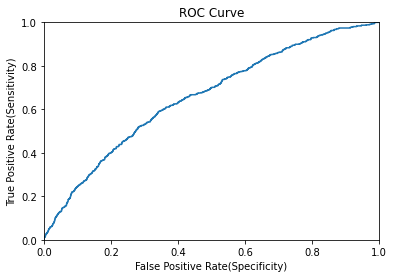

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(M1_OUS_false_positive_rate, M1_OUS_true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

##### **AUC**

In [ ]:
M1_OUS_roc_auc = auc(M1_OUS_false_positive_rate, M1_OUS_true_positive_rate)
M1_OUS_roc_auc

0.6576885437739627

#### **2.SMOTE:Sinthetic Minority Oversampling Technique**

In [ ]:
print("Actual Data :", NumericDf.shape)

#Frequency count on target column
M1_SMOT_freq=NumericDf['Target'].value_counts()
print(M1_SMOT_freq)
print((M1_SMOT_freq/M1_SMOT_freq.sum())*100)

#Classwise data
M1_SMOT_credit_risk_class0 = NumericDf[NumericDf['Target'] == 0]
M1_SMOT_credit_risk_class1 = NumericDf[NumericDf['Target'] == 1]

print("Class0 Actual :", M1_SMOT_credit_risk_class0.shape)
print("Class1 Actual  :", M1_SMOT_credit_risk_class1.shape)

Actual Data : (36457, 15)
0    35841
1      616
Name: Target, dtype: int64
0    98.310338
1     1.689662
Name: Target, dtype: float64
Class0 Actual : (35841, 15)
Class1 Actual  : (616, 15)


##### SMOTE Function

In [ ]:
print(NumericDf.columns)
M1_SMOT_X_train=NumericDf.iloc[:,1:]
M1_SMOT_y_train=NumericDf["Target"]
print(M1_SMOT_X_train.shape)
print(M1_SMOT_y_train.shape)

Index(['Target', 'IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'EmpExperience', 'Employement_Status', 'Marriage_Status'],
      dtype='object')
(36457, 14)
(36457,)


In [ ]:
M1_SMOT_X_train

,IncomeTotal,Gender,Car,House,NoOfChild,Age,WkPhone,Phone,email,FamSize,Account_Length,EmpExperience,Employement_Status,Marriage_Status
0,427500.0,1,1,1,0,32,1,0,0,2,15,12,1,1
1,427500.0,1,1,1,0,32,1,0,0,2,14,12,1,1
2,112500.0,1,1,1,0,58,0,0,0,2,29,3,1,1
3,270000.0,0,0,1,0,52,0,1,1,1,4,8,1,0
4,270000.0,0,0,1,0,52,0,1,1,1,26,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,315000.0,1,1,1,0,47,0,0,0,2,11,6,1,1
36453,157500.0,0,0,1,0,33,0,1,1,2,23,3,1,1
36454,157500.0,0,0,1,0,33,0,1,1,2,32,3,1,1
36455,283500.0,0,0,1,0,49,0,0,0,2,9,1,1,1


In [ ]:
M1_SMOT_y_train

0        0
1        0
2        0
3        0
4        0
        ..
36452    1
36453    1
36454    1
36455    1
36456    1
Name: Target, Length: 36457, dtype: int64

##### Mention the sample size

In [ ]:
from imblearn.over_sampling import SMOTE 
M1_SMOT_smote = SMOTE(sampling_strategy=0.6, random_state = 22)
M1_SMOT_X, M1_SMOT_y = M1_SMOT_smote.fit_resample(M1_SMOT_X_train, M1_SMOT_y_train)

import collections
print("Before SMOTE", collections.Counter(M1_SMOT_y_train))
print("After SMOTE", collections.Counter(M1_SMOT_y))

Before SMOTE Counter({0: 35841, 1: 616})
After SMOTE Counter({0: 35841, 1: 21504})


In [ ]:
M1_SMOT_credit_smote=M1_SMOT_X
M1_SMOT_credit_smote["Target"]=M1_SMOT_y

In [ ]:
M1_SMOT_credit_smote.columns

Index(['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone',
       'Phone', 'email', 'FamSize', 'Account_Length', 'EmpExperience',
       'Employement_Status', 'Marriage_Status', 'Target'],
      dtype='object')

In [ ]:
M1_SMOT_credit_smote["Target"].value_counts()

0    35841
1    21504
Name: Target, dtype: int64

##### Model with balanced data - SMOTE

In [ ]:
M1_SMOT_model_formula='Target~Gender+Car+House+NoOfChild+email+Age+FamSize+Account_Length+IncomeTotal+WkPhone+Phone+EmpExperience+Employement_Status+Marriage_Status'

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
M1_SMOT_credit_risk_balanced=M1_SMOT_credit_smote
risk_model=sm.logit(M1_SMOT_model_formula, data=M1_SMOT_credit_risk_balanced)
M1_SMOT_results=risk_model.fit()
print(M1_SMOT_results.summary())

Optimization terminated successfully.
         Current function value: 0.500329
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                57345
Model:                          Logit   Df Residuals:                    57330
Method:                           MLE   Df Model:                           14
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                  0.2437
Time:                        18:38:35   Log-Likelihood:                -28691.
converged:                       True   LL-Null:                       -37937.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0530      0.091      0.582      0.561      -0.125       0.231
Gende

##### **Updated Sensitivity and Specificity**

In [ ]:
#####Create the confusion matrix
###predict the variable active customer from logistic fit####
M1_SMOT_predictions = M1_SMOT_results.predict()
M1_SMOT_threshold=0.5
M1_SMOT_predicted_class1=[ 0 if x < M1_SMOT_threshold else 1 for x in M1_SMOT_predictions]

M1_SMOT_cm = confusion_matrix(M1_SMOT_credit_risk_balanced["Target"],M1_SMOT_predicted_class1)
print('Confusion Matrix : \n', M1_SMOT_cm)

M1_SMOT_total=sum(sum(M1_SMOT_cm))
#####from confusion matrix calculate accuracy
M1_SMOT_accuracy=(M1_SMOT_cm[0,0]+M1_SMOT_cm[1,1])/M1_SMOT_total
print ('Accuracy : ', M1_SMOT_accuracy)

M1_SMOT_sensitivity = M1_SMOT_cm[0,0]/(M1_SMOT_cm[0,0]+M1_SMOT_cm[0,1])
print('Sensitivity : ', M1_SMOT_sensitivity )

M1_SMOT_specificity = M1_SMOT_cm[1,1]/(M1_SMOT_cm[1,0]+M1_SMOT_cm[1,1])
print('Specificity : ', M1_SMOT_specificity)

Confusion Matrix : 
 [[30689  5152]
 [ 8563 12941]]
Accuracy :  0.760833551312233
Sensitivity :  0.8562540107697888
Specificity :  0.6017950148809523


##### Multicollinearity

In [ ]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
vif_cal(input_data=M1_SMOT_credit_risk_balanced, dependent_col="Target")

IncomeTotal  VIF =  1.12
Gender  VIF =  1.21
Car  VIF =  1.2
House  VIF =  1.07
NoOfChild  VIF =  9.52
Age  VIF =  1.54
WkPhone  VIF =  1.22
Phone  VIF =  1.15
email  VIF =  1.03
FamSize  VIF =  14.02
Account_Length  VIF =  1.01
EmpExperience  VIF =  1.41
Employement_Status  VIF =  1.84
Marriage_Status  VIF =  3.87


FamSize  VIF =  13.86 droping it

In [ ]:
M1_SMOT_credit_risk_balanced.columns

Index(['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone',
       'Phone', 'email', 'FamSize', 'Account_Length', 'EmpExperience',
       'Employement_Status', 'Marriage_Status', 'Target'],
      dtype='object')

In [ ]:
M1_SMOT_credit_risk_balanced=M1_SMOT_credit_risk_balanced[['Target', 'IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age',
       'WkPhone', 'Phone', 'email','Account_Length',
       'EmpExperience', 'Employement_Status', 'Marriage_Status']]

In [ ]:
vif_cal(input_data=M1_SMOT_credit_risk_balanced, dependent_col="Target")

IncomeTotal  VIF =  1.12
Gender  VIF =  1.21
Car  VIF =  1.2
House  VIF =  1.07
NoOfChild  VIF =  1.17
Age  VIF =  1.54
WkPhone  VIF =  1.22
Phone  VIF =  1.15
email  VIF =  1.03
Account_Length  VIF =  1.01
EmpExperience  VIF =  1.41
Employement_Status  VIF =  1.84
Marriage_Status  VIF =  1.11


All features have less than 5 VIF

##### Individual Impact of Variables

In [ ]:
M1_SMOT_model_formula='Target~Gender+Car+House+NoOfChild+email+Age+Account_Length+IncomeTotal+WkPhone+Phone+EmpExperience+Employement_Status+Marriage_Status'

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
M1_SMOT_risk_model=sm.logit(M1_SMOT_model_formula, data=M1_SMOT_credit_risk_balanced)
M1_SMOT_results=M1_SMOT_risk_model.fit()
print(M1_SMOT_results.summary())

Optimization terminated successfully.
         Current function value: 0.508891
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                57345
Model:                          Logit   Df Residuals:                    57331
Method:                           MLE   Df Model:                           13
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                  0.2308
Time:                        18:39:10   Log-Likelihood:                -29182.
converged:                       True   LL-Null:                       -37937.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.8300      0.067     27.504      0.000       1.700       1.960
Gende

All Features Have Less Than 0.05 P Value

##### **TRAIN & TEST DATA**

In [ ]:
print(M1_SMOT_credit_risk_balanced.columns)
print(M1_SMOT_credit_risk_balanced.shape)

Index(['Target', 'IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age',
       'WkPhone', 'Phone', 'email', 'Account_Length', 'EmpExperience',
       'Employement_Status', 'Marriage_Status'],
      dtype='object')
(57345, 14)


In [ ]:
print(M1_SMOT_X.columns)
print(M1_SMOT_X.shape)

Index(['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone',
       'Phone', 'email', 'FamSize', 'Account_Length', 'EmpExperience',
       'Employement_Status', 'Marriage_Status', 'Target'],
      dtype='object')
(57345, 15)


In [ ]:
M1_SMOT_X=M1_SMOT_X.drop('Target',axis=1)

In [ ]:
M1_SMOT_y

0        0
1        0
2        0
3        0
4        0
        ..
57340    1
57341    1
57342    1
57343    1
57344    1
Name: Target, Length: 57345, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
M1_SMOT_X_train, M1_SMOT_X_test, M1_SMOT_y_train, M1_SMOT_y_test = train_test_split(M1_SMOT_X, M1_SMOT_y, test_size=0.2,random_state=22)

In [ ]:
import statsmodels.api as sm
M1_SMOT_logistic=sm.Logit(M1_SMOT_y_train,M1_SMOT_X_train)
M1_SMOT_SUMMARY=M1_SMOT_logistic.fit()
print(M1_SMOT_SUMMARY.summary())

Optimization terminated successfully.
         Current function value: 0.500665
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                45876
Model:                          Logit   Df Residuals:                    45862
Method:                           MLE   Df Model:                           13
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                  0.2425
Time:                        18:40:07   Log-Likelihood:                -22968.
converged:                       True   LL-Null:                       -30320.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
IncomeTotal         1.924e-06   1.23e-07     15.627      0.000    1.68e-06    2.17e-06
Gende

In [ ]:
#training Tree Model

M1_SMOT_predict1 = M1_SMOT_SUMMARY.predict(M1_SMOT_X_train)
M1_SMOT_predict2 = M1_SMOT_SUMMARY.predict(M1_SMOT_X_test)

M1_SMOT_threshold1=0.5
M1_SMOT_predicted1_class1=[ 0 if x < M1_SMOT_threshold1 else 1 for x in M1_SMOT_predict1]

M1_SMOT_threshold2=0.5
M1_SMOT_predicted2_class1=[ 0 if x < M1_SMOT_threshold2 else 1 for x in M1_SMOT_predict2]


#On Train Data
print("=====================\n On Train Data : \n=====================")
M1_SMOT_cm1 = confusion_matrix(M1_SMOT_y_train,M1_SMOT_predicted1_class1)
print("Confusion Matrix : \n", M1_SMOT_cm1)
M1_SMOT_total1 = sum(sum(M1_SMOT_cm1))
M1_SMOT_accuracy1 = (M1_SMOT_cm1[0,0]+M1_SMOT_cm1[1,1])/M1_SMOT_total1
print("Train Accuracy", M1_SMOT_accuracy1)
M1_SMOT_sensitivity1 = M1_SMOT_cm1[0,0]/(M1_SMOT_cm1[0,0]+M1_SMOT_cm1[0,1])
print('Sensitivity : ', M1_SMOT_sensitivity1 )
M1_SMOT_specificity1 = M1_SMOT_cm1[1,1]/(M1_SMOT_cm1[1,0]+M1_SMOT_cm1[1,1])
print('Specificity : ', M1_SMOT_specificity1)

#On Test Data
print("\n=====================\n On Test Data : \n=====================")
M1_SMOT_cm2 = confusion_matrix(M1_SMOT_y_test,M1_SMOT_predicted2_class1)
print("Confusion Matrix : \n", M1_SMOT_cm2)
M1_SMOT_total2 = sum(sum(M1_SMOT_cm2))
M1_SMOT_accuracy2 = (M1_SMOT_cm2[0,0]+M1_SMOT_cm2[1,1])/M1_SMOT_total2
print("Test Accuracy", M1_SMOT_accuracy2)
M1_SMOT_sensitivity2 = M1_SMOT_cm2[0,0]/(M1_SMOT_cm2[0,0]+M1_SMOT_cm2[0,1])
print('Sensitivity : ', M1_SMOT_sensitivity2 )
M1_SMOT_specificity2 = M1_SMOT_cm2[1,1]/(M1_SMOT_cm2[1,0]+M1_SMOT_cm2[1,1])
print('Specificity : ', M1_SMOT_specificity2)

#Difference
print("\n=====================\n Difference Data : \n=====================")
print('Accuracy',(M1_SMOT_accuracy1-M1_SMOT_accuracy2)*100)
print('Sensitivity',(M1_SMOT_sensitivity1-M1_SMOT_sensitivity2)*100)
print('Specificity',(M1_SMOT_specificity1-M1_SMOT_specificity2)*100)


 On Train Data : 
Confusion Matrix : 
 [[24615  4115]
 [ 6859 10287]]
Train Accuracy 0.7607899555323044
Sensitivity :  0.8567699269056736
Specificity :  0.5999650064154904

 On Test Data : 
Confusion Matrix : 
 [[6092 1019]
 [1706 2652]]
Test Accuracy 0.762402999389659
Sensitivity :  0.856700885951343
Specificity :  0.6085360256998623

 Difference Data : 
Accuracy -0.16130438573546124
Sensitivity 0.006904095433057922
Specificity -0.8571019284371872


#### **Applying Original Data to MODEL**

In [ ]:
#####Create the confusion matrix
###predict the variable active customer from logistic fit####
M1_SMOT_predictions = M1_SMOT_results.predict(M1_N_X)
M1_SMOT_threshold=0.5
M1_SMOT_predicted_class1=[ 0 if x < M1_SMOT_threshold else 1 for x in M1_SMOT_predictions]

M1_SMOT_cm = confusion_matrix(M1_N_y,M1_SMOT_predicted_class1)
print('Confusion Matrix : \n', M1_SMOT_cm)

M1_SMOT_total=sum(sum(M1_SMOT_cm))
#####from confusion matrix calculate accuracy
M1_SMOT_accuracy=(M1_SMOT_cm[0,0]+M1_SMOT_cm[1,1])/M1_SMOT_total
print ('Accuracy\t: ', M1_SMOT_accuracy)

M1_SMOT_sensitivity = M1_SMOT_cm[0,0]/(M1_SMOT_cm[0,0]+M1_SMOT_cm[0,1])
print('Sensitivity\t: ', M1_SMOT_sensitivity )

M1_SMOT_specificity = M1_SMOT_cm[1,1]/(M1_SMOT_cm[1,0]+M1_SMOT_cm[1,1])
print('Specificity\t: ', M1_SMOT_specificity)

Confusion Matrix : 
 [[30320  5521]
 [  470   146]]
Accuracy	:  0.8356694187673149
Sensitivity	:  0.8459585391032616
Specificity	:  0.237012987012987


##### **Updated Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
M1_SMOT_accuracy=(M1_SMOT_cm[0,0]+M1_SMOT_cm[1,1])/M1_SMOT_total
print ('Accuracy : ', M1_SMOT_accuracy)

M1_SMOT_Precision_Class0 = M1_SMOT_cm[0,0]/(M1_SMOT_cm[0,0]+M1_SMOT_cm[1,0])
print('Precision_Class0 : ', M1_SMOT_Precision_Class0 )

M1_SMOT_Recall_Class0 = M1_SMOT_cm[0,0]/(M1_SMOT_cm[0,0]+M1_SMOT_cm[0,1])
print('Recall_Class0 : ', M1_SMOT_Recall_Class0 )

M1_SMOT_F1_Class0 = 2/((1/M1_SMOT_Precision_Class0)+(1/M1_SMOT_Recall_Class0))
print('F1_Class0 : ', M1_SMOT_F1_Class0 )


M1_SMOT_Precision_Class1 = M1_SMOT_cm[1,1]/(M1_SMOT_cm[0,1]+M1_SMOT_cm[1,1])
print('Precision_Class1 : ', M1_SMOT_Precision_Class1 )

M1_SMOT_Recall_Class1 = M1_SMOT_cm[1,1]/(M1_SMOT_cm[1,0]+M1_SMOT_cm[1,1])
print('Recall_Class1 : ', M1_SMOT_Recall_Class1 )

M1_SMOT_F1_Class1 = 2/((1/M1_SMOT_Precision_Class1)+(1/M1_SMOT_Recall_Class1))
print('F1_Class1 : ', M1_SMOT_F1_Class1 )

Accuracy :  0.8356694187673149
Precision_Class0 :  0.9847353036700227
Recall_Class0 :  0.8459585391032616
F1_Class0 :  0.910086896489622
Precision_Class1 :  0.025763190400564673
Recall_Class1 :  0.237012987012987
F1_Class1 :  0.046474614037879995


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(M1_N_y,M1_SMOT_predicted_class1))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     35841
           1       0.03      0.24      0.05       616

    accuracy                           0.84     36457
   macro avg       0.51      0.54      0.48     36457
weighted avg       0.97      0.84      0.90     36457



##### **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

M1_SMOT_actual = NumericDf["Target"]
M1_SMOT_false_positive_rate, M1_SMOT_true_positive_rate, M1_SMOT_thresholds = roc_curve(M1_SMOT_actual, M1_SMOT_predictions)
print("false_positive_rate", M1_SMOT_false_positive_rate)
print("true_positive_rate", M1_SMOT_true_positive_rate)
print("thresholds", M1_SMOT_thresholds)

false_positive_rate [0.00000000e+00 2.79010072e-05 1.11604029e-04 ... 9.99832594e-01
 9.99888396e-01 1.00000000e+00]
true_positive_rate [0. 0. 0. ... 1. 1. 1.]
thresholds [1.94960817e+00 9.49608166e-01 9.39261616e-01 ... 2.12363235e-03
 1.52191833e-03 1.36701950e-04]


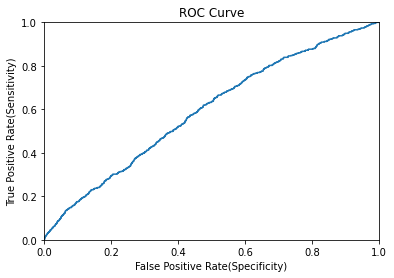

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(M1_SMOT_false_positive_rate, M1_SMOT_true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

##### **AUC**

In [ ]:
M1_SMOT_roc_auc = auc(M1_SMOT_false_positive_rate, M1_SMOT_true_positive_rate)
M1_SMOT_roc_auc

0.5924577553386041

### Model with Feature Engineering

In [ ]:
feature_engineer_data.columns

Index(['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')

In [ ]:
from sklearn import tree

M1_Fe_features= ['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation']
print("Features",M1_Fe_features)

M1_Fe_X = feature_engineer_data[M1_Fe_features]
print("X shape", M1_Fe_X.shape)
M1_Fe_y = feature_engineer_data['Target']
print("Y shape", M1_Fe_y.shape)

Features ['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length', 'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience', 'EmpExp_Category', 'Employement_Status', 'Commercial_associate', 'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage', 'Married', 'Separated', 'Single_or_not_married', 'Widow', 'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment', 'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants', 'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff', 'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers', 'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents', 'Sales_staff', 'Secretaries', 'Security_staff', 'Waiters_or_barmen_staff', 'Children_Segmentation', 'FamSize_Segmentation']
X shape (36457, 53)
Y shape (36457,)


In [ ]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
M1_FE_logistic = LogisticRegression()

In [ ]:
from pandas.core.common import random_state
M1_FE_logistic.fit(M1_Fe_X,M1_Fe_y)

LogisticRegression()

In [ ]:
print("Intercept", M1_FE_logistic.intercept_)
print("Coefficient", M1_FE_logistic.coef_)

Intercept [-0.00116011]
Coefficient [[ 3.99856999e-05 -1.47859786e-04 -8.42782027e-04 -3.94635070e-04
  -6.68261503e-06 -1.24403968e-03 -3.15184838e-04 -3.66568051e-04
  -4.14757813e-05 -2.54401183e-03 -1.85280356e-02 -1.01304398e-03
  -5.62862302e-02 -2.81434648e-03 -6.07933510e-03 -9.58277222e-04
  -6.34991465e-04 -4.98868197e-05 -4.30391065e-04 -1.03822534e-04
  -5.13309692e-07 -5.75497014e-04 -8.17545229e-05 -9.31289460e-04
  -6.75948504e-05 -5.52762582e-05 -2.41956510e-05 -2.39172489e-06
  -1.06579286e-03 -2.31149299e-05  3.31441875e-06 -1.13397293e-05
  -6.07859176e-05 -1.43530489e-05 -5.39975625e-05 -4.90542408e-05
  -6.23677817e-05  3.44033736e-05 -1.12592149e-06 -1.08834037e-06
   4.19387137e-06 -1.45553316e-04 -3.03764653e-06  3.80434069e-05
  -8.52314307e-05 -1.10198272e-05 -9.39978111e-07 -1.60081710e-04
  -7.47251444e-06 -1.19510721e-05 -6.29477003e-04 -2.02935087e-03
  -1.15086672e-03]]


#### Model Validation
Confusion matrix, Sensitivity, Specificity, F1 Score, Recall, Precision etc

#### **Confusion Matrix & Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
M1_FE_predict=M1_FE_logistic.predict(M1_Fe_X)
M1_FE_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
M1_FE_pred=pd.DataFrame(M1_FE_predict)
M1_FE_pred.value_counts()

0    36457
dtype: int64

In [ ]:
M1_FE_cm = confusion_matrix(feature_engineer_data['Target'],M1_FE_pred)
M1_FE_cm

array([[35841,     0],
       [  616,     0]])

FOUND THIS MODEL HAS CLASS IMBALANCE.
       
AS TARGET VARIABLE IS 1 SPECIFICITY IS REQUIRED TO CALCULATE ACCURACY.

#### **Sensitivity and Specificity**

In [ ]:
M1_FE_total=sum(sum(M1_FE_cm))
M1_FE_accuracy=(M1_FE_cm[0,0]+M1_FE_cm[1,1])/M1_FE_total
print ('Accuracy : ', M1_FE_accuracy)

M1_FE_sensitivity = M1_FE_cm[0,0]/(M1_FE_cm[0,0]+M1_FE_cm[0,1])
print('Sensitivity : ', M1_FE_sensitivity )

M1_FE_specificity = M1_FE_cm[1,1]/(M1_FE_cm[1,0]+M1_FE_cm[1,1])
print('Specificity : ', M1_FE_specificity)

Accuracy :  0.9831033820665441
Sensitivity :  1.0
Specificity :  0.0


AS TARGET VARIABLE IS 1 SPECIFICITY IS REQUIRED TO INCREASE.

#### THRESHOLD

In [ ]:
### Converting predicted values into classes using new threshold
M1_FE_threshold=0.2
M1_FE_predicted_class1=[ 0 if x < M1_FE_threshold else 1 for x in M1_FE_predict]

In [ ]:
#Change in Confusion Matrix, Accuracy and Sensitivity-Specificity
#Confusion matrix, Accuracy, sensitivity and specificity
M1_FE_cm1 = confusion_matrix(feature_engineer_data['Target'],M1_FE_predicted_class1)
print('Confusion Matrix : \n', M1_FE_cm1)

M1_FE_total1=sum(sum(M1_FE_cm1))
#####from confusion matrix calculate accuracy
M1_FE_accuracy1=(M1_FE_cm1[0,0]+M1_FE_cm1[1,1])/M1_FE_total1
print ('Accuracy : ', M1_FE_accuracy1)

M1_FE_sensitivity1 = M1_FE_cm1[0,0]/(M1_FE_cm1[0,0]+M1_FE_cm1[0,1])
print('Sensitivity : ', M1_FE_sensitivity1 )

M1_FE_specificity1 = M1_FE_cm1[1,1]/(M1_FE_cm1[1,0]+M1_FE_cm1[1,1])
print('Specificity : ', M1_FE_specificity1)

Confusion Matrix : 
 [[35841     0]
 [  616     0]]
Accuracy :  0.9831033820665441
Sensitivity :  1.0
Specificity :  0.0


ADJUSTING THRESHOLD HAS NO EFFECT ON IT

#### Handling Class Imbalance

In [ ]:
print("Actual Data :", feature_engineer_data.shape)

#Frequency count on target column
M1_FE_freq=feature_engineer_data['Target'].value_counts()
print(M1_FE_freq)
print('\n% distribution\n',(M1_FE_freq/M1_FE_freq.sum())*100)

#Classwise data
M1_FE_credit_risk_class0 = feature_engineer_data[feature_engineer_data['Target'] == 0]
M1_FE_credit_risk_class1 = feature_engineer_data[feature_engineer_data['Target'] == 1]

print("\nClass0 Actual :", M1_FE_credit_risk_class0.shape)
print("Class1 Actual  :", M1_FE_credit_risk_class1.shape)

Actual Data : (36457, 54)
0    35841
1      616
Name: Target, dtype: int64

% distribution
 0    98.310338
1     1.689662
Name: Target, dtype: float64

Class0 Actual : (35841, 54)
Class1 Actual  : (616, 54)


#### **1. OVERSAMPLING/UNDERSAMPLING**

In [ ]:
##Undersampling of class-0
## Consider half of class-0
M1_FE_credit_risk_class0_under = M1_FE_credit_risk_class0.sample(int(0.5*len(M1_FE_credit_risk_class0)))
print("Class0 Undersample :", M1_FE_credit_risk_class0_under.shape)

##Oversampling of Class-1 
# Lets increase the size by 26 times
M1_FE_credit_risk_class1_over = M1_FE_credit_risk_class1.sample(25*len(M1_FE_credit_risk_class1),replace=True)
print("Class1 Oversample :", M1_FE_credit_risk_class1_over.shape)

#Concatenate to create the final balanced data
M1_FE_OUS_credit_risk_balanced=pd.concat([M1_FE_credit_risk_class0_under,M1_FE_credit_risk_class1_over])
print("\nFinal Balannced Data :", M1_FE_OUS_credit_risk_balanced.shape)

#Frequency count on target column in the balanced data
M1_FE_freq=M1_FE_OUS_credit_risk_balanced['Target'].value_counts()
print(M1_FE_freq)
print('\nIn %\n',(M1_FE_freq/M1_FE_freq.sum())*100)

Class0 Undersample : (17920, 54)
Class1 Oversample : (15400, 54)

Final Balannced Data : (33320, 54)
0    17920
1    15400
Name: Target, dtype: int64

In %
 0    53.781513
1    46.218487
Name: Target, dtype: float64


##### Model with balanced data

In [ ]:
M1_FE_OUS_credit_risk_balanced

,Target,Gender,Car,House,NoOfChild,IncomeTotal,Education,WkPhone,Phone,email,...,Managers,Medicine_staff,Private_service_staff,Realty_agents,Sales_staff,Secretaries,Security_staff,Waiters_or_barmen_staff,Children_Segmentation,FamSize_Segmentation
25160,0,0,0,0,1,90000.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
10452,0,0,0,1,0,112500.0,1,0,0,0,...,0,0,0,0,0,0,0,1,2,1
20068,0,0,0,1,0,171000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,1
24207,0,0,0,1,0,94500.0,3,0,0,0,...,0,0,0,0,0,0,0,1,2,1
19478,0,0,1,1,0,157500.0,3,1,1,0,...,1,0,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36352,1,0,0,1,0,292500.0,1,0,0,1,...,0,0,0,0,1,0,0,0,2,1
24008,1,0,0,0,0,135000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,1
36219,1,0,0,1,0,103500.0,1,0,0,1,...,0,0,0,0,0,0,0,0,2,1
990,1,0,0,1,0,112500.0,1,0,0,0,...,0,0,0,0,0,0,0,1,2,1


In [ ]:
M1_FE_OUS_credit_risk_balanced.columns

Index(['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')

In [ ]:
## Function for OLS formula
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the y~X style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

In [ ]:
M1_FE_OUS_model_formula=ols_formula(M1_FE_OUS_credit_risk_balanced, dependent_var="Target")
print('Model Formula\n',M1_FE_OUS_model_formula)

Model Formula
 Target ~ Gender + Car + House + NoOfChild + IncomeTotal + Education + WkPhone + Phone + email + FamSize + Account_Length + Marriage_Status + Age + Age_Bucket + EmpExperience + EmpExp_Category + Employement_Status + Commercial_associate + Pensioner + State_servant + Student + Working + Civil_marriage + Married + Separated + Single_or_not_married + Widow + Co_Op_Appartment + House_Or_apartment + Municipal_apartment + Office_apartment + Rented_apartment + With_parents + Accountants + Cleaning_staff + Cooking_staff + Core_staff + Drivers + HR_staff + High_skill_tech_staff + IT_staff + Laborers + Low_skill_Laborers + Managers + Medicine_staff + Private_service_staff + Realty_agents + Sales_staff + Secretaries + Security_staff + Waiters_or_barmen_staff + Children_Segmentation + FamSize_Segmentation


In [ ]:
import statsmodels.formula.api as sm

In [ ]:
M1_FE_OUS_risk_model=sm.logit(M1_FE_OUS_model_formula, data=M1_FE_OUS_credit_risk_balanced)
M1_FE_OUS_results=M1_FE_OUS_risk_model.fit()
print(M1_FE_OUS_results.summary())

         Current function value: 0.633191
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                33320
Model:                          Logit   Df Residuals:                    33271
Method:                           MLE   Df Model:                           48
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                 0.08271
Time:                        18:42:35   Log-Likelihood:                -21098.
converged:                      False   LL-Null:                       -23000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -4.1267   3.47e+05  -1.19e-05      1.000    -6.8e+05     6.8e+05
Gender                      0.3529      0.031     11.544      0.000       0.293       0.413


##### **Updated Sensitivity and Specificity**

In [ ]:
#####Create the confusion matrix
###predict the variable active customer from logistic fit####
M1_FE_OUS_predictions = M1_FE_OUS_results.predict()
M1_FE_OUS_threshold=0.5
M1_FE_OUS_predicted_class1=[ 0 if x < M1_FE_OUS_threshold else 1 for x in M1_FE_OUS_predictions]

M1_FE_OUS_cm1 = confusion_matrix(M1_FE_OUS_credit_risk_balanced["Target"],M1_FE_OUS_predicted_class1)
print('Confusion Matrix : \n', M1_FE_OUS_cm1)

M1_FE_OUS_total1=sum(sum(M1_FE_OUS_cm1))
#####from confusion matrix calculate accuracy
M1_FE_OUS_accuracy1=(M1_FE_OUS_cm1[0,0]+M1_FE_OUS_cm1[1,1])/M1_FE_OUS_total1
print ('Accuracy : ', M1_FE_OUS_accuracy1)

M1_FE_OUS_sensitivity1 = M1_FE_OUS_cm1[0,0]/(M1_FE_OUS_cm1[0,0]+M1_FE_OUS_cm1[0,1])
print('Sensitivity : ', M1_FE_OUS_sensitivity1 )

M1_FE_OUS_specificity1 = M1_FE_OUS_cm1[1,1]/(M1_FE_OUS_cm1[1,0]+M1_FE_OUS_cm1[1,1])
print('Specificity : ', M1_FE_OUS_specificity1)

Confusion Matrix : 
 [[12804  5116]
 [ 6839  8561]]
Accuracy :  0.6412064825930373
Sensitivity :  0.7145089285714286
Specificity :  0.5559090909090909


##### Multicollinearity

In [ ]:
M1_FE_OUS_credit_risk_balanced.columns

Index(['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
list1=['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Gender  VIF =  1.58
Car  VIF =  1.24
House  VIF =  1.15
NoOfChild  VIF =  20.51
IncomeTotal  VIF =  1.28
Education  VIF =  1.27
WkPhone  VIF =  1.34
Phone  VIF =  1.18
email  VIF =  1.1
FamSize  VIF =  20.37
Account_Length  VIF =  1.03


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Marriage_Status  VIF =  inf
Age  VIF =  19.6
Age_Bucket  VIF =  17.72
EmpExperience  VIF =  7.9
EmpExp_Category  VIF =  12.56
Employement_Status  VIF =  4.79
Commercial_associate  VIF =  inf
Pensioner  VIF =  inf
State_servant  VIF =  inf
Student  VIF =  inf
Working  VIF =  inf
Civil_marriage  VIF =  inf
Married  VIF =  inf
Separated  VIF =  inf
Single_or_not_married  VIF =  inf
Widow  VIF =  inf
Co_Op_Appartment  VIF =  inf
House_Or_apartment  VIF =  inf
Municipal_apartment  VIF =  inf
Office_apartment  VIF =  inf
Rented_apartment  VIF =  inf
With_parents  VIF =  inf
Accountants  VIF =  inf
Cleaning_staff  VIF =  inf
Cooking_staff  VIF =  inf
Core_staff  VIF =  inf
Drivers  VIF =  inf
HR_staff  VIF =  inf
High_skill_tech_staff  VIF =  inf
IT_staff  VIF =  inf
Laborers  VIF =  inf
Low_skill_Laborers  VIF =  inf
Managers  VIF =  inf
Medicine_staff  VIF =  inf
Private_service_staff  VIF =  inf
Realty_agents  VIF =  inf
Sales_staff  VIF =  inf
Secretaries  VIF =  inf
Security_staff  VIF =

As there are lots of inf value, we have to check one by one VIF of same catagory variables 

In [ ]:
list1=['Target', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Commercial_associate  VIF =  inf
Pensioner  VIF =  inf
State_servant  VIF =  inf
Student  VIF =  inf
Working  VIF =  inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


lets remove any variable (choosed-Commercial_associate)

In [ ]:
list1=['Target',
       'Pensioner', 'State_servant', 'Student', 'Working']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Pensioner  VIF =  1.46
State_servant  VIF =  1.21
Student  VIF =  1.0
Working  VIF =  1.56


all have less than 5 VIF, let's remove Pensioner

In [ ]:
list1=['Target', 'Commercial_associate',
        'State_servant', 'Student', 'Working']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Commercial_associate  VIF =  1.73
State_servant  VIF =  1.29
Student  VIF =  1.0
Working  VIF =  1.84


all have less than 5 VIF, let's remove State_servant

In [ ]:
list1=['Target', 'Commercial_associate',
       'Pensioner', 'Student', 'Working']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Commercial_associate  VIF =  3.26
Pensioner  VIF =  2.91
Student  VIF =  1.0
Working  VIF =  3.96


all have less than 5 VIF, let's remove Student

In [ ]:
list1=['Target', 'Commercial_associate',
       'Pensioner', 'State_servant','Working']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Commercial_associate  VIF =  1197.7
Pensioner  VIF =  1006.56
State_servant  VIF =  446.18
Working  VIF =  1666.07


Working has highest VIF, so Removing it

In [ ]:
list1=['Target', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Commercial_associate  VIF =  1.12
Pensioner  VIF =  1.11
State_servant  VIF =  1.06
Student  VIF =  1.0


Now Rechecking all Feature except **Working**

In [ ]:
list1=['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student','Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Gender  VIF =  1.58
Car  VIF =  1.24
House  VIF =  1.15
NoOfChild  VIF =  20.51
IncomeTotal  VIF =  1.28
Education  VIF =  1.27
WkPhone  VIF =  1.34
Phone  VIF =  1.18
email  VIF =  1.1
FamSize  VIF =  20.37
Account_Length  VIF =  1.03


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Marriage_Status  VIF =  inf
Age  VIF =  19.6
Age_Bucket  VIF =  17.72
EmpExperience  VIF =  7.9
EmpExp_Category  VIF =  12.56
Employement_Status  VIF =  4.79
Commercial_associate  VIF =  1.22
Pensioner  VIF =  3.96
State_servant  VIF =  1.2
Student  VIF =  1.0
Civil_marriage  VIF =  inf
Married  VIF =  inf
Separated  VIF =  inf
Single_or_not_married  VIF =  inf
Widow  VIF =  inf
Co_Op_Appartment  VIF =  inf
House_Or_apartment  VIF =  inf
Municipal_apartment  VIF =  inf
Office_apartment  VIF =  inf
Rented_apartment  VIF =  inf
With_parents  VIF =  inf
Accountants  VIF =  inf
Cleaning_staff  VIF =  inf
Cooking_staff  VIF =  inf
Core_staff  VIF =  inf
Drivers  VIF =  inf
HR_staff  VIF =  inf
High_skill_tech_staff  VIF =  inf
IT_staff  VIF =  inf
Laborers  VIF =  inf
Low_skill_Laborers  VIF =  inf
Managers  VIF =  inf
Medicine_staff  VIF =  inf
Private_service_staff  VIF =  inf
Realty_agents  VIF =  inf
Sales_staff  VIF =  inf
Secretaries  VIF =  inf
Security_staff  VIF =  inf
Waiters_or_b

All category of IncomeType Checked, Now need to check **Marriage category**.

In [ ]:
list1=['Target','Civil_marriage','Married', 'Separated', 'Single_or_not_married', 'Widow']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Civil_marriage  VIF =  inf
Married  VIF =  inf
Separated  VIF =  inf
Single_or_not_married  VIF =  inf
Widow  VIF =  inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
list1=['Target','Married', 'Separated', 'Single_or_not_married', 'Widow']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Married  VIF =  3.18
Separated  VIF =  1.6
Single_or_not_married  VIF =  2.45
Widow  VIF =  1.62


Let's remove **Married**

In [ ]:
list1=['Target','Civil_marriage','Separated', 'Single_or_not_married', 'Widow']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Civil_marriage  VIF =  1.03
Separated  VIF =  1.02
Single_or_not_married  VIF =  1.04
Widow  VIF =  1.02


All VIF below 5 after removing **married**

In [ ]:
list1=['Target','Civil_marriage','Married','Single_or_not_married', 'Widow']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Civil_marriage  VIF =  2.26
Married  VIF =  4.47
Single_or_not_married  VIF =  3.17
Widow  VIF =  1.93


All VIF below 5 after removing **separated**

In [ ]:
list1=['Target','Civil_marriage','Married', 'Separated', 'Widow']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Civil_marriage  VIF =  1.41
Married  VIF =  1.86
Separated  VIF =  1.29
Widow  VIF =  1.31


All VIF below 5 after removing **Single_or_not_married**

In [ ]:
list1=['Target','Civil_marriage','Married', 'Separated', 'Single_or_not_married']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Civil_marriage  VIF =  2.2
Married  VIF =  4.28
Separated  VIF =  1.85
Single_or_not_married  VIF =  3.07


Among all category **Married** has highest VIF ,SO Remove it from final list

In [ ]:
list1=['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student','Civil_marriage',
       'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Gender  VIF =  1.58
Car  VIF =  1.24
House  VIF =  1.15
NoOfChild  VIF =  20.51
IncomeTotal  VIF =  1.28
Education  VIF =  1.27
WkPhone  VIF =  1.34
Phone  VIF =  1.18
email  VIF =  1.1
FamSize  VIF =  20.37
Account_Length  VIF =  1.03


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Marriage_Status  VIF =  inf
Age  VIF =  19.6
Age_Bucket  VIF =  17.72
EmpExperience  VIF =  7.9
EmpExp_Category  VIF =  12.56
Employement_Status  VIF =  4.79
Commercial_associate  VIF =  1.22
Pensioner  VIF =  3.96
State_servant  VIF =  1.2
Student  VIF =  1.0
Civil_marriage  VIF =  1.1
Separated  VIF =  inf
Single_or_not_married  VIF =  inf
Widow  VIF =  inf
Co_Op_Appartment  VIF =  inf
House_Or_apartment  VIF =  inf
Municipal_apartment  VIF =  inf
Office_apartment  VIF =  inf
Rented_apartment  VIF =  inf
With_parents  VIF =  inf
Accountants  VIF =  inf
Cleaning_staff  VIF =  inf
Cooking_staff  VIF =  inf
Core_staff  VIF =  inf
Drivers  VIF =  inf
HR_staff  VIF =  inf
High_skill_tech_staff  VIF =  inf
IT_staff  VIF =  inf
Laborers  VIF =  inf
Low_skill_Laborers  VIF =  inf
Managers  VIF =  inf
Medicine_staff  VIF =  inf
Private_service_staff  VIF =  inf
Realty_agents  VIF =  inf
Sales_staff  VIF =  inf
Secretaries  VIF =  inf
Security_staff  VIF =  inf
Waiters_or_barmen_staff  VIF =  

As **Marriage_Status** Also same type variable Let's Remove it.

In [ ]:
list1=['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student','Civil_marriage',
       'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Gender  VIF =  1.58
Car  VIF =  1.24
House  VIF =  1.15
NoOfChild  VIF =  20.51
IncomeTotal  VIF =  1.28
Education  VIF =  1.27
WkPhone  VIF =  1.34
Phone  VIF =  1.18
email  VIF =  1.1
FamSize  VIF =  20.37
Account_Length  VIF =  1.03
Age  VIF =  19.6
Age_Bucket  VIF =  17.72
EmpExperience  VIF =  7.9
EmpExp_Category  VIF =  12.56
Employement_Status  VIF =  4.79
Commercial_associate  VIF =  1.22
Pensioner  VIF =  3.96
State_servant  VIF =  1.2
Student  VIF =  1.0
Civil_marriage  VIF =  1.1
Separated  VIF =  2.27
Single_or_not_married  VIF =  3.4
Widow  VIF =  2.47


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Co_Op_Appartment  VIF =  inf
House_Or_apartment  VIF =  inf
Municipal_apartment  VIF =  inf
Office_apartment  VIF =  inf
Rented_apartment  VIF =  inf
With_parents  VIF =  inf
Accountants  VIF =  inf
Cleaning_staff  VIF =  inf
Cooking_staff  VIF =  inf
Core_staff  VIF =  inf
Drivers  VIF =  inf
HR_staff  VIF =  inf
High_skill_tech_staff  VIF =  inf
IT_staff  VIF =  inf
Laborers  VIF =  inf
Low_skill_Laborers  VIF =  inf
Managers  VIF =  inf
Medicine_staff  VIF =  inf
Private_service_staff  VIF =  inf
Realty_agents  VIF =  inf
Sales_staff  VIF =  inf
Secretaries  VIF =  inf
Security_staff  VIF =  inf
Waiters_or_barmen_staff  VIF =  inf
Children_Segmentation  VIF =  7.4
FamSize_Segmentation  VIF =  1.37


Now need to check **HouseType** Category separately

In [ ]:
list1=['Target', 'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents',]

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Co_Op_Appartment  VIF =  inf
House_Or_apartment  VIF =  inf
Municipal_apartment  VIF =  inf
Office_apartment  VIF =  inf
Rented_apartment  VIF =  inf
With_parents  VIF =  inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Let's Remove **Co_Op_Appartment**

In [ ]:
list1=['Target','House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents',]

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

House_Or_apartment  VIF =  19.88
Municipal_apartment  VIF =  8.19
Office_apartment  VIF =  2.95
Rented_apartment  VIF =  3.79
With_parents  VIF =  9.53


After Removing Co_Op_Appartment, **House_Or_apartment** has highest VIF=22.76 Let's REMOVE it

In [ ]:
list1=['Target', 'Co_Op_Appartment','Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents',]

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Co_Op_Appartment  VIF =  1.0
Municipal_apartment  VIF =  1.0
Office_apartment  VIF =  1.0
Rented_apartment  VIF =  1.0
With_parents  VIF =  1.0


After Removing House_Or_apartment, **OTHERS VIF value comes to 1**,Let's Check removing others

In [ ]:
list1=['Target', 'Co_Op_Appartment', 'House_Or_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents',]

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Co_Op_Appartment  VIF =  1.13
House_Or_apartment  VIF =  2.74
Office_apartment  VIF =  1.25
Rented_apartment  VIF =  1.36
With_parents  VIF =  2.09


After Removing Municipal_apartment, **OTHERS VIF value comes below 5**,Let's Check removing others

In [ ]:
list1=['Target', 'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Rented_apartment', 'With_parents',]

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Co_Op_Appartment  VIF =  1.5
House_Or_apartment  VIF =  10.09
Municipal_apartment  VIF =  4.61
Rented_apartment  VIF =  2.4
With_parents  VIF =  5.28


After Removing Office_apartment, **House_Or_apartment** has highest VIF=9.41 Let's REMOVE others

In [ ]:
list1=['Target', 'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment','With_parents',]

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Co_Op_Appartment  VIF =  1.34
House_Or_apartment  VIF =  7.07
Municipal_apartment  VIF =  3.5
Office_apartment  VIF =  1.68
With_parents  VIF =  3.97


After Removing Rented_apartment, **OTHERS VIF value comes below 5**,Let's Check removing With_parents

In [ ]:
list1=['Target', 'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Co_Op_Appartment  VIF =  1.11
House_Or_apartment  VIF =  2.31
Municipal_apartment  VIF =  1.77
Office_apartment  VIF =  1.21
Rented_apartment  VIF =  1.3


**Conclusion:** House_Or_apartment has highest VIF SEVERAL TIME so removing it from final list

In [ ]:
list1=['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student','Civil_marriage',
       'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment','Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Gender  VIF =  1.58
Car  VIF =  1.24
House  VIF =  1.15
NoOfChild  VIF =  20.51
IncomeTotal  VIF =  1.28
Education  VIF =  1.27
WkPhone  VIF =  1.34
Phone  VIF =  1.18
email  VIF =  1.1
FamSize  VIF =  20.37
Account_Length  VIF =  1.03
Age  VIF =  19.6
Age_Bucket  VIF =  17.72
EmpExperience  VIF =  7.9
EmpExp_Category  VIF =  12.56
Employement_Status  VIF =  4.79
Commercial_associate  VIF =  1.22
Pensioner  VIF =  3.96
State_servant  VIF =  1.2
Student  VIF =  1.0
Civil_marriage  VIF =  1.1
Separated  VIF =  2.27
Single_or_not_married  VIF =  3.4
Widow  VIF =  2.47
Co_Op_Appartment  VIF =  1.03
Municipal_apartment  VIF =  1.08
Office_apartment  VIF =  1.05
Rented_apartment  VIF =  1.03
With_parents  VIF =  1.11


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Accountants  VIF =  inf
Cleaning_staff  VIF =  inf
Cooking_staff  VIF =  inf
Core_staff  VIF =  inf
Drivers  VIF =  inf
HR_staff  VIF =  inf
High_skill_tech_staff  VIF =  inf
IT_staff  VIF =  inf
Laborers  VIF =  inf
Low_skill_Laborers  VIF =  inf
Managers  VIF =  inf
Medicine_staff  VIF =  inf
Private_service_staff  VIF =  inf
Realty_agents  VIF =  inf
Sales_staff  VIF =  inf
Secretaries  VIF =  inf
Security_staff  VIF =  inf
Waiters_or_barmen_staff  VIF =  inf
Children_Segmentation  VIF =  7.4
FamSize_Segmentation  VIF =  1.37


**OccupationType** Category need to check separetly for VIF

In [ ]:
list1=['Target','Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Accountants  VIF =  inf
Cleaning_staff  VIF =  inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


Cooking_staff  VIF =  inf
Core_staff  VIF =  inf
Drivers  VIF =  inf
HR_staff  VIF =  inf
High_skill_tech_staff  VIF =  inf
IT_staff  VIF =  inf
Laborers  VIF =  inf
Low_skill_Laborers  VIF =  inf
Managers  VIF =  inf
Medicine_staff  VIF =  inf
Private_service_staff  VIF =  inf
Realty_agents  VIF =  inf
Sales_staff  VIF =  inf
Secretaries  VIF =  inf
Security_staff  VIF =  inf
Waiters_or_barmen_staff  VIF =  inf


Let's Try removing one by one

In [ ]:
list1=['Target',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Cleaning_staff  VIF =  1.3
Cooking_staff  VIF =  1.41
Core_staff  VIF =  3.54
Drivers  VIF =  2.64
HR_staff  VIF =  1.04
High_skill_tech_staff  VIF =  2.09
IT_staff  VIF =  1.09
Laborers  VIF =  4.68
Low_skill_Laborers  VIF =  1.24
Managers  VIF =  2.94
Medicine_staff  VIF =  1.67
Private_service_staff  VIF =  1.2
Realty_agents  VIF =  1.03
Sales_staff  VIF =  3.05
Secretaries  VIF =  1.1
Security_staff  VIF =  1.49
Waiters_or_barmen_staff  VIF =  6.65


After removing Accountants, **Waiters_or_barmen_staff** has highest VIF=6.69

In [ ]:
list1=['Target','Accountants',
       'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Accountants  VIF =  4.06
Cooking_staff  VIF =  2.34
Core_staff  VIF =  9.4
Drivers  VIF =  6.41
HR_staff  VIF =  1.14
High_skill_tech_staff  VIF =  4.59
IT_staff  VIF =  1.29
Laborers  VIF =  13.21
Low_skill_Laborers  VIF =  1.8
Managers  VIF =  7.41
Medicine_staff  VIF =  3.2
Private_service_staff  VIF =  1.66
Realty_agents  VIF =  1.09
Sales_staff  VIF =  7.78
Secretaries  VIF =  1.33
Security_staff  VIF =  2.63
Waiters_or_barmen_staff  VIF =  19.86


After removing Cleaning_staff, **Waiters_or_barmen_staff** has highest VIF=18.11

In [ ]:
list1=['Target','Accountants',
       'Cleaning_staff','Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Accountants  VIF =  3.22
Cleaning_staff  VIF =  1.71
Core_staff  VIF =  7.08
Drivers  VIF =  4.91
HR_staff  VIF =  1.1
High_skill_tech_staff  VIF =  3.6
IT_staff  VIF =  1.21
Laborers  VIF =  9.84
Low_skill_Laborers  VIF =  1.58
Managers  VIF =  5.64
Medicine_staff  VIF =  2.6
Private_service_staff  VIF =  1.48
Realty_agents  VIF =  1.06
Sales_staff  VIF =  5.91
Secretaries  VIF =  1.24
Security_staff  VIF =  2.18
Waiters_or_barmen_staff  VIF =  14.63


After removing Cooking_staff, **Waiters_or_barmen_staff** has highest VIF=18.11

In [ ]:
list1=['Target','Accountants',
       'Cleaning_staff', 'Cooking_staff','Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Accountants  VIF =  1.29
Cleaning_staff  VIF =  1.09
Cooking_staff  VIF =  1.13
Drivers  VIF =  1.51
HR_staff  VIF =  1.01
High_skill_tech_staff  VIF =  1.34
IT_staff  VIF =  1.03
Laborers  VIF =  2.13
Low_skill_Laborers  VIF =  1.08
Managers  VIF =  1.6
Medicine_staff  VIF =  1.21
Private_service_staff  VIF =  1.06
Realty_agents  VIF =  1.01
Sales_staff  VIF =  1.64
Secretaries  VIF =  1.03
Security_staff  VIF =  1.15
Waiters_or_barmen_staff  VIF =  2.69


After removing **Core_staff**, all have less than 5 VIF

In [ ]:
list1=['Target','Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Accountants  VIF =  1.49
Cleaning_staff  VIF =  1.16
Cooking_staff  VIF =  1.22
Core_staff  VIF =  2.34
HR_staff  VIF =  1.02
High_skill_tech_staff  VIF =  1.58
IT_staff  VIF =  1.05
Laborers  VIF =  2.95
Low_skill_Laborers  VIF =  1.13
Managers  VIF =  2.03
Medicine_staff  VIF =  1.35
Private_service_staff  VIF =  1.11
Realty_agents  VIF =  1.01
Sales_staff  VIF =  2.09
Secretaries  VIF =  1.05
Security_staff  VIF =  1.26
Waiters_or_barmen_staff  VIF =  3.96


After removing **Drivers**, all have less than 5 VIF

In [ ]:
list1=['Target',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Cleaning_staff  VIF =  1.28
Cooking_staff  VIF =  1.39
Core_staff  VIF =  3.43
Drivers  VIF =  2.56
High_skill_tech_staff  VIF =  2.04
IT_staff  VIF =  1.08
Laborers  VIF =  4.52
Low_skill_Laborers  VIF =  1.23
Managers  VIF =  2.85
Medicine_staff  VIF =  1.64
Private_service_staff  VIF =  1.19
Realty_agents  VIF =  1.03
Sales_staff  VIF =  2.96
Secretaries  VIF =  1.09
Security_staff  VIF =  1.47
Waiters_or_barmen_staff  VIF =  6.39


After removing HR_staff, **Waiters_or_barmen_staff** has highest VIF=6.42

In [ ]:
list1=['Target','Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
        'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Accountants  VIF =  1.78
Cleaning_staff  VIF =  1.25
Cooking_staff  VIF =  1.34
Core_staff  VIF =  3.13
Drivers  VIF =  2.37
HR_staff  VIF =  1.04
IT_staff  VIF =  1.07
Laborers  VIF =  4.09
Low_skill_Laborers  VIF =  1.2
Managers  VIF =  2.63
Medicine_staff  VIF =  1.56
Private_service_staff  VIF =  1.17
Realty_agents  VIF =  1.02
Sales_staff  VIF =  2.72
Secretaries  VIF =  1.08
Security_staff  VIF =  1.42
Waiters_or_barmen_staff  VIF =  5.73


After removing High_skill_tech_staff, **Waiters_or_barmen_staff** has highest VIF=5.63

In [ ]:
list1=['Target','Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff','Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Accountants  VIF =  11.65
Cleaning_staff  VIF =  4.4
Cooking_staff  VIF =  5.65
Core_staff  VIF =  30.24
Drivers  VIF =  19.81
HR_staff  VIF =  1.49
High_skill_tech_staff  VIF =  13.5
Laborers  VIF =  43.54
Low_skill_Laborers  VIF =  3.78
Managers  VIF =  23.32
Medicine_staff  VIF =  8.67
Private_service_staff  VIF =  3.3
Realty_agents  VIF =  1.31
Sales_staff  VIF =  24.59
Secretaries  VIF =  2.14
Security_staff  VIF =  6.68
Waiters_or_barmen_staff  VIF =  66.85


After removing IT_staff, **Waiters_or_barmen_staff** has highest VIF=70.38

In [ ]:
list1=['Target','Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Accountants  VIF =  1.17
Cleaning_staff  VIF =  1.06
Cooking_staff  VIF =  1.08
Core_staff  VIF =  1.46
Drivers  VIF =  1.3
HR_staff  VIF =  1.01
High_skill_tech_staff  VIF =  1.2
IT_staff  VIF =  1.02
Low_skill_Laborers  VIF =  1.05
Managers  VIF =  1.36
Medicine_staff  VIF =  1.12
Private_service_staff  VIF =  1.04
Realty_agents  VIF =  1.01
Sales_staff  VIF =  1.38
Secretaries  VIF =  1.02
Security_staff  VIF =  1.09
Waiters_or_barmen_staff  VIF =  1.97


After removing **Laborers**, all have less than 5 VIF

In [ ]:
list1=['Target','Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers','Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Accountants  VIF =  4.76
Cleaning_staff  VIF =  2.2
Cooking_staff  VIF =  2.64
Core_staff  VIF =  11.31
Drivers  VIF =  7.64
HR_staff  VIF =  1.17
High_skill_tech_staff  VIF =  5.41
IT_staff  VIF =  1.35
Laborers  VIF =  16.0
Managers  VIF =  8.87
Medicine_staff  VIF =  3.71
Private_service_staff  VIF =  1.81
Realty_agents  VIF =  1.11
Sales_staff  VIF =  9.32
Secretaries  VIF =  1.4
Security_staff  VIF =  3.0
Waiters_or_barmen_staff  VIF =  24.18


After removing Low_skill_Laborers, **Waiters_or_barmen_staff** has highest VIF=27.47.
**Many times Waiters_or_barmen_staff has High VIF let's remove it no need to check further**

In [ ]:
list1=['Target','Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Accountants  VIF =  1.07
Cleaning_staff  VIF =  1.02
Cooking_staff  VIF =  1.03
Core_staff  VIF =  1.2
Drivers  VIF =  1.13
HR_staff  VIF =  1.0
High_skill_tech_staff  VIF =  1.09
IT_staff  VIF =  1.01
Laborers  VIF =  1.27
Low_skill_Laborers  VIF =  1.02
Managers  VIF =  1.15
Medicine_staff  VIF =  1.05
Private_service_staff  VIF =  1.02
Realty_agents  VIF =  1.0
Sales_staff  VIF =  1.16
Secretaries  VIF =  1.01
Security_staff  VIF =  1.04


**Now all features have VIF around 1** Let's Drop it from final List

In [ ]:
list1=['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student','Civil_marriage',
       'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment','Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Children_Segmentation',
       'FamSize_Segmentation']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Gender  VIF =  1.58
Car  VIF =  1.24
House  VIF =  1.15
NoOfChild  VIF =  20.51
IncomeTotal  VIF =  1.28
Education  VIF =  1.27
WkPhone  VIF =  1.34
Phone  VIF =  1.18
email  VIF =  1.1
FamSize  VIF =  20.37
Account_Length  VIF =  1.03
Age  VIF =  19.6
Age_Bucket  VIF =  17.72
EmpExperience  VIF =  7.9
EmpExp_Category  VIF =  12.56
Employement_Status  VIF =  4.79
Commercial_associate  VIF =  1.22
Pensioner  VIF =  3.96
State_servant  VIF =  1.2
Student  VIF =  1.0
Civil_marriage  VIF =  1.1
Separated  VIF =  2.27
Single_or_not_married  VIF =  3.4
Widow  VIF =  2.47
Co_Op_Appartment  VIF =  1.03
Municipal_apartment  VIF =  1.08
Office_apartment  VIF =  1.05
Rented_apartment  VIF =  1.03
With_parents  VIF =  1.11
Accountants  VIF =  1.26
Cleaning_staff  VIF =  1.11
Cooking_staff  VIF =  1.11
Core_staff  VIF =  1.6
Drivers  VIF =  1.6
HR_staff  VIF =  1.03
High_skill_tech_staff  VIF =  1.26
IT_staff  VIF =  1.07
Laborers  VIF =  1.91
Low_skill_Laborers  VIF =  1.09
Managers  VIF =  1.56
M

Now there in no INF Value, but NoOfChild Has  VIF =  20.26 ,so drop it

In [ ]:
list1=['Target', 'Gender', 'Car', 'House','IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student','Civil_marriage',
       'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment','Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Children_Segmentation',
       'FamSize_Segmentation']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Gender  VIF =  1.58
Car  VIF =  1.24
House  VIF =  1.15
IncomeTotal  VIF =  1.28
Education  VIF =  1.27
WkPhone  VIF =  1.34
Phone  VIF =  1.18
email  VIF =  1.1
FamSize  VIF =  7.57
Account_Length  VIF =  1.03
Age  VIF =  19.6
Age_Bucket  VIF =  17.72
EmpExperience  VIF =  7.89
EmpExp_Category  VIF =  12.55
Employement_Status  VIF =  4.79
Commercial_associate  VIF =  1.22
Pensioner  VIF =  3.96
State_servant  VIF =  1.2
Student  VIF =  1.0
Civil_marriage  VIF =  1.1
Separated  VIF =  1.53
Single_or_not_married  VIF =  2.03
Widow  VIF =  1.66
Co_Op_Appartment  VIF =  1.03
Municipal_apartment  VIF =  1.08
Office_apartment  VIF =  1.05
Rented_apartment  VIF =  1.03
With_parents  VIF =  1.1
Accountants  VIF =  1.25
Cleaning_staff  VIF =  1.11
Cooking_staff  VIF =  1.11
Core_staff  VIF =  1.6
Drivers  VIF =  1.59
HR_staff  VIF =  1.03
High_skill_tech_staff  VIF =  1.26
IT_staff  VIF =  1.07
Laborers  VIF =  1.91
Low_skill_Laborers  VIF =  1.09
Managers  VIF =  1.56
Medicine_staff  VIF =  1

Age has VIF =  19.55 ,so drop it

In [ ]:
list1=['Target', 'Gender', 'Car', 'House','IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student','Civil_marriage',
       'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment','Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Children_Segmentation',
       'FamSize_Segmentation']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Gender  VIF =  1.57
Car  VIF =  1.24
House  VIF =  1.15
IncomeTotal  VIF =  1.28
Education  VIF =  1.27
WkPhone  VIF =  1.33
Phone  VIF =  1.18
email  VIF =  1.1
FamSize  VIF =  7.57
Account_Length  VIF =  1.03
Age_Bucket  VIF =  2.09
EmpExperience  VIF =  7.89
EmpExp_Category  VIF =  12.55
Employement_Status  VIF =  4.78
Commercial_associate  VIF =  1.22
Pensioner  VIF =  3.89
State_servant  VIF =  1.2
Student  VIF =  1.0
Civil_marriage  VIF =  1.1
Separated  VIF =  1.53
Single_or_not_married  VIF =  2.03
Widow  VIF =  1.66
Co_Op_Appartment  VIF =  1.03
Municipal_apartment  VIF =  1.08
Office_apartment  VIF =  1.05
Rented_apartment  VIF =  1.03
With_parents  VIF =  1.1
Accountants  VIF =  1.25
Cleaning_staff  VIF =  1.11
Cooking_staff  VIF =  1.11
Core_staff  VIF =  1.6
Drivers  VIF =  1.59
HR_staff  VIF =  1.03
High_skill_tech_staff  VIF =  1.26
IT_staff  VIF =  1.07
Laborers  VIF =  1.91
Low_skill_Laborers  VIF =  1.09
Managers  VIF =  1.55
Medicine_staff  VIF =  1.19
Private_servic

EmpExp_Category  VIF =  12.65 ,so drop it

In [ ]:
list1=['Target', 'Gender', 'Car', 'House','IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Age_Bucket', 'EmpExperience',
       'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student','Civil_marriage',
       'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment','Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Children_Segmentation',
       'FamSize_Segmentation']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Gender  VIF =  1.57
Car  VIF =  1.24
House  VIF =  1.15
IncomeTotal  VIF =  1.28
Education  VIF =  1.27
WkPhone  VIF =  1.33
Phone  VIF =  1.18
email  VIF =  1.1
FamSize  VIF =  7.55
Account_Length  VIF =  1.03
Age_Bucket  VIF =  2.09
EmpExperience  VIF =  1.57
Employement_Status  VIF =  2.82
Commercial_associate  VIF =  1.22
Pensioner  VIF =  3.89
State_servant  VIF =  1.2
Student  VIF =  1.0
Civil_marriage  VIF =  1.1
Separated  VIF =  1.53
Single_or_not_married  VIF =  2.03
Widow  VIF =  1.66
Co_Op_Appartment  VIF =  1.03
Municipal_apartment  VIF =  1.08
Office_apartment  VIF =  1.05
Rented_apartment  VIF =  1.03
With_parents  VIF =  1.1
Accountants  VIF =  1.25
Cleaning_staff  VIF =  1.11
Cooking_staff  VIF =  1.11
Core_staff  VIF =  1.6
Drivers  VIF =  1.59
HR_staff  VIF =  1.03
High_skill_tech_staff  VIF =  1.26
IT_staff  VIF =  1.07
Laborers  VIF =  1.91
Low_skill_Laborers  VIF =  1.08
Managers  VIF =  1.55
Medicine_staff  VIF =  1.19
Private_service_staff  VIF =  1.06
Realty_ag

FamSize  VIF =  7.68 ,so drop it

In [ ]:
list1=['Target', 'Gender', 'Car', 'House','IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'Account_Length',
       'Age_Bucket', 'EmpExperience',
       'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student','Civil_marriage',
       'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment','Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Children_Segmentation',
       'FamSize_Segmentation']

In [ ]:
vif_cal(input_data=M1_FE_OUS_credit_risk_balanced[list1], dependent_col="Target")

Gender  VIF =  1.57
Car  VIF =  1.23
House  VIF =  1.15
IncomeTotal  VIF =  1.28
Education  VIF =  1.27
WkPhone  VIF =  1.33
Phone  VIF =  1.18
email  VIF =  1.1
Account_Length  VIF =  1.03
Age_Bucket  VIF =  2.09
EmpExperience  VIF =  1.56
Employement_Status  VIF =  2.82
Commercial_associate  VIF =  1.22
Pensioner  VIF =  3.89
State_servant  VIF =  1.2
Student  VIF =  1.0
Civil_marriage  VIF =  1.1
Separated  VIF =  1.06
Single_or_not_married  VIF =  1.18
Widow  VIF =  1.18
Co_Op_Appartment  VIF =  1.03
Municipal_apartment  VIF =  1.08
Office_apartment  VIF =  1.05
Rented_apartment  VIF =  1.03
With_parents  VIF =  1.1
Accountants  VIF =  1.25
Cleaning_staff  VIF =  1.1
Cooking_staff  VIF =  1.11
Core_staff  VIF =  1.6
Drivers  VIF =  1.59
HR_staff  VIF =  1.03
High_skill_tech_staff  VIF =  1.26
IT_staff  VIF =  1.07
Laborers  VIF =  1.91
Low_skill_Laborers  VIF =  1.08
Managers  VIF =  1.55
Medicine_staff  VIF =  1.19
Private_service_staff  VIF =  1.06
Realty_agents  VIF =  1.01
Sale

**Now All Features has VIF LESS Than 5**

##### Individual Impact of Variables

In [ ]:
M1_FE_OUS_credit_risk_balanced.columns

Index(['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')

In [ ]:
M1_FE_OUS_X=M1_FE_OUS_credit_risk_balanced[list1]

In [ ]:
M1_FE_OUS_X.columns

Index(['Target', 'Gender', 'Car', 'House', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'Account_Length', 'Age_Bucket',
       'EmpExperience', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Civil_marriage', 'Separated',
       'Single_or_not_married', 'Widow', 'Co_Op_Appartment',
       'Municipal_apartment', 'Office_apartment', 'Rented_apartment',
       'With_parents', 'Accountants', 'Cleaning_staff', 'Cooking_staff',
       'Core_staff', 'Drivers', 'HR_staff', 'High_skill_tech_staff',
       'IT_staff', 'Laborers', 'Low_skill_Laborers', 'Managers',
       'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')

In [ ]:
M1_FE_OUS_X=M1_FE_OUS_X.drop('Target',axis=1)

In [ ]:
M1_FE_OUS_y=M1_FE_OUS_credit_risk_balanced['Target']

In [ ]:
import statsmodels.api as sm
M1_FE_OUS_logistic=sm.Logit(M1_FE_OUS_y,M1_FE_OUS_X)
M1_FE_OUS_logistic.fit()
print(M1_FE_OUS_logistic.fit().summary())

         Current function value: 0.635682
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.635682
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                33320
Model:                          Logit   Df Residuals:                    33276
Method:                           MLE   Df Model:                           43
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                 0.07910
Time:                        18:49:10   Log-Likelihood:                -21181.
converged:                      False   LL-Null:                       -23000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Gender                    0.3332      0.030     11.011      0.000       0.274       0.393
Car                      -0.1798

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Droping All Features whose values more than 0.05

In [ ]:
M1_FE_OUS_X=M1_FE_OUS_X[['Gender','Car', 'House','Education',
       'Phone', 'email', 'Account_Length', 'Age_Bucket',
       'EmpExperience', 'Employement_Status',
       'Pensioner', 'State_servant','Single_or_not_married', 'Widow',
       'Municipal_apartment', 'Office_apartment', 'Rented_apartment',
       'With_parents', 'Accountants', 'Cleaning_staff',
       'Core_staff', 'Drivers', 'High_skill_tech_staff',
       'IT_staff','Low_skill_Laborers',
       'Medicine_staff', 'Private_service_staff',
       'Sales_staff','Children_Segmentation',
       'FamSize_Segmentation']]

Droping Student,IncomeTotal,WkPhone,Commercial_associate,Civil_marriage,Separated,Co_Op_Appartment,Cooking_staff,Laborers,Realty_agents,Secretaries

In [ ]:
import statsmodels.api as sm
M1_FE_OUS_logistic=sm.Logit(M1_FE_OUS_y,M1_FE_OUS_X)
M1_FE_OUS_logistic.fit()
print(M1_FE_OUS_logistic.fit().summary())

Optimization terminated successfully.
         Current function value: 0.636859
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.636859
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                33320
Model:                          Logit   Df Residuals:                    33290
Method:                           MLE   Df Model:                           29
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                 0.07740
Time:                        18:49:21   Log-Likelihood:                -21220.
converged:                       True   LL-Null:                       -23000.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

#### **TRAIN & TEST DATA**

In [ ]:
print(M1_FE_OUS_credit_risk_balanced.columns)
print(M1_FE_OUS_credit_risk_balanced.shape)

Index(['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')
(33320, 54)


In [ ]:
print(M1_FE_OUS_X.columns)
print(M1_FE_OUS_X.shape)

Index(['Gender', 'Car', 'House', 'Education', 'Phone', 'email',
       'Account_Length', 'Age_Bucket', 'EmpExperience', 'Employement_Status',
       'Pensioner', 'State_servant', 'Single_or_not_married', 'Widow',
       'Municipal_apartment', 'Office_apartment', 'Rented_apartment',
       'With_parents', 'Accountants', 'Cleaning_staff', 'Core_staff',
       'Drivers', 'High_skill_tech_staff', 'IT_staff', 'Low_skill_Laborers',
       'Medicine_staff', 'Private_service_staff', 'Sales_staff',
       'Children_Segmentation', 'FamSize_Segmentation'],
      dtype='object')
(33320, 30)


In [ ]:
M1_FE_OUS_y

25160    0
10452    0
20068    0
24207    0
19478    0
        ..
36352    1
24008    1
36219    1
990      1
36306    1
Name: Target, Length: 33320, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
M1_FE_OUS_X_train, M1_FE_OUS_X_test, M1_FE_OUS_y_train, M1_FE_OUS_y_test = train_test_split(M1_FE_OUS_X, M1_FE_OUS_y, test_size=0.2,random_state=22)

In [ ]:
import statsmodels.api as sm
M1_FE_OUS_logistic=sm.Logit(M1_FE_OUS_y_train,M1_FE_OUS_X_train)
M1_FE_OUS_SUMMARY=M1_FE_OUS_logistic.fit()
print(M1_FE_OUS_SUMMARY.summary())

Optimization terminated successfully.
         Current function value: 0.634544
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                26656
Model:                          Logit   Df Residuals:                    26626
Method:                           MLE   Df Model:                           29
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                 0.08070
Time:                        18:50:05   Log-Likelihood:                -16914.
converged:                       True   LL-Null:                       -18399.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Gender                    0.3327      0.032     10.345      0.000       0.270       0.

In [ ]:
#training Tree Model

M1_FE_OUS_predict1 = M1_FE_OUS_SUMMARY.predict(M1_FE_OUS_X_train)
M1_FE_OUS_predict2 = M1_FE_OUS_SUMMARY.predict(M1_FE_OUS_X_test)

M1_FE_OUS_threshold1=0.5
M1_FE_OUS_predicted1_class1=[ 0 if x < M1_FE_OUS_threshold1 else 1 for x in M1_FE_OUS_predict1]

M1_FE_OUS_threshold2=0.5
M1_FE_OUS_predicted2_class1=[ 0 if x < M1_FE_OUS_threshold2 else 1 for x in M1_FE_OUS_predict2]


#On Train Data
print("=====================\n On Train Data : \n=====================")
M1_FE_OUS_cm1 = confusion_matrix(M1_FE_OUS_y_train,M1_FE_OUS_predicted1_class1)
print("Confusion Matrix : \n", M1_FE_OUS_cm1)
M1_FE_OUS_total1 = sum(sum(M1_FE_OUS_cm1))
M1_FE_OUS_accuracy1 = (M1_FE_OUS_cm1[0,0]+M1_FE_OUS_cm1[1,1])/M1_FE_OUS_total1
print("Train Accuracy", M1_FE_OUS_accuracy1)
M1_FE_OUS_sensitivity1 = M1_FE_OUS_cm1[0,0]/(M1_FE_OUS_cm1[0,0]+M1_FE_OUS_cm1[0,1])
print('Sensitivity : ', M1_FE_OUS_sensitivity1 )
M1_FE_OUS_specificity1 = M1_FE_OUS_cm1[1,1]/(M1_FE_OUS_cm1[1,0]+M1_FE_OUS_cm1[1,1])
print('Specificity : ', M1_FE_OUS_specificity1)

#On Test Data
print("\n=====================\n On Test Data : \n=====================")
M1_FE_OUS_cm2 = confusion_matrix(M1_FE_OUS_y_test,M1_FE_OUS_predicted2_class1)
print("Confusion Matrix : \n", M1_FE_OUS_cm2)
M1_FE_OUS_total2 = sum(sum(M1_FE_OUS_cm2))
M1_FE_OUS_accuracy2 = (M1_FE_OUS_cm2[0,0]+M1_FE_OUS_cm2[1,1])/M1_FE_OUS_total2
print("Test Accuracy", M1_FE_OUS_accuracy2)
M1_FE_OUS_sensitivity2 = M1_FE_OUS_cm2[0,0]/(M1_FE_OUS_cm2[0,0]+M1_FE_OUS_cm2[0,1])
print('Sensitivity : ', M1_FE_OUS_sensitivity2 )
M1_FE_OUS_specificity2 = M1_FE_OUS_cm2[1,1]/(M1_FE_OUS_cm2[1,0]+M1_FE_OUS_cm2[1,1])
print('Specificity : ', M1_FE_OUS_specificity2)

#Difference
print("\n=====================\n Difference Data : \n=====================")
print('Accuracy',(M1_FE_OUS_accuracy1-M1_FE_OUS_accuracy2)*100)
print('Sensitivity',(M1_FE_OUS_sensitivity1-M1_FE_OUS_sensitivity2)*100)
print('Specificity',(M1_FE_OUS_specificity1-M1_FE_OUS_specificity2)*100)


 On Train Data : 
Confusion Matrix : 
 [[10255  4088]
 [ 5423  6890]]
Train Accuracy 0.6431947779111644
Sensitivity :  0.7149829184968277
Specificity :  0.5595711849265005

 On Test Data : 
Confusion Matrix : 
 [[2467 1110]
 [1398 1689]]
Test Accuracy 0.6236494597839136
Sensitivity :  0.6896840928152083
Specificity :  0.5471331389698737

 Difference Data : 
Accuracy 1.95453181272508
Sensitivity 2.5298825681619452
Specificity 1.2438045956626786


#### **Applying Original Data to MODEL**

In [ ]:
M1_Fe_X_OUS=M1_Fe_X[['Gender', 'Car', 'House', 'Education', 'Phone', 'email',
       'Account_Length', 'Age_Bucket', 'EmpExperience', 'Employement_Status',
       'Pensioner', 'State_servant', 'Single_or_not_married', 'Widow',
       'Municipal_apartment', 'Office_apartment', 'Rented_apartment',
       'With_parents', 'Accountants', 'Cleaning_staff', 'Core_staff',
       'Drivers', 'High_skill_tech_staff', 'IT_staff', 'Low_skill_Laborers',
       'Medicine_staff', 'Private_service_staff', 'Sales_staff',
       'Children_Segmentation', 'FamSize_Segmentation']]

In [ ]:
#####Create the confusion matrix
###predict the variable active customer from logistic fit####
M1_FE_OUS_predictions = M1_FE_OUS_SUMMARY.predict(M1_Fe_X_OUS)
M1_FE_OUS_threshold=0.5
M1_FE_OUS_predicted_class1=[ 0 if x < M1_FE_OUS_threshold else 1 for x in M1_FE_OUS_predictions]

M1_FE_OUS_cm = confusion_matrix(feature_engineer_data["Target"],M1_FE_OUS_predicted_class1)
print('Confusion Matrix : \n', M1_FE_OUS_cm)

M1_FE_OUS_total=sum(sum(M1_FE_OUS_cm))
#####from confusion matrix calculate accuracy
M1_FE_OUS_accuracy=(M1_FE_OUS_cm[0,0]+M1_FE_OUS_cm[1,1])/M1_FE_OUS_total
print ('Accuracy : ', M1_FE_OUS_accuracy)

M1_FE_OUS_sensitivity = M1_FE_OUS_cm[0,0]/(M1_FE_OUS_cm[0,0]+M1_FE_OUS_cm[0,1])
print('Sensitivity : ', M1_FE_OUS_sensitivity )

M1_FE_OUS_specificity = M1_FE_OUS_cm[1,1]/(M1_FE_OUS_cm[1,0]+M1_FE_OUS_cm[1,1])
print('Specificity : ', M1_FE_OUS_specificity)

Confusion Matrix : 
 [[25250 10591]
 [  274   342]]
Accuracy :  0.7019776723263023
Sensitivity :  0.704500432465612
Specificity :  0.5551948051948052


##### **Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
M1_FE_OUS_accuracy1=(M1_FE_OUS_cm[0,0]+M1_FE_OUS_cm[1,1])/M1_FE_OUS_total
print ('Accuracy : ', M1_FE_OUS_accuracy)

M1_FE_OUS_Precision_Class0 = M1_FE_OUS_cm[0,0]/(M1_FE_OUS_cm[0,0]+M1_FE_OUS_cm[1,0])
print('Precision_Class0 : ', M1_FE_OUS_Precision_Class0 )

M1_FE_OUS_Recall_Class0 = M1_FE_OUS_cm[0,0]/(M1_FE_OUS_cm[0,0]+M1_FE_OUS_cm[0,1])
print('Recall_Class0 : ', M1_FE_OUS_Recall_Class0 )

M1_FE_OUS_F1_Class0 = 2/((1/M1_FE_OUS_Precision_Class0)+(1/M1_FE_OUS_Recall_Class0))
print('F1_Class0 : ', M1_FE_OUS_F1_Class0 )


M1_FE_OUS_Precision_Class1 = M1_FE_OUS_cm[1,1]/(M1_FE_OUS_cm[0,1]+M1_FE_OUS_cm[1,1])
print('Precision_Class1 : ', M1_FE_OUS_Precision_Class1 )

M1_FE_OUS_Recall_Class1 = M1_FE_OUS_cm[1,1]/(M1_FE_OUS_cm[1,0]+M1_FE_OUS_cm[1,1])
print('Recall_Class1 : ', M1_FE_OUS_Recall_Class1 )

M1_FE_OUS_F1_Class1 = 2/((1/M1_FE_OUS_Precision_Class1)+(1/M1_FE_OUS_Recall_Class1))
print('F1_Class1 : ', M1_FE_OUS_F1_Class1 )

Accuracy :  0.7019776723263023
Precision_Class0 :  0.9892650054850337
Recall_Class0 :  0.704500432465612
F1_Class0 :  0.8229446753035118
Precision_Class1 :  0.03128144150736303
Recall_Class1 :  0.5551948051948052
F1_Class1 :  0.05922590700493549


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(feature_engineer_data["Target"],M1_FE_OUS_predicted_class1))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82     35841
           1       0.03      0.56      0.06       616

    accuracy                           0.70     36457
   macro avg       0.51      0.63      0.44     36457
weighted avg       0.97      0.70      0.81     36457



##### **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

M1_FE_OUS_actual = feature_engineer_data["Target"]
M1_FE_OUS_false_positive_rate, M1_FE_OUS_true_positive_rate, M1_FE_OUS_thresholds = roc_curve(M1_FE_OUS_actual, M1_FE_OUS_predictions)
print("false_positive_rate", M1_FE_OUS_false_positive_rate)
print("true_positive_rate", M1_FE_OUS_true_positive_rate)
print("thresholds", M1_FE_OUS_thresholds)

false_positive_rate [0.00000000e+00 2.79010072e-05 1.11604029e-04 ... 9.99860495e-01
 9.99916297e-01 1.00000000e+00]
true_positive_rate [0. 0. 0. ... 1. 1. 1.]
thresholds [1.9373757  0.9373757  0.93175356 ... 0.06603614 0.0654596  0.05795245]


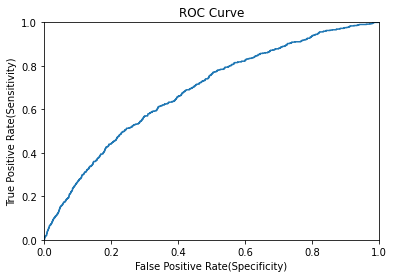

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(M1_FE_OUS_false_positive_rate, M1_FE_OUS_true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

##### **AUC**

In [ ]:
M1_FE_OUS_roc_auc = auc(M1_FE_OUS_false_positive_rate, M1_FE_OUS_true_positive_rate)
M1_FE_OUS_roc_auc

0.6835323499496515

#### **2.SMOTE:Sinthetic Minority Oversampling Technique**

In [ ]:
feature_engineer_data.columns

Index(['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')

In [ ]:
print("Actual Data :", feature_engineer_data.shape)

#Frequency count on target column
M1_FE_SMOT_freq=feature_engineer_data['Target'].value_counts()
print(M1_FE_SMOT_freq)
print((M1_FE_SMOT_freq/M1_FE_SMOT_freq.sum())*100)

#Classwise data
M1_FE_SMOT_credit_risk_class0 = feature_engineer_data[feature_engineer_data['Target'] == 0]
M1_FE_SMOT_credit_risk_class1 = feature_engineer_data[feature_engineer_data['Target'] == 1]

print("Class0 Actual :", M1_FE_SMOT_credit_risk_class0.shape)
print("Class1 Actual  :", M1_FE_SMOT_credit_risk_class1.shape)

Actual Data : (36457, 54)
0    35841
1      616
Name: Target, dtype: int64
0    98.310338
1     1.689662
Name: Target, dtype: float64
Class0 Actual : (35841, 54)
Class1 Actual  : (616, 54)


##### SMOTE Function

In [ ]:
print(feature_engineer_data.columns)
M1_FE_SMOT_X=feature_engineer_data.iloc[:,1:]
M1_FE_SMOT_y=feature_engineer_data["Target"]
print(M1_FE_SMOT_X.shape)
print(M1_FE_SMOT_y.shape)

Index(['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')
(36457, 53)
(36457,

In [ ]:
M1_FE_SMOT_X

,Gender,Car,House,NoOfChild,IncomeTotal,Education,WkPhone,Phone,email,FamSize,...,Managers,Medicine_staff,Private_service_staff,Realty_agents,Sales_staff,Secretaries,Security_staff,Waiters_or_barmen_staff,Children_Segmentation,FamSize_Segmentation
0,1,1,1,0,427500.0,3,1,0,0,2,...,0,0,0,0,0,0,0,1,2,1
1,1,1,1,0,427500.0,3,1,0,0,2,...,0,0,0,0,0,0,0,1,2,1
2,1,1,1,0,112500.0,1,0,0,0,2,...,0,0,0,0,0,0,1,0,2,1
3,0,0,1,0,270000.0,1,0,1,1,1,...,0,0,0,0,1,0,0,0,2,1
4,0,0,1,0,270000.0,1,0,1,1,1,...,0,0,0,0,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,0,315000.0,1,0,0,0,2,...,1,0,0,0,0,0,0,0,2,1
36453,0,0,1,0,157500.0,3,0,1,1,2,...,0,1,0,0,0,0,0,0,2,1
36454,0,0,1,0,157500.0,3,0,1,1,2,...,0,1,0,0,0,0,0,0,2,1
36455,0,0,1,0,283500.0,1,0,0,0,2,...,0,0,0,0,1,0,0,0,2,1


In [ ]:
M1_FE_SMOT_y

0        0
1        0
2        0
3        0
4        0
        ..
36452    1
36453    1
36454    1
36455    1
36456    1
Name: Target, Length: 36457, dtype: int64

##### Mention the sample size

In [ ]:
from imblearn.over_sampling import SMOTE 
M1_FE_SMOT_smote = SMOTE(sampling_strategy=0.6, random_state = 2)
M1_FE_SMOT_X_smote, M1_FE_SMOT_y_smote = M1_FE_SMOT_smote.fit_resample(M1_FE_SMOT_X, M1_FE_SMOT_y)

import collections
print("Before SMOTE", collections.Counter(M1_FE_SMOT_y))
print("After SMOTE", collections.Counter(M1_FE_SMOT_y_smote))

Before SMOTE Counter({0: 35841, 1: 616})
After SMOTE Counter({0: 35841, 1: 21504})


In [ ]:
M1_FE_SMOT_credit_Balanced=M1_FE_SMOT_X_smote
M1_FE_SMOT_credit_Balanced["Target"]=M1_FE_SMOT_y_smote

In [ ]:
M1_FE_SMOT_credit_Balanced

,Gender,Car,House,NoOfChild,IncomeTotal,Education,WkPhone,Phone,email,FamSize,...,Medicine_staff,Private_service_staff,Realty_agents,Sales_staff,Secretaries,Security_staff,Waiters_or_barmen_staff,Children_Segmentation,FamSize_Segmentation,Target
0,1,1,1,0,427500.0,3,1,0,0,2,...,0,0,0,0,0,0,1,2,1,0
1,1,1,1,0,427500.0,3,1,0,0,2,...,0,0,0,0,0,0,1,2,1,0
2,1,1,1,0,112500.0,1,0,0,0,2,...,0,0,0,0,0,1,0,2,1,0
3,0,0,1,0,270000.0,1,0,1,1,1,...,0,0,0,1,0,0,0,2,1,0
4,0,0,1,0,270000.0,1,0,1,1,1,...,0,0,0,1,0,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57340,0,0,1,0,99000.0,1,0,0,0,1,...,0,0,0,0,0,0,0,2,1,1
57341,0,0,0,0,157500.0,1,0,0,0,1,...,0,0,0,0,0,0,1,2,1,1
57342,0,1,1,0,180000.0,1,0,0,0,2,...,0,0,0,0,0,0,0,1,1,1
57343,0,0,1,0,225000.0,1,0,0,0,1,...,0,0,0,0,0,0,1,2,1,1


##### Model with balanced data - SMOTE

In [ ]:
M1_FE_SMOT_X=M1_FE_SMOT_credit_Balanced[['Gender']+['Car']+['House']+['NoOfChild']+['IncomeTotal']+['Education']+['WkPhone']+['Phone']+['email']+['FamSize']+['Account_Length']+['Marriage_Status']+['Age']+['Age_Bucket']+['EmpExperience']+['EmpExp_Category']+['Employement_Status']+['Commercial_associate']+['Pensioner']+['State_servant']+['Student']+['Working']+['Civil_marriage']+['Married']+['Separated']+['Single_or_not_married']+['Widow']+['Co_Op_Appartment']+['House_Or_apartment']+['Municipal_apartment']+['Office_apartment']+['Rented_apartment']+['With_parents']+['Accountants']+['Cleaning_staff']+['Cooking_staff']+['Core_staff']+['Drivers']+['HR_staff']+['High_skill_tech_staff']+['IT_staff']+['Laborers']+['Low_skill_Laborers']+['Managers']+['Medicine_staff']+['Private_service_staff']+['Realty_agents']+['Sales_staff']+['Secretaries']+['Security_staff']+['Waiters_or_barmen_staff']+['Children_Segmentation']+['FamSize_Segmentation']]

In [ ]:
M1_FE_SMOT_y=M1_FE_SMOT_credit_Balanced['Target']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
M1_FE_SMOT_logistic=LogisticRegression(solver='newton-cg',max_iter=200)

In [ ]:
# from pandas.core.common import random_state
M1_FE_SMOT_logistic.fit(M1_FE_SMOT_X,M1_FE_SMOT_y)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

LogisticRegression(max_iter=200, solver='newton-cg')

In [ ]:
M1_FE_SMOT_predict=M1_FE_SMOT_logistic.predict(M1_FE_SMOT_X)
M1_FE_SMOT_predict

array([0, 0, 0, ..., 1, 1, 1])

##### **Sensitivity and Specificity**

In [ ]:
#####Create the confusion matrix
###predict the variable active customer from logistic fit####

M1_FE_SMOT_threshold=0.5
M1_FE_SMOT_predicted_class1=[ 0 if x < M1_FE_SMOT_threshold else 1 for x in M1_FE_SMOT_predict]

M1_FE_SMOT_cm1 = confusion_matrix(M1_FE_SMOT_credit_Balanced["Target"],M1_FE_SMOT_predict)
print('Confusion Matrix : \n', M1_FE_SMOT_cm1)

M1_FE_SMOT_total1=sum(sum(M1_FE_SMOT_cm1))
#####from confusion matrix calculate accuracy
M1_FE_SMOT_accuracy1=(M1_FE_SMOT_cm1[0,0]+M1_FE_SMOT_cm1[1,1])/M1_FE_SMOT_total1
print ('Accuracy : ', M1_FE_SMOT_accuracy1)

M1_FE_SMOT_sensitivity1 = M1_FE_SMOT_cm1[0,0]/(M1_FE_SMOT_cm1[0,0]+M1_FE_SMOT_cm1[0,1])
print('Sensitivity : ', M1_FE_SMOT_sensitivity1 )

M1_FE_SMOT_specificity1 = M1_FE_SMOT_cm1[1,1]/(M1_FE_SMOT_cm1[1,0]+M1_FE_SMOT_cm1[1,1])
print('Specificity : ', M1_FE_SMOT_specificity1)

Confusion Matrix : 
 [[35731   110]
 [ 3782 17722]]
Accuracy :  0.9321300898073066
Sensitivity :  0.9969308892051003
Specificity :  0.8241257440476191


##### Multicollinearity

In [ ]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
print(M1_FE_SMOT_credit_Balanced.columns)
print(M1_FE_SMOT_credit_Balanced.shape)

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation', 'Target'],
      dtype='object')
(57345, 54)


In [ ]:
list2=['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation','Target']

In [ ]:
vif_cal(input_data=M1_FE_SMOT_credit_Balanced[list2], dependent_col="Target")

Gender  VIF =  1.52
Car  VIF =  1.27
House  VIF =  1.21
NoOfChild  VIF =  11.81
IncomeTotal  VIF =  1.27
Education  VIF =  1.25
WkPhone  VIF =  1.29
Phone  VIF =  1.18
email  VIF =  1.07
FamSize  VIF =  16.78
Account_Length  VIF =  1.05
Marriage_Status  VIF =  10.92
Age  VIF =  15.11
Age_Bucket  VIF =  14.1
EmpExperience  VIF =  6.28
EmpExp_Category  VIF =  11.15
Employement_Status  VIF =  4.52
Commercial_associate  VIF =  2.62
Pensioner  VIF =  4.05
State_servant  VIF =  1.73
Student  VIF =  1.01
Working  VIF =  3.25
Civil_marriage  VIF =  3.16
Married  VIF =  10.0
Separated  VIF =  1.56
Single_or_not_married  VIF =  2.23
Widow  VIF =  1.51
Co_Op_Appartment  VIF =  1.06
House_Or_apartment  VIF =  2.31
Municipal_apartment  VIF =  1.38
Office_apartment  VIF =  1.1
Rented_apartment  VIF =  1.2
With_parents  VIF =  1.62
Accountants  VIF =  1.3
Cleaning_staff  VIF =  1.13
Cooking_staff  VIF =  1.14
Core_staff  VIF =  1.77
Drivers  VIF =  1.63
HR_staff  VIF =  1.02
High_skill_tech_staff  VI

FamSize  VIF =  16.78 highest & more than 5 so droping it

In [ ]:
list2=['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation','Target']

In [ ]:
vif_cal(input_data=M1_FE_SMOT_credit_Balanced[list2], dependent_col="Target")

Gender  VIF =  1.52
Car  VIF =  1.26
House  VIF =  1.2
NoOfChild  VIF =  3.0
IncomeTotal  VIF =  1.27
Education  VIF =  1.25
WkPhone  VIF =  1.29
Phone  VIF =  1.18
email  VIF =  1.07
Account_Length  VIF =  1.05
Marriage_Status  VIF =  9.23
Age  VIF =  15.11
Age_Bucket  VIF =  14.09
EmpExperience  VIF =  6.26
EmpExp_Category  VIF =  11.12
Employement_Status  VIF =  4.52
Commercial_associate  VIF =  2.62
Pensioner  VIF =  4.04
State_servant  VIF =  1.73
Student  VIF =  1.01
Working  VIF =  3.24
Civil_marriage  VIF =  3.16
Married  VIF =  9.99
Separated  VIF =  1.45
Single_or_not_married  VIF =  1.99
Widow  VIF =  1.42
Co_Op_Appartment  VIF =  1.06
House_Or_apartment  VIF =  2.31
Municipal_apartment  VIF =  1.38
Office_apartment  VIF =  1.1
Rented_apartment  VIF =  1.2
With_parents  VIF =  1.62
Accountants  VIF =  1.29
Cleaning_staff  VIF =  1.13
Cooking_staff  VIF =  1.14
Core_staff  VIF =  1.77
Drivers  VIF =  1.63
HR_staff  VIF =  1.02
High_skill_tech_staff  VIF =  1.33
IT_staff  VIF 

Age  VIF =  15.11  highest & more than 5 so droping it

In [ ]:
list2=['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'Account_Length',
       'Marriage_Status','Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation','Target']

In [ ]:
vif_cal(input_data=M1_FE_SMOT_credit_Balanced[list2], dependent_col="Target")

Gender  VIF =  1.51
Car  VIF =  1.26
House  VIF =  1.2
NoOfChild  VIF =  3.0
IncomeTotal  VIF =  1.27
Education  VIF =  1.25
WkPhone  VIF =  1.29
Phone  VIF =  1.18
email  VIF =  1.07
Account_Length  VIF =  1.05
Marriage_Status  VIF =  9.22
Age_Bucket  VIF =  2.05
EmpExperience  VIF =  6.25
EmpExp_Category  VIF =  11.12
Employement_Status  VIF =  4.5
Commercial_associate  VIF =  2.61
Pensioner  VIF =  4.03
State_servant  VIF =  1.72
Student  VIF =  1.01
Working  VIF =  3.22
Civil_marriage  VIF =  3.16
Married  VIF =  9.99
Separated  VIF =  1.45
Single_or_not_married  VIF =  1.98
Widow  VIF =  1.42
Co_Op_Appartment  VIF =  1.06
House_Or_apartment  VIF =  2.31
Municipal_apartment  VIF =  1.38
Office_apartment  VIF =  1.1
Rented_apartment  VIF =  1.2
With_parents  VIF =  1.61
Accountants  VIF =  1.29
Cleaning_staff  VIF =  1.13
Cooking_staff  VIF =  1.13
Core_staff  VIF =  1.76
Drivers  VIF =  1.63
HR_staff  VIF =  1.02
High_skill_tech_staff  VIF =  1.32
IT_staff  VIF =  1.03
Laborers  VI

EmpExp_Category  VIF =  11.12 highest & more than 5 so droping it

In [ ]:
list2=['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'Account_Length',
       'Marriage_Status','Age_Bucket', 'EmpExperience',
       'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation','Target']

In [ ]:
vif_cal(input_data=M1_FE_SMOT_credit_Balanced[list2], dependent_col="Target")

Gender  VIF =  1.51
Car  VIF =  1.26
House  VIF =  1.2
NoOfChild  VIF =  3.0
IncomeTotal  VIF =  1.27
Education  VIF =  1.25
WkPhone  VIF =  1.29
Phone  VIF =  1.18
email  VIF =  1.07
Account_Length  VIF =  1.05
Marriage_Status  VIF =  9.21
Age_Bucket  VIF =  2.05
EmpExperience  VIF =  1.55
Employement_Status  VIF =  2.36
Commercial_associate  VIF =  2.61
Pensioner  VIF =  4.03
State_servant  VIF =  1.72
Student  VIF =  1.01
Working  VIF =  3.22
Civil_marriage  VIF =  3.16
Married  VIF =  9.98
Separated  VIF =  1.45
Single_or_not_married  VIF =  1.98
Widow  VIF =  1.42
Co_Op_Appartment  VIF =  1.06
House_Or_apartment  VIF =  2.31
Municipal_apartment  VIF =  1.38
Office_apartment  VIF =  1.1
Rented_apartment  VIF =  1.2
With_parents  VIF =  1.61
Accountants  VIF =  1.29
Cleaning_staff  VIF =  1.13
Cooking_staff  VIF =  1.13
Core_staff  VIF =  1.76
Drivers  VIF =  1.63
HR_staff  VIF =  1.02
High_skill_tech_staff  VIF =  1.32
IT_staff  VIF =  1.03
Laborers  VIF =  2.11
Low_skill_Laborers 

Married  VIF =  9.98 highest & more than 5 so droping it

In [ ]:
list2=['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'Account_Length',
       'Marriage_Status','Age_Bucket', 'EmpExperience',
       'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation','Target']

In [ ]:
vif_cal(input_data=M1_FE_SMOT_credit_Balanced[list2], dependent_col="Target")

Gender  VIF =  1.51
Car  VIF =  1.26
House  VIF =  1.2
NoOfChild  VIF =  2.98
IncomeTotal  VIF =  1.27
Education  VIF =  1.25
WkPhone  VIF =  1.29
Phone  VIF =  1.18
email  VIF =  1.07
Account_Length  VIF =  1.05
Marriage_Status  VIF =  2.51
Age_Bucket  VIF =  2.05
EmpExperience  VIF =  1.55
Employement_Status  VIF =  2.35
Commercial_associate  VIF =  2.6
Pensioner  VIF =  4.02
State_servant  VIF =  1.71
Student  VIF =  1.01
Working  VIF =  3.21
Civil_marriage  VIF =  1.07
Separated  VIF =  1.43
Single_or_not_married  VIF =  1.94
Widow  VIF =  1.4
Co_Op_Appartment  VIF =  1.06
House_Or_apartment  VIF =  2.3
Municipal_apartment  VIF =  1.38
Office_apartment  VIF =  1.1
Rented_apartment  VIF =  1.2
With_parents  VIF =  1.61
Accountants  VIF =  1.28
Cleaning_staff  VIF =  1.12
Cooking_staff  VIF =  1.12
Core_staff  VIF =  1.73
Drivers  VIF =  1.61
HR_staff  VIF =  1.02
High_skill_tech_staff  VIF =  1.31
IT_staff  VIF =  1.03
Laborers  VIF =  2.08
Low_skill_Laborers  VIF =  1.05
Managers  

All FEATURES ARE BELOW 5

##### Individual Impact of Variables

In [ ]:
M1_FE_SMOT_credit_Balanced.columns

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'Account_Length', 'Marriage_Status',
       'Age_Bucket', 'EmpExperience', 'Employement_Status',
       'Commercial_associate', 'Pensioner', 'State_servant', 'Student',
       'Working', 'Civil_marriage', 'Separated', 'Single_or_not_married',
       'Widow', 'Co_Op_Appartment', 'House_Or_apartment',
       'Municipal_apartment', 'Office_apartment', 'Rented_apartment',
       'With_parents', 'Accountants', 'Cleaning_staff', 'Cooking_staff',
       'Core_staff', 'Drivers', 'HR_staff', 'High_skill_tech_staff',
       'IT_staff', 'Laborers', 'Low_skill_Laborers', 'Managers',
       'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation', 'Target'],
      dtype='object')

In [ ]:
M1_FE_SMOT_X=M1_FE_SMOT_credit_Balanced[list2]

In [ ]:
print(M1_FE_SMOT_X.columns)
print(M1_FE_SMOT_X.shape)

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'Account_Length', 'Marriage_Status',
       'Age_Bucket', 'EmpExperience', 'Employement_Status',
       'Commercial_associate', 'Pensioner', 'State_servant', 'Student',
       'Working', 'Civil_marriage', 'Separated', 'Single_or_not_married',
       'Widow', 'Co_Op_Appartment', 'House_Or_apartment',
       'Municipal_apartment', 'Office_apartment', 'Rented_apartment',
       'With_parents', 'Accountants', 'Cleaning_staff', 'Cooking_staff',
       'Core_staff', 'Drivers', 'HR_staff', 'High_skill_tech_staff',
       'IT_staff', 'Laborers', 'Low_skill_Laborers', 'Managers',
       'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation', 'Target'],
      dtype='object')
(57345, 50)


In [ ]:
M1_FE_SMOT_X=M1_FE_SMOT_X.drop('Target',axis=1)

In [ ]:
M1_FE_SMOT_y=M1_FE_SMOT_credit_Balanced['Target']

In [ ]:
M1_FE_SMOT_y

0        0
1        0
2        0
3        0
4        0
        ..
57340    1
57341    1
57342    1
57343    1
57344    1
Name: Target, Length: 57345, dtype: int64

In [ ]:
import statsmodels.api as sm
M1_FE_SMOT_logistic=sm.Logit(M1_FE_SMOT_y,M1_FE_SMOT_X)
M1_FE_SMOT_logistic.fit()
print(M1_FE_SMOT_logistic.fit().summary())

         Current function value: 0.258366
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.258366
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                57345
Model:                          Logit   Df Residuals:                    57296
Method:                           MLE   Df Model:                           48
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                  0.6095
Time:                        19:20:04   Log-Likelihood:                -14816.
converged:                      False   LL-Null:                       -37937.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Gender                     -0.2852      0.043     -6.689      0.000      -0.369      -0.202
Car                        -0.6875      0.037    -18.449      0.000      -0.761      -0.614


Removed Student,WkPhone,Age_Bucket,Realty_agents, 
which Has P Value exceeding Limit

In [ ]:
list2=['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'Phone', 'email', 'Account_Length',
       'Marriage_Status','EmpExperience',
       'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant','Working', 'Civil_marriage',
       'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation']

In [ ]:
M1_FE_SMOT_X=M1_FE_SMOT_credit_Balanced[list2]

In [ ]:
import statsmodels.api as sm
M1_FE_SMOT_logistic=sm.Logit(M1_FE_SMOT_y,M1_FE_SMOT_X)
M1_FE_SMOT_logistic.fit()
print(M1_FE_SMOT_logistic.fit().summary())

Optimization terminated successfully.
         Current function value: 0.262761
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.262761
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                57345
Model:                          Logit   Df Residuals:                    57300
Method:                           MLE   Df Model:                           44
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                  0.6028
Time:                        19:30:42   Log-Likelihood:                -15068.
converged:                       True   LL-Null:                       -37937.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

##### **TRAIN & TEST DATA**

In [ ]:
print(M1_FE_SMOT_credit_Balanced.columns)
print(M1_FE_SMOT_credit_Balanced.shape)

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation', 'Target'],
      dtype='object')
(57345, 54)


In [ ]:
print(M1_FE_SMOT_X.columns)
print(M1_FE_SMOT_X.shape)

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'Phone', 'email', 'Account_Length', 'Marriage_Status', 'EmpExperience',
       'Employement_Status', 'Commercial_associate', 'Pensioner',
       'State_servant', 'Working', 'Civil_marriage', 'Separated',
       'Single_or_not_married', 'Widow', 'Co_Op_Appartment',
       'House_Or_apartment', 'Municipal_apartment', 'Office_apartment',
       'Rented_apartment', 'With_parents', 'Accountants', 'Cleaning_staff',
       'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Sales_staff',
       'Secretaries', 'Security_staff', 'Waiters_or_barmen_staff',
       'Children_Segmentation', 'FamSize_Segmentation'],
      dtype='object')
(57345, 45)


In [ ]:
M1_FE_SMOT_y

0        0
1        0
2        0
3        0
4        0
        ..
57340    1
57341    1
57342    1
57343    1
57344    1
Name: Target, Length: 57345, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
M1_FE_SMOT_X_train, M1_FE_SMOT_X_test, M1_FE_SMOT_y_train, M1_FE_SMOT_y_test = train_test_split(M1_FE_SMOT_X, M1_FE_SMOT_y, test_size=0.2,random_state=22)

In [ ]:
import statsmodels.api as sm
M1_FE_SMOT_logistic=sm.Logit(M1_FE_SMOT_y_train,M1_FE_SMOT_X_train)
M1_FE_SMOT_SUMMARY=M1_FE_SMOT_logistic.fit()
print(M1_FE_SMOT_SUMMARY.summary())

Optimization terminated successfully.
         Current function value: 0.262076
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                45876
Model:                          Logit   Df Residuals:                    45831
Method:                           MLE   Df Model:                           44
Date:                Fri, 14 Oct 2022   Pseudo R-squ.:                  0.6035
Time:                        19:33:41   Log-Likelihood:                -12023.
converged:                       True   LL-Null:                       -30320.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Gender                     -0.2751      0.047     -5.816      0.000      -0.368  

In [ ]:
#training Tree Model

M1_FE_SMOT_predict1 = M1_FE_SMOT_SUMMARY.predict(M1_FE_SMOT_X_train)
M1_FE_SMOT_predict2 = M1_FE_SMOT_SUMMARY.predict(M1_FE_SMOT_X_test)

M1_FE_SMOT_threshold1=0.5
M1_FE_SMOT_predicted1_class1=[ 0 if x < M1_FE_SMOT_threshold1 else 1 for x in M1_FE_SMOT_predict1]

M1_FE_SMOT_threshold2=0.5
M1_FE_SMOT_predicted2_class1=[ 0 if x < M1_FE_SMOT_threshold2 else 1 for x in M1_FE_SMOT_predict2]


#On Train Data
print("=====================\n On Train Data : \n=====================")
M1_FE_SMOT_cm1 = confusion_matrix(M1_FE_SMOT_y_train,M1_FE_SMOT_predicted1_class1)
print("Confusion Matrix : \n", M1_FE_SMOT_cm1)
M1_FE_SMOT_total1 = sum(sum(M1_FE_SMOT_cm1))
M1_FE_SMOT_accuracy1 = (M1_FE_SMOT_cm1[0,0]+M1_FE_SMOT_cm1[1,1])/M1_FE_SMOT_total1
print("Train Accuracy", M1_FE_SMOT_accuracy1)
M1_FE_SMOT_sensitivity1 = M1_FE_SMOT_cm1[0,0]/(M1_FE_SMOT_cm1[0,0]+M1_FE_SMOT_cm1[0,1])
print('Sensitivity : ', M1_FE_SMOT_sensitivity1 )
M1_FE_SMOT_specificity1 = M1_FE_SMOT_cm1[1,1]/(M1_FE_SMOT_cm1[1,0]+M1_FE_SMOT_cm1[1,1])
print('Specificity : ', M1_FE_SMOT_specificity1)

#On Test Data
print("\n=====================\n On Test Data : \n=====================")
M1_FE_SMOT_cm2 = confusion_matrix(M1_FE_SMOT_y_test,M1_FE_SMOT_predicted2_class1)
print("Confusion Matrix : \n", M1_FE_SMOT_cm2)
M1_FE_SMOT_total2 = sum(sum(M1_FE_SMOT_cm2))
M1_FE_SMOT_accuracy2 = (M1_FE_SMOT_cm2[0,0]+M1_FE_SMOT_cm2[1,1])/M1_FE_SMOT_total2
print("Test Accuracy", M1_FE_SMOT_accuracy2)
M1_FE_SMOT_sensitivity2 = M1_FE_SMOT_cm2[0,0]/(M1_FE_SMOT_cm2[0,0]+M1_FE_SMOT_cm2[0,1])
print('Sensitivity : ', M1_FE_SMOT_sensitivity2 )
M1_FE_SMOT_specificity2 = M1_FE_SMOT_cm2[1,1]/(M1_FE_SMOT_cm2[1,0]+M1_FE_SMOT_cm2[1,1])
print('Specificity : ', M1_FE_SMOT_specificity2)

#Difference
print("\n=====================\n Difference Data : \n=====================")
print('Accuracy',(M1_FE_SMOT_accuracy1-M1_FE_SMOT_accuracy2)*100)
print('Sensitivity',(M1_FE_SMOT_sensitivity1-M1_FE_SMOT_sensitivity2)*100)
print('Specificity',(M1_FE_SMOT_specificity1-M1_FE_SMOT_specificity2)*100)


 On Train Data : 
Confusion Matrix : 
 [[28198   532]
 [ 3859 13287]]
Train Accuracy 0.9042854651669718
Sensitivity :  0.9814827706230421
Specificity :  0.7749329289630235

 On Test Data : 
Confusion Matrix : 
 [[6957  154]
 [ 975 3383]]
Test Accuracy 0.9015607289214405
Sensitivity :  0.9783434116158065
Specificity :  0.7762735199632859

 Difference Data : 
Accuracy 0.27247362455313784
Sensitivity 0.3139359007235609
Specificity -0.13405910002624033


#### **Applying Original Data to MODEL**

In [ ]:
M1_Fe_X.columns

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')

In [ ]:
M1_Fe_X=feature_engineer_data[list2]

In [ ]:
#####Create the confusion matrix
###predict the variable active customer from logistic fit####
M1_FE_SMOT_predict=M1_FE_SMOT_SUMMARY.predict(M1_Fe_X)

M1_FE_SMOT_threshold=0.5
M1_FE_SMOT_predicted_class1=[ 0 if x < M1_FE_SMOT_threshold else 1 for x in M1_FE_SMOT_predict]

M1_FE_SMOT_cm = confusion_matrix(M1_Fe_y,M1_FE_SMOT_predicted_class1)
print('Confusion Matrix : \n', M1_FE_SMOT_cm)

M1_FE_SMOT_total=sum(sum(M1_FE_SMOT_cm))
#####from confusion matrix calculate accuracy
M1_FE_SMOT_accuracy=(M1_FE_SMOT_cm[0,0]+M1_FE_SMOT_cm[1,1])/M1_FE_SMOT_total
print ('Accuracy : ', M1_FE_SMOT_accuracy)

M1_FE_SMOT_sensitivity = M1_FE_SMOT_cm[0,0]/(M1_FE_SMOT_cm[0,0]+M1_FE_SMOT_cm[0,1])
print('Sensitivity : ', M1_FE_SMOT_sensitivity )

M1_FE_SMOT_specificity = M1_FE_SMOT_cm[1,1]/(M1_FE_SMOT_cm[1,0]+M1_FE_SMOT_cm[1,1])
print('Specificity : ', M1_FE_SMOT_specificity)

Confusion Matrix : 
 [[35155   686]
 [  592    24]]
Accuracy :  0.9649450037029925
Sensitivity :  0.9808599090427165
Specificity :  0.03896103896103896


##### **Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
M1_FE_SMOT_accuracy1=(M1_FE_SMOT_cm[0,0]+M1_FE_SMOT_cm[1,1])/M1_FE_SMOT_total
print ('Accuracy : ', M1_FE_SMOT_accuracy)

M1_FE_SMOT_Precision_Class0 = M1_FE_SMOT_cm[0,0]/(M1_FE_SMOT_cm[0,0]+M1_FE_SMOT_cm[1,0])
print('Precision_Class0 : ', M1_FE_SMOT_Precision_Class0 )

M1_FE_SMOT_Recall_Class0 = M1_FE_SMOT_cm[0,0]/(M1_FE_SMOT_cm[0,0]+M1_FE_SMOT_cm[0,1])
print('Recall_Class0 : ', M1_FE_SMOT_Recall_Class0 )

M1_FE_SMOT_F1_Class0 = 2/((1/M1_FE_SMOT_Precision_Class0)+(1/M1_FE_SMOT_Recall_Class0))
print('F1_Class0 : ', M1_FE_SMOT_F1_Class0 )


M1_FE_SMOT_Precision_Class1 = M1_FE_SMOT_cm[1,1]/(M1_FE_SMOT_cm[0,1]+M1_FE_SMOT_cm[1,1])
print('Precision_Class1 : ', M1_FE_SMOT_Precision_Class1 )

M1_FE_SMOT_Recall_Class1 = M1_FE_SMOT_cm[1,1]/(M1_FE_SMOT_cm[1,0]+M1_FE_SMOT_cm[1,1])
print('Recall_Class1 : ', M1_FE_SMOT_Recall_Class1 )

M1_FE_SMOT_F1_Class1 = 2/((1/M1_FE_SMOT_Precision_Class1)+(1/M1_FE_SMOT_Recall_Class1))
print('F1_Class1 : ', M1_FE_SMOT_F1_Class1 )

Accuracy :  0.9649450037029925
Precision_Class0 :  0.983439169720536
Recall_Class0 :  0.9808599090427165
F1_Class0 :  0.9821478460077108
Precision_Class1 :  0.03380281690140845
Recall_Class1 :  0.03896103896103896
F1_Class1 :  0.03619909502262444


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(feature_engineer_data["Target"],M1_FE_SMOT_predicted_class1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     35841
           1       0.03      0.04      0.04       616

    accuracy                           0.96     36457
   macro avg       0.51      0.51      0.51     36457
weighted avg       0.97      0.96      0.97     36457



##### **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

M1_FE_SMOT_actual = feature_engineer_data["Target"]
M1_FE_SMOT_false_positive_rate, M1_FE_SMOT_true_positive_rate, M1_FE_SMOT_thresholds = roc_curve(M1_FE_SMOT_actual, M1_FE_SMOT_predicted_class1)
print("false_positive_rate", M1_FE_SMOT_false_positive_rate)
print("true_positive_rate", M1_FE_SMOT_true_positive_rate)
print("thresholds", M1_FE_SMOT_thresholds)

false_positive_rate [0.         0.01914009 1.        ]
true_positive_rate [0.         0.03896104 1.        ]
thresholds [2 1 0]


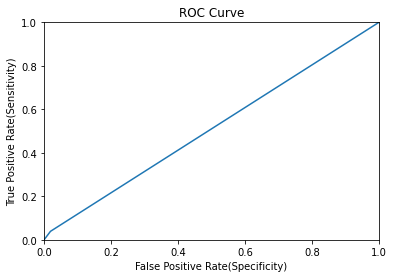

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(M1_FE_SMOT_false_positive_rate, M1_FE_SMOT_true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

##### **AUC**

In [ ]:
roc_auc = auc(M1_FE_SMOT_false_positive_rate, M1_FE_SMOT_true_positive_rate)
roc_auc

0.5099104740018776

## SUMMARY LOGISTIC MODELS

In [ ]:
best_log={'Balance_Method':['OSUS','OSUS','OSUS','OSUS','SMOTE','SMOTE','SMOTE','SMOTE'],'Parameter':['Accuracy:','Sensitivity:','Specificity:','AUC','Accuracy:','Sensitivity:','Specificity:','AUC'],'Normal_Data':[M1_OUS_accuracy,M1_OUS_sensitivity,M1_OUS_specificity,M1_OUS_roc_auc,M1_SMOT_accuracy,M1_SMOT_sensitivity,M1_SMOT_specificity,M1_SMOT_roc_auc],'Feature_Engineering_Data':[M1_FE_OUS_accuracy1,M1_FE_OUS_sensitivity1,M1_FE_OUS_specificity1,M1_FE_OUS_roc_auc,M1_FE_SMOT_accuracy1,M1_FE_SMOT_sensitivity1,M1_FE_SMOT_specificity1,roc_auc]}

In [ ]:
best_logistic=pd.DataFrame(best_log)
best_logistic

,Balance_Method,Parameter,Normal_Data,Feature_Engineering_Data
0,OSUS,Accuracy:,0.689991,0.701978
1,OSUS,Sensitivity:,0.692587,0.704500
2,OSUS,Specificity:,0.538961,0.555195
3,OSUS,AUC,0.657689,0.683532
4,SMOTE,Accuracy:,0.835669,0.964945
5,SMOTE,Sensitivity:,0.845959,0.980860
6,SMOTE,Specificity:,0.237013,0.038961
7,SMOTE,AUC,0.592458,0.509910


## **M2: DECISION TREE**

### **Model without Feature Engineering**

In [ ]:
NumericDf

,Target,IncomeTotal,Gender,Car,House,NoOfChild,Age,WkPhone,Phone,email,FamSize,Account_Length,EmpExperience,Employement_Status,Marriage_Status
0,0,427500.0,1,1,1,0,32,1,0,0,2,15,12,1,1
1,0,427500.0,1,1,1,0,32,1,0,0,2,14,12,1,1
2,0,112500.0,1,1,1,0,58,0,0,0,2,29,3,1,1
3,0,270000.0,0,0,1,0,52,0,1,1,1,4,8,1,0
4,0,270000.0,0,0,1,0,52,0,1,1,1,26,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,315000.0,1,1,1,0,47,0,0,0,2,11,6,1,1
36453,1,157500.0,0,0,1,0,33,0,1,1,2,23,3,1,1
36454,1,157500.0,0,0,1,0,33,0,1,1,2,32,3,1,1
36455,1,283500.0,0,0,1,0,49,0,0,0,2,9,1,1,1


In [ ]:
NumericDf.columns

Index(['Target', 'IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'EmpExperience', 'Employement_Status', 'Marriage_Status'],
      dtype='object')

In [ ]:
from sklearn import tree

M2_N_features= ['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone',
       'Phone', 'email', 'Account_Length', 'EmpExperience',
       'Employement_Status', 'Marriage_Status']
print("Features",M2_N_features)

M2_N_X = NumericDf[M2_N_features]
print("X shape", M2_N_X.shape)
M2_N_y = NumericDf['Target']
print("Y shape", M2_N_y.shape)

Features ['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone', 'Phone', 'email', 'Account_Length', 'EmpExperience', 'Employement_Status', 'Marriage_Status']
X shape (36457, 13)
Y shape (36457,)


In [ ]:
#Building Tree Model
M2_N_DTree = tree.DecisionTreeClassifier(max_leaf_nodes=30)
M2_N_DTree.fit(M2_N_X,M2_N_y)

# ##Plotting the trees 
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree, export_text
# plt.figure(figsize=(100,80))
# plot_tree(M2_N_DTree, filled=True, 
#                      rounded=True,
#                      impurity=False,
#                      feature_names = M2_N_features)
# print( export_text(M2_N_DTree, feature_names = M2_N_features))

DecisionTreeClassifier(max_leaf_nodes=30)

#### **Tree Validation**

##### **Confusion Matrix & Accuracy**

In [ ]:
##########Tree Validation
#Tree Validation
M2_N_predict = M2_N_DTree.predict(M2_N_X)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
M2_N_cm = confusion_matrix(M2_N_y, M2_N_predict)
print (M2_N_cm)

M2_N_total = sum(sum(M2_N_cm))
#####from confusion matrix calculate accuracy
M2_N_accuracy = (M2_N_cm[0,0]+M2_N_cm[1,1])/M2_N_total
print(M2_N_accuracy)

[[35839     2]
 [  593    23]]
0.9836794031324574


##### **Sensitivity and Specificity**

In [ ]:
M2_N_sensitivity = M2_N_cm[0,0]/(M2_N_cm[0,0]+M2_N_cm[0,1])
print('Sensitivity : ', M2_N_sensitivity )

M2_N_specificity= M2_N_cm[1,1]/(M2_N_cm[1,0]+M2_N_cm[1,1])
print('Specificity : ', M2_N_specificity)

Sensitivity :  0.9999441979855472
Specificity :  0.037337662337662336


##### **Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
print ('Accuracy : ', M2_N_accuracy)

M2_N_Precision_Class0 = M2_N_cm[0,0]/(M2_N_cm[0,0]+M2_N_cm[1,0])
print('Precision_Class0 : ', M2_N_Precision_Class0 )

M2_N_Recall_Class0 = M2_N_cm[0,0]/(M2_N_cm[0,0]+M2_N_cm[0,1])
print('Recall_Class0 : ', M2_N_Recall_Class0 )

M2_N_F1_Class0 = 2/((1/M2_N_Precision_Class0)+(1/M2_N_Recall_Class0))
print('F1_Class0 : ', M2_N_F1_Class0 )


M2_N_Precision_Class1 = M2_N_cm[1,1]/(M2_N_cm[0,1]+M2_N_cm[1,1])
print('Precision_Class1 : ', M2_N_Precision_Class1 )

M2_N_Recall_Class1 = M2_N_cm[1,1]/(M2_N_cm[1,0]+M2_N_cm[1,1])
print('Recall_Class1 : ', M2_N_Recall_Class1 )

M2_N_F1_Class1 = 2/((1/M2_N_Precision_Class1)+(1/M2_N_Recall_Class1))
print('F1_Class1 : ', M2_N_F1_Class1 )

Accuracy :  0.9836794031324574
Precision_Class0 :  0.9837231005709267
Recall_Class0 :  0.9999441979855472
F1_Class0 :  0.9917673266641762
Precision_Class1 :  0.92
Recall_Class1 :  0.037337662337662336
F1_Class1 :  0.0717628705148206


##### Finding max_leaf_nodes, Pruning: max_leaf_nodes - Finetuning

In [ ]:
from sklearn.model_selection import train_test_split
M2_N_X_train, M2_N_X_test, M2_N_y_train, M2_N_y_test = train_test_split(M2_N_X, M2_N_y, test_size=0.2,random_state=22)

In [ ]:
#training Tree Model
M2_N_clf = tree.DecisionTreeClassifier(max_leaf_nodes=60)
M2_N_clf.fit(M2_N_X_train,M2_N_y_train)

M2_N_predict1 = M2_N_clf.predict(M2_N_X_train)
M2_N_predict2 = M2_N_clf.predict(M2_N_X_test)

#On Train Data
M2_N_cm1 = confusion_matrix(M2_N_y_train,M2_N_predict1)
M2_N_total1 = sum(sum(M2_N_cm1))
M2_N_accuracy1 = (M2_N_cm1[0,0]+M2_N_cm1[1,1])/M2_N_total1
print("Train Accuracy", M2_N_accuracy1)

#On Test Data
M2_N_cm2 = confusion_matrix(M2_N_y_test,M2_N_predict2)
M2_N_total2 = sum(sum(M2_N_cm2))
M2_N_accuracy2 = (M2_N_cm2[0,0]+M2_N_cm2[1,1])/M2_N_total2
print("Test Accuracy", M2_N_accuracy2)

Train Accuracy 0.984707697582719
Test Accuracy 0.9808008776741635


max_leaf_nodes=60 , Train & test Accuracy same


In [ ]:
#Building Tree Model
M2_N_DTree = tree.DecisionTreeClassifier(max_leaf_nodes=60)
M2_N_DTree.fit(M2_N_X,M2_N_y)

# ##Plotting the trees 
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree, export_text
# plt.figure(figsize=(100,80))
# plot_tree(M2_N_DTree, filled=True, 
#                      rounded=True,
#                      impurity=False,
#                      feature_names = M2_N_features)
# print( export_text(M2_N_DTree, feature_names = M2_N_features))

DecisionTreeClassifier(max_leaf_nodes=60)

**find out model is IMBALANCE:**  our intrested class is class1

#### **Handling Class Imbalance**

In [ ]:
print("Actual Data :", NumericDf.shape)

#Frequency count on target column
M2_N_freq=NumericDf['Target'].value_counts()
print(M2_N_freq)
print((M2_N_freq/M2_N_freq.sum())*100)

#Classwise data
M2_OUS_credit_risk_class0 = NumericDf[NumericDf['Target'] == 0]
M2_OUS_credit_risk_class1 = NumericDf[NumericDf['Target'] == 1]

print("Class0 Actual :", M2_OUS_credit_risk_class0.shape)
print("Class1 Actual  :", M2_OUS_credit_risk_class1.shape)

Actual Data : (36457, 15)
0    35841
1      616
Name: Target, dtype: int64
0    98.310338
1     1.689662
Name: Target, dtype: float64
Class0 Actual : (35841, 15)
Class1 Actual  : (616, 15)


##### **1. OVERSAMPLING & UNDERSAMPLING**

In [ ]:
##Undersampling of class-0
## Consider half of class-0
M2_OUS_credit_risk_class0_under = M2_OUS_credit_risk_class0.sample(int(0.5*len(M2_OUS_credit_risk_class0)))
print("Class0 Undersample :", M2_OUS_credit_risk_class0_under.shape)

##Oversampling of Class-1 
# Lets increase the size by 26 times
M2_OUS_credit_risk_class1_over = M2_OUS_credit_risk_class1.sample(25*len(M2_OUS_credit_risk_class1),replace=True)
print("Class1 Oversample :", M2_OUS_credit_risk_class1_over.shape)

#Concatenate to create the final balanced data
M2_OUS_credit_risk_balanced=pd.concat([M2_OUS_credit_risk_class0_under,M2_OUS_credit_risk_class1_over])
print("Final Balannced Data :", M2_OUS_credit_risk_balanced.shape)

#Frequency count on target column in the balanced data
M2_OUS_freq=M2_OUS_credit_risk_balanced['Target'].value_counts()
print(M2_OUS_freq)
print((M2_OUS_freq/M2_OUS_freq.sum())*100)

Class0 Undersample : (17920, 15)
Class1 Oversample : (15400, 15)
Final Balannced Data : (33320, 15)
0    17920
1    15400
Name: Target, dtype: int64
0    53.781513
1    46.218487
Name: Target, dtype: float64


###### Model with balanced data

In [ ]:
from sklearn import tree

M2_OUS_features= ['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone',
       'Phone', 'email', 'Account_Length', 'EmpExperience',
       'Employement_Status', 'Marriage_Status']
print("Features",M2_OUS_features)

M2_OUS_X = M2_OUS_credit_risk_balanced[M2_OUS_features]
print("X shape", M2_OUS_X.shape)
M2_OUS_y = M2_OUS_credit_risk_balanced['Target']
print("Y shape", M2_OUS_y.shape)

Features ['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone', 'Phone', 'email', 'Account_Length', 'EmpExperience', 'Employement_Status', 'Marriage_Status']
X shape (33320, 13)
Y shape (33320,)


###### **Building DT using Balance Data**

In [ ]:
print(M2_OUS_X.columns)
print(M2_OUS_X.shape)

Index(['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone',
       'Phone', 'email', 'Account_Length', 'EmpExperience',
       'Employement_Status', 'Marriage_Status'],
      dtype='object')
(33320, 13)


###### Finding max_leaf_nodes, Pruning: max_leaf_nodes - Finetuning ,Bias

In [ ]:
from sklearn.model_selection import train_test_split
M2_OUS_X_train, M2_OUS_X_test, M2_OUS_y_train, M2_OUS_y_test = train_test_split(M2_OUS_X, M2_OUS_y, test_size=0.2,random_state=22)

In [ ]:
#training Tree Model
M2_OUS_clf = tree.DecisionTreeClassifier(max_leaf_nodes=1300)
M2_OUS_clf.fit(M2_OUS_X_train,M2_OUS_y_train)

M2_OUS_predict1 = M2_OUS_clf.predict(M2_OUS_X_train)
M2_OUS_predict2 = M2_OUS_clf.predict(M2_OUS_X_test)

#On Train Data
print("=====================\n On Train Data : \n=====================")
M2_OUS_cm1 = confusion_matrix(M2_OUS_y_train,M2_OUS_predict1)
print("Confusion Matrix : \n", M2_OUS_cm1)
M2_OUS_total1 = sum(sum(M2_OUS_cm1))
M2_OUS_accuracy1 = (M2_OUS_cm1[0,0]+M2_OUS_cm1[1,1])/M2_OUS_total1
print("Train Accuracy", M2_OUS_accuracy1)
M2_OUS_sensitivity1 = M2_OUS_cm1[0,0]/(M2_OUS_cm1[0,0]+M2_OUS_cm1[0,1])
print('Sensitivity : ', M2_OUS_sensitivity1 )
M2_OUS_specificity1 = M2_OUS_cm1[1,1]/(M2_OUS_cm1[1,0]+M2_OUS_cm1[1,1])
print('Specificity : ', M2_OUS_specificity1)

#On Test Data
print("\n=====================\n On Test Data : \n=====================")
M2_OUS_cm2 = confusion_matrix(M2_OUS_y_test,M2_OUS_predict2)
print("Confusion Matrix : \n", M2_OUS_cm2)
M2_OUS_total2 = sum(sum(M2_OUS_cm2))
M2_OUS_accuracy2 = (M2_OUS_cm2[0,0]+M2_OUS_cm2[1,1])/M2_OUS_total2
print("Test Accuracy", M2_OUS_accuracy2)
M2_OUS_sensitivity2 = M2_OUS_cm2[0,0]/(M2_OUS_cm2[0,0]+M2_OUS_cm2[0,1])
print('Sensitivity : ', M2_OUS_sensitivity2 )
M2_OUS_specificity2 = M2_OUS_cm2[1,1]/(M2_OUS_cm2[1,0]+M2_OUS_cm2[1,1])
print('Specificity : ', M2_OUS_specificity2)

#Difference
print("\n=====================\n Difference Data : \n=====================")
print('Accuracy',(M2_OUS_accuracy1-M2_OUS_accuracy2)*100)
print('Sensitivity',(M2_OUS_sensitivity1-M2_OUS_sensitivity2)*100)
print('Specificity',(M2_OUS_specificity1-M2_OUS_specificity2)*100)


 On Train Data : 
Confusion Matrix : 
 [[14316    27]
 [    0 12313]]
Train Accuracy 0.9989870948379351
Sensitivity :  0.9981175486299937
Specificity :  1.0

 On Test Data : 
Confusion Matrix : 
 [[3453  124]
 [   0 3087]]
Test Accuracy 0.9813925570228091
Sensitivity :  0.9653340788370143
Specificity :  1.0

 Difference Data : 
Accuracy 1.7594537815125988
Sensitivity 3.2783469792979414
Specificity 0.0


1300  leaf nodes is max train accuracy & match test accuracy

##### **Applying Original Data to MODEL**

In [ ]:
print(M2_N_X.columns)
print(M2_N_X.shape)

Index(['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone',
       'Phone', 'email', 'Account_Length', 'EmpExperience',
       'Employement_Status', 'Marriage_Status'],
      dtype='object')
(36457, 13)


In [ ]:
print(M2_N_y)
print(M2_N_y.shape)

0        0
1        0
2        0
3        0
4        0
        ..
36452    1
36453    1
36454    1
36455    1
36456    1
Name: Target, Length: 36457, dtype: int64
(36457,)


In [ ]:
#####Create the confusion matrix
##########Tree Validation
#Tree Validation
M2_OUS_predictions = M2_OUS_clf.predict(M2_N_X)

M2_OUS_threshold=0.5
M2_OUS_predicted_class1=[ 0 if x < M2_OUS_threshold else 1 for x in M2_OUS_predictions]

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
M2_OUS_cm1 = confusion_matrix(M2_N_y, M2_OUS_predicted_class1)
print('Confusion Matrix : \n', M2_OUS_cm1)

M2_OUS_total1=sum(sum(M2_OUS_cm1))
#####from confusion matrix calculate accuracy
M2_OUS_accuracy1=(M2_OUS_cm1[0,0]+M2_OUS_cm1[1,1])/M2_OUS_total1
print ('Accuracy : ', M2_OUS_accuracy1)

M2_OUS_sensitivity1 = M2_OUS_cm1[0,0]/(M2_OUS_cm1[0,0]+M2_OUS_cm1[0,1])
print('Sensitivity : ', M2_OUS_sensitivity1 )

M2_OUS_specificity1 = M2_OUS_cm1[1,1]/(M2_OUS_cm1[1,0]+M2_OUS_cm1[1,1])
print('Specificity : ', M2_OUS_specificity1)

Confusion Matrix : 
 [[35061   780]
 [    0   616]]
Accuracy :  0.9786049318375072
Sensitivity :  0.9782372143634385
Specificity :  1.0


###### **Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
M2_OUS_accuracy1=(M2_OUS_cm1[0,0]+M2_OUS_cm1[1,1])/M2_OUS_total1
print ('Accuracy\t: ', M2_OUS_accuracy1)

M2_OUS_Precision_Class0 = M2_OUS_cm1[0,0]/(M2_OUS_cm1[0,0]+M2_OUS_cm1[1,0])
print('Precision_Class0: ', M2_OUS_Precision_Class0 )

M2_OUS_Recall_Class0 = M2_OUS_cm1[0,0]/(M2_OUS_cm1[0,0]+M2_OUS_cm1[0,1])
print('Recall_Class0\t: ', M2_OUS_Recall_Class0 )

M2_OUS_F1_Class0 = 2/((1/M2_OUS_Precision_Class0)+(1/M2_OUS_Recall_Class0))
print('F1_Class0\t: ', M2_OUS_F1_Class0 )


M2_OUS_Precision_Class1 = M2_OUS_cm1[1,1]/(M2_OUS_cm1[0,1]+M2_OUS_cm1[1,1])
print('Precision_Class1: ', M2_OUS_Precision_Class1 )

M2_OUS_Recall_Class1 = M2_OUS_cm1[1,1]/(M2_OUS_cm1[1,0]+M2_OUS_cm1[1,1])
print('Recall_Class1\t: ', M2_OUS_Recall_Class1 )

M2_OUS_F1_Class1 = 2/((1/M2_OUS_Precision_Class1)+(1/M2_OUS_Recall_Class1))
print('F1_Class1\t: ', M2_OUS_F1_Class1 )

Accuracy	:  0.9786049318375072
Precision_Class0:  1.0
Recall_Class0	:  0.9782372143634385
F1_Class0	:  0.9889988998899889
Precision_Class1:  0.44126074498567336
Recall_Class1	:  1.0
F1_Class1	:  0.6123260437375745


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(M2_N_y,M2_OUS_predicted_class1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     35841
           1       0.44      1.00      0.61       616

    accuracy                           0.98     36457
   macro avg       0.72      0.99      0.80     36457
weighted avg       0.99      0.98      0.98     36457



###### **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

M2_OUS_actual = NumericDf["Target"]
M2_OUS_false_positive_rate, M2_OUS_true_positive_rate, M2_OUS_thresholds = roc_curve(M2_OUS_actual, M2_OUS_predictions)
print("false_positive_rate", M2_OUS_false_positive_rate)
print("true_positive_rate", M2_OUS_true_positive_rate)
print("thresholds", M2_OUS_thresholds)

false_positive_rate [0.         0.02176279 1.        ]
true_positive_rate [0. 1. 1.]
thresholds [2 1 0]


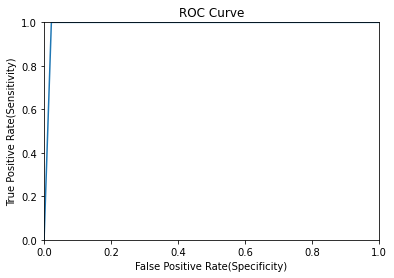

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(M2_OUS_false_positive_rate, M2_OUS_true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###### **AUC**

In [ ]:
M2_OUS_roc_auc = auc(M2_OUS_false_positive_rate, M2_OUS_true_positive_rate)
M2_OUS_roc_auc

0.9891186071817192

###### K- Fold cross validation

In [ ]:
M2_OUS_KF_X = np.array(NumericDf[M2_OUS_features])
M2_OUS_KF_y = np.array(NumericDf['Target'])

M2_OUS_KF_tree_KF = tree.DecisionTreeClassifier()

#Simple K-Fold cross validation. 10 folds.
from sklearn.model_selection import KFold
M2_OUS_KF_kfold_models = KFold(n_splits=10)

from sklearn import model_selection
M2_OUS_KF_scores = model_selection.cross_val_score(M2_OUS_KF_tree_KF,M2_OUS_KF_X, M2_OUS_KF_y,cv=M2_OUS_KF_kfold_models)
M2_OUS_KF_Accuracy=M2_OUS_KF_scores.mean()*100
print(M2_OUS_KF_scores)
print("Avg K-Fold Accuracy", M2_OUS_KF_Accuracy)

[0.96818431 0.96544158 0.96571585 0.95117937 0.96599013 0.95172792
 0.95666484 0.95912209 0.9558299  0.88916324]
Avg K-Fold Accuracy 95.2901923072582


#### **2.SMOTE:Sinthetic Minority Oversampling Technique**

In [ ]:
print("Actual Data :", NumericDf.shape)

#Frequency count on target column
M2_SMOT_freq=NumericDf['Target'].value_counts()
print(M2_SMOT_freq)
print((M2_SMOT_freq/M2_SMOT_freq.sum())*100)

#Classwise data
M2_SMOT_credit_risk_class0 = NumericDf[NumericDf['Target'] == 0]
M2_SMOT_credit_risk_class1 = NumericDf[NumericDf['Target'] == 1]

print("Class0 Actual :", M2_SMOT_credit_risk_class0.shape)
print("Class1 Actual  :", M2_SMOT_credit_risk_class1.shape)

Actual Data : (36457, 15)
0    35841
1      616
Name: Target, dtype: int64
0    98.310338
1     1.689662
Name: Target, dtype: float64
Class0 Actual : (35841, 15)
Class1 Actual  : (616, 15)


###### SMOTE Function

In [ ]:
print(NumericDf.columns)


Index(['Target', 'IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'EmpExperience', 'Employement_Status', 'Marriage_Status'],
      dtype='object')


In [ ]:
print(NumericDf.columns)
M2_SMOT_X_train=NumericDf.iloc[:,1:]
M2_SMOT_y_train=NumericDf["Target"]
print(M2_SMOT_X_train.shape)
print(M2_SMOT_y_train.shape)

Index(['Target', 'IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'EmpExperience', 'Employement_Status', 'Marriage_Status'],
      dtype='object')
(36457, 14)
(36457,)


In [ ]:
M2_SMOT_X_train

,IncomeTotal,Gender,Car,House,NoOfChild,Age,WkPhone,Phone,email,FamSize,Account_Length,EmpExperience,Employement_Status,Marriage_Status
0,427500.0,1,1,1,0,32,1,0,0,2,15,12,1,1
1,427500.0,1,1,1,0,32,1,0,0,2,14,12,1,1
2,112500.0,1,1,1,0,58,0,0,0,2,29,3,1,1
3,270000.0,0,0,1,0,52,0,1,1,1,4,8,1,0
4,270000.0,0,0,1,0,52,0,1,1,1,26,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,315000.0,1,1,1,0,47,0,0,0,2,11,6,1,1
36453,157500.0,0,0,1,0,33,0,1,1,2,23,3,1,1
36454,157500.0,0,0,1,0,33,0,1,1,2,32,3,1,1
36455,283500.0,0,0,1,0,49,0,0,0,2,9,1,1,1


In [ ]:
M2_SMOT_y_train

0        0
1        0
2        0
3        0
4        0
        ..
36452    1
36453    1
36454    1
36455    1
36456    1
Name: Target, Length: 36457, dtype: int64

###### Mention the sample size

In [ ]:
from imblearn.over_sampling import SMOTE 
M2_SMOT_smote = SMOTE(sampling_strategy=0.6, random_state = 2)
M2_SMOT_X_train_smote, M2_SMOT_y_train_smote = M2_SMOT_smote.fit_resample(M2_SMOT_X_train, M2_SMOT_y_train)

import collections
print("Before SMOTE", collections.Counter(M2_SMOT_y_train))
print("After SMOTE", collections.Counter(M2_SMOT_y_train_smote))

Before SMOTE Counter({0: 35841, 1: 616})
After SMOTE Counter({0: 35841, 1: 21504})


In [ ]:
M2_SMOT_credit_Balanced=M2_SMOT_X_train_smote
M2_SMOT_credit_Balanced["Target"]=M2_SMOT_y_train_smote

In [ ]:
M2_SMOT_credit_Balanced

,IncomeTotal,Gender,Car,House,NoOfChild,Age,WkPhone,Phone,email,FamSize,Account_Length,EmpExperience,Employement_Status,Marriage_Status,Target
0,427500.0,1,1,1,0,32,1,0,0,2,15,12,1,1,0
1,427500.0,1,1,1,0,32,1,0,0,2,14,12,1,1,0
2,112500.0,1,1,1,0,58,0,0,0,2,29,3,1,1,0
3,270000.0,0,0,1,0,52,0,1,1,1,4,8,1,0,0
4,270000.0,0,0,1,0,52,0,1,1,1,26,8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57340,99000.0,0,0,1,0,55,0,0,0,1,46,0,0,0,1
57341,157500.0,0,0,0,0,64,0,0,0,1,56,0,0,0,1
57342,180000.0,0,1,1,0,48,0,0,0,2,31,4,1,1,1
57343,225000.0,0,0,1,0,59,0,0,0,1,55,0,0,0,1


###### Model with balanced data

In [ ]:
from sklearn import tree

M2_SMOT_features= ['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone',
       'Phone', 'email', 'Account_Length', 'EmpExperience',
       'Employement_Status', 'Marriage_Status']
print("Features",M2_SMOT_features)

M2_SMOT_X = M2_SMOT_credit_Balanced[M2_SMOT_features]
print("X shape", M2_SMOT_X.shape)
M2_SMOT_y = M2_SMOT_credit_Balanced['Target']
print("Y shape", M2_SMOT_y.shape)

Features ['IncomeTotal', 'Gender', 'Car', 'House', 'NoOfChild', 'Age', 'WkPhone', 'Phone', 'email', 'Account_Length', 'EmpExperience', 'Employement_Status', 'Marriage_Status']
X shape (57345, 13)
Y shape (57345,)


###### **Building DT using Balance Data**

In [ ]:
#Building Tree Model
M2_SMOT_DTree = tree.DecisionTreeClassifier(max_leaf_nodes=30)
M2_SMOT_DTree.fit(M2_SMOT_X,M2_SMOT_y)

# ##Plotting the trees 
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree, export_text
# plt.figure(figsize=(100,80))
# plot_tree(M2_SMOT_DTree, filled=True, 
#                      rounded=True,
#                      impurity=False,
#                      feature_names = M2_SMOT_features)
# print( export_text(M2_SMOT_DTree, feature_names = M2_SMOT_features))

DecisionTreeClassifier(max_leaf_nodes=30)

###### Finding max_leaf_nodes, Pruning: max_leaf_nodes - Finetuning

In [ ]:
from sklearn.model_selection import train_test_split
M2_SMOT_X_train, M2_SMOT_X_test, M2_SMOT_y_train, M2_SMOT_y_test = train_test_split(M2_SMOT_X, M2_SMOT_y, test_size=0.2,random_state=22)

In [ ]:
#training Tree Model
M2_SMOT_clf = tree.DecisionTreeClassifier(max_leaf_nodes=449)
M2_SMOT_clf.fit(M2_SMOT_X_train,M2_SMOT_y_train)

M2_SMOT_predict1 = M2_SMOT_clf.predict(M2_SMOT_X_train)
M2_SMOT_predict2 = M2_SMOT_clf.predict(M2_SMOT_X_test)

#On Train Data
print("=====================\n On Train Data : \n=====================")
M2_SMOT_cm1 = confusion_matrix(M2_SMOT_y_train,M2_SMOT_predict1)
print("Confusion Matrix : \n", M2_SMOT_cm1)
M2_SMOT_total1 = sum(sum(M2_SMOT_cm1))
M2_SMOT_accuracy1 = (M2_SMOT_cm1[0,0]+M2_SMOT_cm1[1,1])/M2_SMOT_total1
print("Train Accuracy", M2_SMOT_accuracy1)
M2_SMOT_sensitivity1 = M2_SMOT_cm1[0,0]/(M2_SMOT_cm1[0,0]+M2_SMOT_cm1[0,1])
print('Sensitivity : ', M2_SMOT_sensitivity1 )
M2_SMOT_specificity1 = M2_SMOT_cm1[1,1]/(M2_SMOT_cm1[1,0]+M2_SMOT_cm1[1,1])
print('Specificity : ', M2_SMOT_specificity1)

#On Test Data
print("\n=====================\n On Test Data : \n=====================")
M2_SMOT_cm2 = confusion_matrix(M2_SMOT_y_test,M2_SMOT_predict2)
print("Confusion Matrix : \n", M2_SMOT_cm2)
M2_SMOT_total2 = sum(sum(M2_SMOT_cm2))
M2_SMOT_accuracy2 = (M2_SMOT_cm2[0,0]+M2_SMOT_cm2[1,1])/M2_SMOT_total2
print("Test Accuracy", M2_SMOT_accuracy2)
M2_SMOT_sensitivity2 = M2_SMOT_cm2[0,0]/(M2_SMOT_cm2[0,0]+M2_SMOT_cm2[0,1])
print('Sensitivity : ', M2_SMOT_sensitivity2 )
M2_SMOT_specificity2 = M2_SMOT_cm2[1,1]/(M2_SMOT_cm2[1,0]+M2_SMOT_cm2[1,1])
print('Specificity : ', M2_SMOT_specificity2)

#Difference
print("\n=====================\n Difference Data : \n=====================")
print('Accuracy',(M2_SMOT_accuracy1-M2_SMOT_accuracy2)*100)
print('Sensitivity',(M2_SMOT_sensitivity1-M2_SMOT_sensitivity2)*100)
print('Specificity',(M2_SMOT_specificity1-M2_SMOT_specificity2)*100)


 On Train Data : 
Confusion Matrix : 
 [[26210  2520]
 [ 2135 15011]]
Train Accuracy 0.8985308222164095
Sensitivity :  0.91228680821441
Specificity :  0.8754811617870057

 On Test Data : 
Confusion Matrix : 
 [[6370  741]
 [ 650 3708]]
Test Accuracy 0.8787165402389049
Sensitivity :  0.8957952468007313
Specificity :  0.8508490133088573

 Difference Data : 
Accuracy 1.9814281977504566
Sensitivity 1.649156141367869
Specificity 2.463214847814843


at 449 max leaf train accuracy is max & equal to test accuracy

#### **Applying Original Data to MODEL**

In [ ]:
#####Create the confusion matrix
##########Tree Validation
#Tree Validation
M2_SMOT_predictions = M2_SMOT_clf.predict(M2_N_X)

M2_SMOT_threshold=0.5
M2_SMOT_predicted_class1=[ 0 if x < M2_SMOT_threshold else 1 for x in M2_SMOT_predictions]

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
M2_SMOT_cm1 = confusion_matrix(M2_N_y, M2_SMOT_predicted_class1)
print('Confusion Matrix : \n', M2_SMOT_cm1)

M2_SMOT_total1=sum(sum(M2_SMOT_cm1))
#####from confusion matrix calculate accuracy
M2_SMOT_accuracy1=(M2_SMOT_cm1[0,0]+M2_SMOT_cm1[1,1])/M2_SMOT_total1
print ('Accuracy : ', M2_SMOT_accuracy1)

M2_SMOT_sensitivity1 = M2_SMOT_cm1[0,0]/(M2_SMOT_cm1[0,0]+M2_SMOT_cm1[0,1])
print('Sensitivity : ', M2_SMOT_sensitivity1 )

M2_SMOT_specificity1 = M2_SMOT_cm1[1,1]/(M2_SMOT_cm1[1,0]+M2_SMOT_cm1[1,1])
print('Specificity : ', M2_SMOT_specificity1)

Confusion Matrix : 
 [[32580  3261]
 [  256   360]]
Accuracy :  0.9035301862468114
Sensitivity :  0.9090148154348372
Specificity :  0.5844155844155844


###### **Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
M2_SMOT_accuracy1=(M2_SMOT_cm1[0,0]+M2_SMOT_cm1[1,1])/M2_SMOT_total1
print ('Accuracy\t: ', M2_SMOT_accuracy1)

M2_SMOT_Precision_Class0 = M2_SMOT_cm1[0,0]/(M2_SMOT_cm1[0,0]+M2_SMOT_cm1[1,0])
print('Precision_Class0: ', M2_SMOT_Precision_Class0 )

M2_SMOT_Recall_Class0 = M2_SMOT_cm1[0,0]/(M2_SMOT_cm1[0,0]+M2_SMOT_cm1[0,1])
print('Recall_Class0\t: ', M2_SMOT_Recall_Class0 )

M2_SMOT_F1_Class0 = 2/((1/M2_SMOT_Precision_Class0)+(1/M2_SMOT_Recall_Class0))
print('F1_Class0\t: ', M2_SMOT_F1_Class0 )


M2_SMOT_Precision_Class1 = M2_SMOT_cm1[1,1]/(M2_SMOT_cm1[0,1]+M2_SMOT_cm1[1,1])
print('Precision_Class1: ', M2_SMOT_Precision_Class1 )

M2_SMOT_Recall_Class1 = M2_SMOT_cm1[1,1]/(M2_SMOT_cm1[1,0]+M2_SMOT_cm1[1,1])
print('Recall_Class1\t: ', M2_SMOT_Recall_Class1 )

M2_SMOT_F1_Class1 = 2/((1/M2_SMOT_Precision_Class1)+(1/M2_SMOT_Recall_Class1))
print('F1_Class1\t: ', M2_SMOT_F1_Class1 )

Accuracy	:  0.9035301862468114
Precision_Class0:  0.9922036788890243
Recall_Class0	:  0.9090148154348372
F1_Class0	:  0.9487892598686606
Precision_Class1:  0.09942004971002485
Recall_Class1	:  0.5844155844155844
F1_Class1	:  0.16993155534576349


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(M2_N_y,M2_SMOT_predicted_class1))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     35841
           1       0.10      0.58      0.17       616

    accuracy                           0.90     36457
   macro avg       0.55      0.75      0.56     36457
weighted avg       0.98      0.90      0.94     36457



###### **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

M2_SMOT_actual = NumericDf["Target"]
M2_SMOT_false_positive_rate, M2_SMOT_true_positive_rate, M2_SMOT_thresholds = roc_curve(M2_SMOT_actual, M2_SMOT_predictions)
print("false_positive_rate", M2_SMOT_false_positive_rate)
print("true_positive_rate", M2_SMOT_true_positive_rate)
print("thresholds", M2_SMOT_thresholds)

false_positive_rate [0.         0.09098518 1.        ]
true_positive_rate [0.         0.58441558 1.        ]
thresholds [2 1 0]


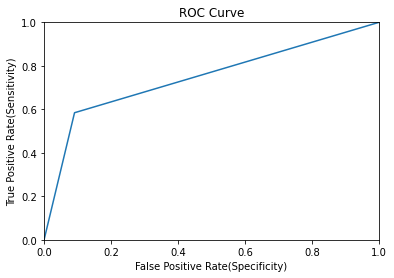

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(M2_SMOT_false_positive_rate, M2_SMOT_true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###### **AUC**

In [ ]:
M2_SMOT_roc_auc = auc(M2_SMOT_false_positive_rate, M2_SMOT_true_positive_rate)
M2_SMOT_roc_auc

0.7467151999252107

###### K- Fold cross validation

In [ ]:
M2_SMOT_KF_X = np.array(NumericDf[M2_SMOT_features])
M2_SMOT_KF_y = np.array(NumericDf['Target'])

M2_SMOT_KF_tree_KF = tree.DecisionTreeClassifier()

#Simple K-Fold cross validation. 10 folds.
from sklearn.model_selection import KFold
M2_SMOT_KF_kfold_models = KFold(n_splits=10)

from sklearn import model_selection
M2_SMOT_KF_scores = model_selection.cross_val_score(M2_SMOT_KF_tree_KF,M2_SMOT_KF_X, M2_SMOT_KF_y,cv=M2_SMOT_KF_kfold_models)
M2_SMOT_KF_Accuracy=M2_SMOT_KF_scores.mean()*100
print(M2_SMOT_KF_scores)
print("Avg K-Fold Accuracy", M2_SMOT_KF_Accuracy)

[0.9692814  0.96297312 0.96955568 0.95556775 0.97174986 0.9550192
 0.96050466 0.95912209 0.96076818 0.88806584]
Avg K-Fold Accuracy 95.52607777318775


### **Model with Feature Engineering**

In [ ]:
feature_engineer_data

,Target,Gender,Car,House,NoOfChild,IncomeTotal,Education,WkPhone,Phone,email,...,Managers,Medicine_staff,Private_service_staff,Realty_agents,Sales_staff,Secretaries,Security_staff,Waiters_or_barmen_staff,Children_Segmentation,FamSize_Segmentation
0,0,1,1,1,0,427500.0,3,1,0,0,...,0,0,0,0,0,0,0,1,2,1
1,0,1,1,1,0,427500.0,3,1,0,0,...,0,0,0,0,0,0,0,1,2,1
2,0,1,1,1,0,112500.0,1,0,0,0,...,0,0,0,0,0,0,1,0,2,1
3,0,0,0,1,0,270000.0,1,0,1,1,...,0,0,0,0,1,0,0,0,2,1
4,0,0,0,1,0,270000.0,1,0,1,1,...,0,0,0,0,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,1,0,315000.0,1,0,0,0,...,1,0,0,0,0,0,0,0,2,1
36453,1,0,0,1,0,157500.0,3,0,1,1,...,0,1,0,0,0,0,0,0,2,1
36454,1,0,0,1,0,157500.0,3,0,1,1,...,0,1,0,0,0,0,0,0,2,1
36455,1,0,0,1,0,283500.0,1,0,0,0,...,0,0,0,0,1,0,0,0,2,1


In [ ]:
feature_engineer_data.columns

Index(['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')

In [ ]:
from sklearn import tree

M2_Fe_features= ['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation']
print("Features",M2_Fe_features)

M2_Fe_X = feature_engineer_data[M2_Fe_features]
print("X shape", M2_Fe_X.shape)
M2_Fe_y = feature_engineer_data['Target']
print("Y shape", M2_Fe_y.shape)

Features ['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length', 'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience', 'EmpExp_Category', 'Employement_Status', 'Commercial_associate', 'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage', 'Married', 'Separated', 'Single_or_not_married', 'Widow', 'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment', 'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants', 'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff', 'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers', 'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents', 'Sales_staff', 'Secretaries', 'Security_staff', 'Waiters_or_barmen_staff', 'Children_Segmentation', 'FamSize_Segmentation']
X shape (36457, 53)
Y shape (36457,)


In [ ]:
#Building Tree Model
M2_Fe_DTree = tree.DecisionTreeClassifier(max_leaf_nodes=30)
M2_Fe_DTree.fit(M2_Fe_X,M2_Fe_y)

# ##Plotting the trees 
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree, export_text
# plt.figure(figsize=(100,80))
# plot_tree(M2_Fe_DTree, filled=True, 
#                      rounded=True,
#                      impurity=False,
#                      feature_names = M2_Fe_features)
# print( export_text(M2_Fe_DTree, feature_names = M2_Fe_features))

DecisionTreeClassifier(max_leaf_nodes=30)

#### **Tree Validation**

##### **Confusion Matrix & Accuracy**

In [ ]:
##########Tree Validation
#Tree Validation
M2_Fe_predict = M2_Fe_DTree.predict(M2_Fe_X)

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
M2_Fe_cm = confusion_matrix(M2_Fe_y, M2_Fe_predict)
print (M2_Fe_cm)

M2_Fe_total = sum(sum(M2_Fe_cm))
#####from confusion matrix calculate accuracy
M2_Fe_accuracy = (M2_Fe_cm[0,0]+M2_Fe_cm[1,1])/M2_Fe_total
print(M2_Fe_accuracy)

[[35841     0]
 [  589    27]]
0.9838439805798612


##### **Sensitivity and Specificity**

In [ ]:
M2_Fe_sensitivity = M2_Fe_cm[0,0]/(M2_Fe_cm[0,0]+M2_Fe_cm[0,1])
print('Sensitivity : ', M2_Fe_sensitivity )

M2_Fe_specificity= M2_Fe_cm[1,1]/(M2_Fe_cm[1,0]+M2_Fe_cm[1,1])
print('Specificity : ', M2_Fe_specificity)

Sensitivity :  1.0
Specificity :  0.04383116883116883


##### Finding max_leaf_nodes, Pruning: max_leaf_nodes - Finetuning

In [ ]:
print(M2_Fe_X.columns)
print(M2_Fe_X.shape)

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')
(36457, 53)


In [ ]:
from sklearn.model_selection import train_test_split
M2_Fe_X_train, M2_Fe_X_test, M2_Fe_y_train, M2_Fe_y_test = train_test_split(M2_Fe_X, M2_Fe_y, test_size=0.2,random_state=22)

In [ ]:
#training Tree Model
M2_Fe_clf = tree.DecisionTreeClassifier(max_leaf_nodes=560)
M2_Fe_clf.fit(M2_Fe_X_train,M2_Fe_y_train)

M2_Fe_predict1 = M2_Fe_clf.predict(M2_Fe_X_train)
M2_Fe_predict2 = M2_Fe_clf.predict(M2_Fe_X_test)

#On Train Data
M2_Fe_cm1 = confusion_matrix(M2_Fe_y_train,M2_Fe_predict1)
M2_Fe_total1 = sum(sum(M2_Fe_cm1))
M2_Fe_accuracy1 = (M2_Fe_cm1[0,0]+M2_Fe_cm1[1,1])/M2_Fe_total1
print("Train Accuracy", M2_Fe_accuracy1)

#On Test Data
M2_Fe_cm2 = confusion_matrix(M2_Fe_y_test,M2_Fe_predict2)
M2_Fe_total2 = sum(sum(M2_Fe_cm2))
M2_Fe_accuracy2 = (M2_Fe_cm2[0,0]+M2_Fe_cm2[1,1])/M2_Fe_total2
print("Test Accuracy", M2_Fe_accuracy2)

print('Difference',(M2_Fe_accuracy1-M2_Fe_accuracy2)*100)

Train Accuracy 0.9927653008743357
Test Accuracy 0.9733955019199122
Difference 1.9369798954423478


In [ ]:
#Building Tree Model
M2_Fe_DTree = tree.DecisionTreeClassifier(max_leaf_nodes=560)
M2_Fe_DTree.fit(M2_Fe_X,M2_Fe_y)

# ##Plotting the trees 
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree, export_text
# plt.figure(figsize=(100,80))
# plot_tree(M2_Fe_DTree, filled=True, 
#                      rounded=True,
#                      impurity=False,
#                      feature_names = M2_Fe_features)
# print( export_text(M2_Fe_DTree, feature_names = M2_Fe_features))

DecisionTreeClassifier(max_leaf_nodes=560)

**find out model is IMBALANCE:**  our intrested class is class1

#### **Handling Class Imbalance**

In [ ]:
print("Actual Data :", feature_engineer_data.shape)

#Frequency count on target column
M2_Fe_freq=feature_engineer_data['Target'].value_counts()
print(M2_Fe_freq)
print((M2_Fe_freq/M2_Fe_freq.sum())*100)

#Classwise data
M2_Fe_credit_risk_class0 = feature_engineer_data[feature_engineer_data['Target'] == 0]
M2_Fe_credit_risk_class1 = feature_engineer_data[feature_engineer_data['Target'] == 1]

print("Class0 Actual :", M2_Fe_credit_risk_class0.shape)
print("Class1 Actual  :", M2_Fe_credit_risk_class1.shape)

Actual Data : (36457, 54)
0    35841
1      616
Name: Target, dtype: int64
0    98.310338
1     1.689662
Name: Target, dtype: float64
Class0 Actual : (35841, 54)
Class1 Actual  : (616, 54)


##### **1. OVERSAMPLING & UNDERSAMPLING**

In [ ]:
##Undersampling of class-0
## Consider half of class-0
M2_Fe_credit_risk_class0_under = M2_Fe_credit_risk_class0.sample(int(0.5*len(M2_Fe_credit_risk_class0)))
print("Class0 Undersample :", M2_Fe_credit_risk_class0_under.shape)

##Oversampling of Class-1 
# Lets increase the size by four times
M2_Fe_credit_risk_class1_over = M2_Fe_credit_risk_class1.sample(25*len(M2_Fe_credit_risk_class1),replace=True)
print("Class1 Oversample :", M2_Fe_credit_risk_class1_over.shape)

#Concatenate to create the final balanced data
M2_Fe_OUS_credit_risk_balanced=pd.concat([M2_Fe_credit_risk_class0_under,M2_Fe_credit_risk_class1_over])
print("Final Balannced Data :", M2_Fe_OUS_credit_risk_balanced.shape)

#Frequency count on target column in the balanced data
freq=M2_Fe_OUS_credit_risk_balanced['Target'].value_counts()
print(freq)
print((freq/freq.sum())*100)

Class0 Undersample : (17920, 54)
Class1 Oversample : (15400, 54)
Final Balannced Data : (33320, 54)
0    17920
1    15400
Name: Target, dtype: int64
0    53.781513
1    46.218487
Name: Target, dtype: float64


###### Model with balanced data

In [ ]:
from sklearn import tree

M2_Fe_OUS_features= ['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation']
print("Features",M2_Fe_OUS_features)

M2_Fe_OUS_X = M2_Fe_OUS_credit_risk_balanced[M2_Fe_OUS_features]
print("X shape", M2_Fe_OUS_X.shape)
M2_Fe_OUS_y = M2_Fe_OUS_credit_risk_balanced['Target']
print("Y shape", M2_Fe_OUS_y.shape)

Features ['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length', 'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience', 'EmpExp_Category', 'Employement_Status', 'Commercial_associate', 'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage', 'Married', 'Separated', 'Single_or_not_married', 'Widow', 'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment', 'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants', 'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff', 'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers', 'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents', 'Sales_staff', 'Secretaries', 'Security_staff', 'Waiters_or_barmen_staff', 'Children_Segmentation', 'FamSize_Segmentation']
X shape (33320, 53)
Y shape (33320,)


In [ ]:
M2_Fe_OUS_X.columns

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')

###### **Building DT using Balance Data**

In [ ]:
#Building Tree Model
M2_Fe_OUS_DTree = tree.DecisionTreeClassifier(max_leaf_nodes=60)
M2_Fe_OUS_DTree.fit(M2_Fe_OUS_X,M2_Fe_OUS_y)

##Plotting the trees 
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree, export_text
# plt.figure(figsize=(100,80))
# plot_tree(M2_Fe_OUS_DTree, filled=True, 
#                      rounded=True,
#                      impurity=False,
#                      feature_names = M2_Fe_OUS_features)
# # print( export_text(M2_Fe_OUS_DTree, feature_names = M2_Fe_OUS_features))

DecisionTreeClassifier(max_leaf_nodes=60)

###### **Sensitivity and Specificity**

In [ ]:
#####Create the confusion matrix
##########Tree Validation
#Tree Validation
M2_Fe_OUS_predictions = M2_Fe_OUS_DTree.predict(M2_Fe_OUS_X)

M2_Fe_OUS_threshold=0.5
M2_Fe_OUS_predicted_class1=[ 0 if x < M2_Fe_OUS_threshold else 1 for x in M2_Fe_OUS_predictions]

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
M2_Fe_OUS_cm1 = confusion_matrix(M2_Fe_OUS_y, M2_Fe_OUS_predicted_class1)
print('Confusion Matrix : \n', M2_Fe_OUS_cm1)

M2_Fe_OUS_total1=sum(sum(M2_Fe_OUS_cm1))
#####from confusion matrix calculate accuracy
M2_Fe_OUS_accuracy1=(M2_Fe_OUS_cm1[0,0]+M2_Fe_OUS_cm1[1,1])/M2_Fe_OUS_total1
print ('Accuracy : ', M2_Fe_OUS_accuracy1)

M2_Fe_OUS_sensitivity1 = M2_Fe_OUS_cm1[0,0]/(M2_Fe_OUS_cm1[0,0]+M2_Fe_OUS_cm1[0,1])
print('Sensitivity : ', M2_Fe_OUS_sensitivity1 )

M2_Fe_OUS_specificity1 = M2_Fe_OUS_cm1[1,1]/(M2_Fe_OUS_cm1[1,0]+M2_Fe_OUS_cm1[1,1])
print('Specificity : ', M2_Fe_OUS_specificity1)

Confusion Matrix : 
 [[12600  5320]
 [ 4707 10693]]
Accuracy :  0.6990696278511405
Sensitivity :  0.703125
Specificity :  0.6943506493506494


Specificity INCREASED

###### Finding max_leaf_nodes, Pruning: max_leaf_nodes - Finetuning

In [ ]:
print(M2_Fe_OUS_X.columns)
print(M2_Fe_OUS_X.shape)

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')
(33320, 53)


In [ ]:
from sklearn.model_selection import train_test_split
M2_Fe_OUS_X_train, M2_Fe_OUS_X_test, M2_Fe_OUS_y_train, M2_Fe_OUS_y_test = train_test_split(M2_Fe_OUS_X, M2_Fe_OUS_y, test_size=0.2,random_state=22)

In [ ]:
#training Tree Model
M2_Fe_OUS_clf = tree.DecisionTreeClassifier(max_leaf_nodes=1400)
M2_Fe_OUS_clf.fit(M2_Fe_OUS_X_train,M2_Fe_OUS_y_train)

M2_Fe_OUS_predict1 = M2_Fe_OUS_clf.predict(M2_Fe_OUS_X_train)
M2_Fe_OUS_predict2 = M2_Fe_OUS_clf.predict(M2_Fe_OUS_X_test)

#On Train Data
print("=====================\n On Train Data : \n=====================")
M2_Fe_OUS_cm1 = confusion_matrix(M2_Fe_OUS_y_train,M2_Fe_OUS_predict1)
print("Confusion Matrix : \n", M2_Fe_OUS_cm1)
M2_Fe_OUS_total1 = sum(sum(M2_Fe_OUS_cm1))
M2_Fe_OUS_accuracy1 = (M2_Fe_OUS_cm1[0,0]+M2_Fe_OUS_cm1[1,1])/M2_Fe_OUS_total1
print("Train Accuracy", M2_Fe_OUS_accuracy1)
M2_Fe_OUS_sensitivity1 = M2_Fe_OUS_cm1[0,0]/(M2_Fe_OUS_cm1[0,0]+M2_Fe_OUS_cm1[0,1])
print('Sensitivity : ', M2_Fe_OUS_sensitivity1 )
M2_Fe_OUS_specificity1 = M2_Fe_OUS_cm1[1,1]/(M2_Fe_OUS_cm1[1,0]+M2_Fe_OUS_cm1[1,1])
print('Specificity : ', M2_Fe_OUS_specificity1)

#On Test Data
print("\n=====================\n On Test Data : \n=====================")
M2_Fe_OUS_cm2 = confusion_matrix(M2_Fe_OUS_y_test,M2_Fe_OUS_predict2)
print("Confusion Matrix : \n", M2_Fe_OUS_cm2)
M2_Fe_OUS_total2 = sum(sum(M2_Fe_OUS_cm2))
M2_Fe_OUS_accuracy2 = (M2_Fe_OUS_cm2[0,0]+M2_Fe_OUS_cm2[1,1])/M2_Fe_OUS_total2
print("Test Accuracy", M2_Fe_OUS_accuracy2)
M2_Fe_OUS_sensitivity2 = M2_Fe_OUS_cm2[0,0]/(M2_Fe_OUS_cm2[0,0]+M2_Fe_OUS_cm2[0,1])
print('Sensitivity : ', M2_Fe_OUS_sensitivity2 )
M2_Fe_OUS_specificity2 = M2_Fe_OUS_cm2[1,1]/(M2_Fe_OUS_cm2[1,0]+M2_Fe_OUS_cm2[1,1])
print('Specificity : ', M2_Fe_OUS_specificity2)

#Difference
print("\n=====================\n Difference Data : \n=====================")
print('Accuracy',(M2_Fe_OUS_accuracy1-M2_Fe_OUS_accuracy2)*100)
print('Sensitivity',(M2_Fe_OUS_sensitivity1-M2_Fe_OUS_sensitivity2)*100)
print('Specificity',(M2_Fe_OUS_specificity1-M2_Fe_OUS_specificity2)*100)


 On Train Data : 
Confusion Matrix : 
 [[14322    21]
 [    0 12313]]
Train Accuracy 0.9992121848739496
Sensitivity :  0.9985358711566618
Specificity :  1.0

 On Test Data : 
Confusion Matrix : 
 [[3445  132]
 [   0 3087]]
Test Accuracy 0.9801920768307323
Sensitivity :  0.9630975677942409
Specificity :  1.0

 Difference Data : 
Accuracy 1.9020108043217299
Sensitivity 3.543830336242082
Specificity 0.0


At max_leaf_nodes=1400 GOT MAX TRAIN accuracy & Matching Test accuracy

#### **Applying Original Data to MODEL**

In [ ]:
#####Create the confusion matrix
##########Tree Validation
#Tree Validation
M2_Fe_OUS_predictions = M2_Fe_OUS_clf.predict(M2_Fe_X)

M2_Fe_OUS_threshold=0.5
M2_Fe_OUS_predicted_class1=[ 0 if x < M2_Fe_OUS_threshold else 1 for x in M2_Fe_OUS_predictions]

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
M2_Fe_OUS_cm1 = confusion_matrix(M2_Fe_y, M2_Fe_OUS_predicted_class1)
print('Confusion Matrix : \n', M2_Fe_OUS_cm1)

M2_Fe_OUS_total1=sum(sum(M2_Fe_OUS_cm1))
#####from confusion matrix calculate accuracy
M2_Fe_OUS_accuracy1=(M2_Fe_OUS_cm1[0,0]+M2_Fe_OUS_cm1[1,1])/M2_Fe_OUS_total1
print ('Accuracy : ', M2_Fe_OUS_accuracy1)

M2_Fe_OUS_sensitivity1 = M2_Fe_OUS_cm1[0,0]/(M2_Fe_OUS_cm1[0,0]+M2_Fe_OUS_cm1[0,1])
print('Sensitivity : ', M2_Fe_OUS_sensitivity1 )

M2_Fe_OUS_specificity1 = M2_Fe_OUS_cm1[1,1]/(M2_Fe_OUS_cm1[1,0]+M2_Fe_OUS_cm1[1,1])
print('Specificity : ', M2_Fe_OUS_specificity1)

Confusion Matrix : 
 [[35039   802]
 [    0   616]]
Accuracy :  0.9780014811970267
Sensitivity :  0.9776233922044586
Specificity :  1.0


###### **Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
M2_Fe_OUS_accuracy1=(M2_Fe_OUS_cm1[0,0]+M2_Fe_OUS_cm1[1,1])/M2_Fe_OUS_total1
print ('Accuracy\t: ', M2_Fe_OUS_accuracy1)

M2_Fe_OUS_Precision_Class0 = M2_Fe_OUS_cm1[0,0]/(M2_Fe_OUS_cm1[0,0]+M2_Fe_OUS_cm1[1,0])
print('Precision_Class0: ', M2_Fe_OUS_Precision_Class0 )

M2_Fe_OUS_Recall_Class0 = M2_Fe_OUS_cm1[0,0]/(M2_Fe_OUS_cm1[0,0]+M2_Fe_OUS_cm1[0,1])
print('Recall_Class0\t: ', M2_Fe_OUS_Recall_Class0 )

M2_Fe_OUS_F1_Class0 = 2/((1/M2_Fe_OUS_Precision_Class0)+(1/M2_Fe_OUS_Recall_Class0))
print('F1_Class0\t: ', M2_Fe_OUS_F1_Class0 )


M2_Fe_OUS_Precision_Class1 = M2_Fe_OUS_cm1[1,1]/(M2_Fe_OUS_cm1[0,1]+M2_Fe_OUS_cm1[1,1])
print('Precision_Class1: ', M2_Fe_OUS_Precision_Class1 )

M2_Fe_OUS_Recall_Class1 = M2_Fe_OUS_cm1[1,1]/(M2_Fe_OUS_cm1[1,0]+M2_Fe_OUS_cm1[1,1])
print('Recall_Class1\t: ', M2_Fe_OUS_Recall_Class1 )

M2_Fe_OUS_F1_Class1 = 2/((1/M2_Fe_OUS_Precision_Class1)+(1/M2_Fe_OUS_Recall_Class1))
print('F1_Class1\t: ', M2_Fe_OUS_F1_Class1 )

Accuracy	:  0.9775351784293825
Precision_Class0:  1.0
Recall_Class0	:  0.9771490750816104
F1_Class0	:  0.988442487616951
Precision_Class1:  0.4292682926829268
Recall_Class1	:  1.0
F1_Class1	:  0.6006825938566552


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(M2_Fe_y,M2_Fe_OUS_predicted_class1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     35841
           1       0.43      1.00      0.61       616

    accuracy                           0.98     36457
   macro avg       0.72      0.99      0.80     36457
weighted avg       0.99      0.98      0.98     36457



###### **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

M2_Fe_OUS_actual = feature_engineer_data["Target"]
M2_Fe_OUS_false_positive_rate, M2_Fe_OUS_true_positive_rate, M2_Fe_OUS_thresholds = roc_curve(M2_Fe_OUS_actual, M2_Fe_OUS_predictions)
print("false_positive_rate", M2_Fe_OUS_false_positive_rate)
print("true_positive_rate", M2_Fe_OUS_true_positive_rate)
print("thresholds", M2_Fe_OUS_thresholds)

false_positive_rate [0.         0.02237661 1.        ]
true_positive_rate [0. 1. 1.]
thresholds [2 1 0]


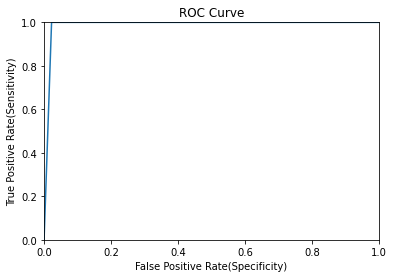

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(M2_Fe_OUS_false_positive_rate, M2_Fe_OUS_true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###### **AUC**

In [ ]:
M2_Fe_OUS_roc_auc = auc(M2_Fe_OUS_false_positive_rate, M2_Fe_OUS_true_positive_rate)
M2_Fe_OUS_roc_auc

0.9888116961022293

###### K- Fold cross validation

In [ ]:
M2_Fe_OUS_KF_X = np.array(feature_engineer_data[M2_Fe_OUS_features])
M2_Fe_OUS_KF_y = np.array(feature_engineer_data['Target'])

M2_Fe_OUS_tree_KF = tree.DecisionTreeClassifier()

#Simple K-Fold cross validation. 10 folds.
from sklearn.model_selection import KFold
M2_Fe_OUS_KF_kfold_models = KFold(n_splits=10,random_state=22,shuffle=True)

from sklearn import model_selection
M2_Fe_OUS_KF_scores = model_selection.cross_val_score(M2_Fe_OUS_tree_KF,M2_Fe_OUS_KF_X, M2_Fe_OUS_KF_y,cv=M2_Fe_OUS_KF_kfold_models)
M2_Fe_OUS_KF_Accuracy=M2_Fe_OUS_KF_scores.mean()*100
print(M2_Fe_OUS_KF_scores)
print("Avg K-Fold Accuracy", M2_Fe_OUS_KF_Accuracy)

[0.96791004 0.96818431 0.97394405 0.97860669 0.97284696 0.9733955
 0.97366978 0.97256516 0.96927298 0.97283951]
Avg K-Fold Accuracy 97.2323496369737


#### **2.SMOTE:Sinthetic Minority Oversampling Technique**

In [ ]:
print("Actual Data :", feature_engineer_data.shape)

#Frequency count on target column
M2_Fe_SMOT_freq=feature_engineer_data['Target'].value_counts()
print(M2_Fe_SMOT_freq)
print((M2_Fe_SMOT_freq/M2_Fe_SMOT_freq.sum())*100)

#Classwise data
M2_Fe_SMOT_credit_risk_class0 = feature_engineer_data[feature_engineer_data['Target'] == 0]
M2_Fe_SMOT_credit_risk_class1 = feature_engineer_data[feature_engineer_data['Target'] == 1]

print("Class0 Actual :", M2_Fe_SMOT_credit_risk_class0.shape)
print("Class1 Actual  :", M2_Fe_SMOT_credit_risk_class1.shape)

Actual Data : (36457, 54)
0    35841
1      616
Name: Target, dtype: int64
0    98.310338
1     1.689662
Name: Target, dtype: float64
Class0 Actual : (35841, 54)
Class1 Actual  : (616, 54)


###### SMOTE Function

In [ ]:
print(feature_engineer_data.columns)
M2_Fe_X=feature_engineer_data.iloc[:,1:]
M2_Fe_y=feature_engineer_data["Target"]
print(M2_Fe_X.shape)
print(M2_Fe_y.shape)

Index(['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')
(36457, 53)
(36457,

In [ ]:
M2_Fe_X.columns

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')

In [ ]:
M2_Fe_y


0        0
1        0
2        0
3        0
4        0
        ..
36452    1
36453    1
36454    1
36455    1
36456    1
Name: Target, Length: 36457, dtype: int64

###### sample size

In [ ]:
from imblearn.over_sampling import SMOTE 
M2_Fe_SMOT_smote = SMOTE(sampling_strategy=0.6, random_state = 22)
M2_Fe_SMOT_X_train_smote, M2_Fe_SMOT_y_train_smote = M2_Fe_SMOT_smote.fit_resample(M2_Fe_X, M2_Fe_y)

import collections
print("Before SMOTE", collections.Counter(M2_Fe_y))
print("After SMOTE", collections.Counter(M2_Fe_SMOT_y_train_smote))

Before SMOTE Counter({0: 35841, 1: 616})
After SMOTE Counter({0: 35841, 1: 21504})


In [ ]:
M2_Fe_SMOT_credit_Balance=M2_Fe_SMOT_X_train_smote
M2_Fe_SMOT_credit_Balance["Target"]=M2_Fe_SMOT_y_train_smote

In [ ]:
M2_Fe_SMOT_credit_Balance

,Gender,Car,House,NoOfChild,IncomeTotal,Education,WkPhone,Phone,email,FamSize,...,Medicine_staff,Private_service_staff,Realty_agents,Sales_staff,Secretaries,Security_staff,Waiters_or_barmen_staff,Children_Segmentation,FamSize_Segmentation,Target
0,1,1,1,0,427500.000000,3,1,0,0,2,...,0,0,0,0,0,0,1,2,1,0
1,1,1,1,0,427500.000000,3,1,0,0,2,...,0,0,0,0,0,0,1,2,1,0
2,1,1,1,0,112500.000000,1,0,0,0,2,...,0,0,0,0,0,1,0,2,1,0
3,0,0,1,0,270000.000000,1,0,1,1,1,...,0,0,0,1,0,0,0,2,1,0
4,0,0,1,0,270000.000000,1,0,1,1,1,...,0,0,0,1,0,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57340,0,0,1,0,292500.000000,2,0,0,0,2,...,0,0,0,0,0,0,0,2,1,1
57341,1,0,0,1,131032.613399,1,0,0,0,3,...,0,0,0,0,0,0,0,1,1,1
57342,0,1,0,0,225000.000000,2,0,0,0,2,...,0,0,0,0,0,0,0,2,1,1
57343,0,0,0,1,180000.000000,1,1,1,0,3,...,0,0,0,0,0,0,0,1,1,1


###### Model with balanced data

In [ ]:
from sklearn import tree

M2_Fe_SMOT_features= ['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation']
print("Features",M2_Fe_SMOT_features)

M2_Fe_SMOT_X = M2_Fe_SMOT_credit_Balance[M2_Fe_SMOT_features]
print("X shape", M2_Fe_SMOT_X.shape)
M2_Fe_SMOT_y = M2_Fe_SMOT_credit_Balance['Target']
print("Y shape", M2_Fe_SMOT_y.shape)

Features ['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length', 'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience', 'EmpExp_Category', 'Employement_Status', 'Commercial_associate', 'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage', 'Married', 'Separated', 'Single_or_not_married', 'Widow', 'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment', 'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants', 'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff', 'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers', 'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents', 'Sales_staff', 'Secretaries', 'Security_staff', 'Waiters_or_barmen_staff', 'Children_Segmentation', 'FamSize_Segmentation']
X shape (57345, 53)
Y shape (57345,)


###### **Building DT using Balance Data**

In [ ]:
#Building Tree Model
M2_Fe_SMOT_DTree = tree.DecisionTreeClassifier(max_leaf_nodes=30)
M2_Fe_SMOT_DTree.fit(M2_Fe_SMOT_X,M2_Fe_SMOT_y)

# ##Plotting the trees 
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree, export_text
# plt.figure(figsize=(100,80))
# plot_tree(M2_Fe_SMOT_DTree, filled=True, 
#                      rounded=True,
#                      impurity=False,
#                      feature_names = M2_Fe_SMOT_features)
# print( export_text(M2_Fe_SMOT_DTree, feature_names = M2_Fe_SMOT_features))

DecisionTreeClassifier(max_leaf_nodes=30)

###### Finding max_leaf_nodes, Pruning: max_leaf_nodes - Finetuning

In [ ]:
print(M2_Fe_SMOT_X.columns)
print(M2_Fe_SMOT_X.shape)

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')
(57345, 53)


In [ ]:
from sklearn.model_selection import train_test_split
M2_Fe_SMOT_X_train, M2_Fe_SMOT_X_test, M2_Fe_SMOT_y_train, M2_Fe_SMOT_y_test = train_test_split(M2_Fe_SMOT_X, M2_Fe_SMOT_y, test_size=0.2,random_state=22)

In [ ]:
#training Tree Model
M2_Fe_SMOT_clf = tree.DecisionTreeClassifier(max_leaf_nodes=1440)
M2_Fe_SMOT_clf.fit(M2_Fe_SMOT_X_train,M2_Fe_SMOT_y_train)

M2_Fe_SMOT_predict1 = M2_Fe_SMOT_clf.predict(M2_Fe_SMOT_X_train)
M2_Fe_SMOT_predict2 = M2_Fe_SMOT_clf.predict(M2_Fe_SMOT_X_test)

#On Train Data
print("=====================\n On Train Data : \n=====================")
M2_Fe_SMOT_cm1 = confusion_matrix(M2_Fe_SMOT_y_train,M2_Fe_SMOT_predict1)
print("Confusion Matrix : \n", M2_Fe_SMOT_cm1)
M2_Fe_SMOT_total1 = sum(sum(M2_Fe_SMOT_cm1))
M2_Fe_SMOT_accuracy1 = (M2_Fe_SMOT_cm1[0,0]+M2_Fe_SMOT_cm1[1,1])/M2_Fe_SMOT_total1
print("Accuracy\t: ", M2_Fe_SMOT_accuracy1)
M2_Fe_SMOT_sensitivity1 = M2_Fe_SMOT_cm1[0,0]/(M2_Fe_SMOT_cm1[0,0]+M2_Fe_SMOT_cm1[0,1])
print('Sensitivity\t: ', M2_Fe_SMOT_sensitivity1 )
M2_Fe_SMOT_specificity1 = M2_Fe_SMOT_cm1[1,1]/(M2_Fe_SMOT_cm1[1,0]+M2_Fe_SMOT_cm1[1,1])
print('Specificity\t: ', M2_Fe_SMOT_specificity1)

#On Test Data
print("\n=====================\n On Test Data : \n=====================")
M2_Fe_SMOT_cm2 = confusion_matrix(M2_Fe_SMOT_y_test,M2_Fe_SMOT_predict2)
print("Confusion Matrix : \n", M2_Fe_SMOT_cm2)
M2_Fe_SMOT_total2 = sum(sum(M2_Fe_SMOT_cm2))
M2_Fe_SMOT_accuracy2 = (M2_Fe_SMOT_cm2[0,0]+M2_Fe_SMOT_cm2[1,1])/M2_Fe_SMOT_total2
print("Accuracy\t: ", M2_Fe_SMOT_accuracy2)
M2_Fe_SMOT_sensitivity2 = M2_Fe_SMOT_cm2[0,0]/(M2_Fe_SMOT_cm2[0,0]+M2_Fe_SMOT_cm2[0,1])
print('Sensitivity\t: ', M2_Fe_SMOT_sensitivity2 )
M2_Fe_SMOT_specificity2 = M2_Fe_SMOT_cm2[1,1]/(M2_Fe_SMOT_cm2[1,0]+M2_Fe_SMOT_cm2[1,1])
print('Specificity\t: ', M2_Fe_SMOT_specificity2)

#Difference
print("\n=====================\n Difference Data : \n=====================")
print('Accuracy\t: ',(M2_Fe_SMOT_accuracy1-M2_Fe_SMOT_accuracy2)*100)
print('Sensitivity\t: ',(M2_Fe_SMOT_sensitivity1-M2_Fe_SMOT_sensitivity2)*100)
print('Specificity\t: ',(M2_Fe_SMOT_specificity1-M2_Fe_SMOT_specificity2)*100)


 On Train Data : 
Confusion Matrix : 
 [[28702    28]
 [   71 17075]]
Accuracy	:  0.9978420088935391
Sensitivity	:  0.9990254089801601
Specificity	:  0.9958590924997084

 On Test Data : 
Confusion Matrix : 
 [[6980  131]
 [ 112 4246]]
Accuracy	:  0.9788124509547476
Sensitivity	:  0.9815778371537055
Specificity	:  0.9743001376778339

 Difference Data : 
Accuracy	:  1.9029557938791575
Sensitivity	:  1.7447571826454622
Specificity	:  2.155895482187453


At max_leaf_nodes=1440 We get max Train Accuracy & Match Test Accuracy also Accuracy Difference is less than 2%

#### **Applying Original Data to MODEL**

In [ ]:
#####Create the confusion matrix
##########Tree Validation
#Tree Validation
M2_Fe_SMOT_predictions = M2_Fe_SMOT_clf.predict(M2_Fe_X)

M2_Fe_threshold=0.5
M2_Fe_predicted_class1=[ 0 if x < M2_Fe_threshold else 1 for x in M2_Fe_SMOT_predictions]

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
M2_Fe_cm1 = confusion_matrix(M2_Fe_y, M2_Fe_predicted_class1)
print('Confusion Matrix : \n', M2_Fe_cm1)

M2_Fe_total1=sum(sum(M2_Fe_cm1))
#####from confusion matrix calculate accuracy
M2_Fe_accuracy1=(M2_Fe_cm1[0,0]+M2_Fe_cm1[1,1])/M2_Fe_total1
print ('Accuracy\t: ', M2_Fe_accuracy1)

M2_Fe_sensitivity1 = M2_Fe_cm1[0,0]/(M2_Fe_cm1[0,0]+M2_Fe_cm1[0,1])
print('Sensitivity\t: ', M2_Fe_sensitivity1 )

M2_Fe_specificity1 = M2_Fe_cm1[1,1]/(M2_Fe_cm1[1,0]+M2_Fe_cm1[1,1])
print('Specificity\t: ', M2_Fe_specificity1)

Confusion Matrix : 
 [[35682   159]
 [  134   482]]
Accuracy	:  0.9919631346517815
Sensitivity	:  0.9955637398510087
Specificity	:  0.7824675324675324


###### **Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
M2_Fe_accuracy1=(M2_Fe_cm1[0,0]+M2_Fe_cm1[1,1])/M2_Fe_total1
print ('Accuracy\t: ', M2_Fe_accuracy1)

M2_Fe_Precision_Class0 = M2_Fe_cm1[0,0]/(M2_Fe_cm1[0,0]+M2_Fe_cm1[1,0])
print('Precision_Class0: ', M2_Fe_Precision_Class0 )

M2_Fe_Recall_Class0 = M2_Fe_cm1[0,0]/(M2_Fe_cm1[0,0]+M2_Fe_cm1[0,1])
print('Recall_Class0\t: ', M2_Fe_Recall_Class0 )

M2_Fe_F1_Class0 = 2/((1/M2_Fe_Precision_Class0)+(1/M2_Fe_Recall_Class0))
print('F1_Class0\t: ', M2_Fe_F1_Class0 )


M2_Fe_Precision_Class1 = M2_Fe_cm1[1,1]/(M2_Fe_cm1[0,1]+M2_Fe_cm1[1,1])
print('Precision_Class1: ', M2_Fe_Precision_Class1 )

M2_Fe_Recall_Class1 = M2_Fe_cm1[1,1]/(M2_Fe_cm1[1,0]+M2_Fe_cm1[1,1])
print('Recall_Class1\t: ', M2_Fe_Recall_Class1 )

M2_Fe_F1_Class1 = 2/((1/M2_Fe_Precision_Class1)+(1/M2_Fe_Recall_Class1))
print('F1_Class1\t: ', M2_Fe_F1_Class1 )

Accuracy	:  0.9919631346517815
Precision_Class0:  0.9962586553495645
Recall_Class0	:  0.9955637398510087
F1_Class0	:  0.9959110763777439
Precision_Class1:  0.7519500780031201
Recall_Class1	:  0.7824675324675324
F1_Class1	:  0.7669053301511534


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(M2_Fe_y,M2_Fe_predicted_class1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35841
           1       0.75      0.78      0.77       616

    accuracy                           0.99     36457
   macro avg       0.87      0.89      0.88     36457
weighted avg       0.99      0.99      0.99     36457



###### **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

M2_Fe_SMOT_actual = feature_engineer_data["Target"]
M2_Fe_SMOT_false_positive_rate, M2_Fe_SMOT_true_positive_rate, M2_Fe_SMOT_thresholds = roc_curve(M2_Fe_SMOT_actual, M2_Fe_SMOT_predictions)
print("false_positive_rate", M2_Fe_SMOT_false_positive_rate)
print("true_positive_rate", M2_Fe_SMOT_true_positive_rate)
print("thresholds", M2_Fe_SMOT_thresholds)

false_positive_rate [0.         0.00443626 1.        ]
true_positive_rate [0.         0.78246753 1.        ]
thresholds [2 1 0]


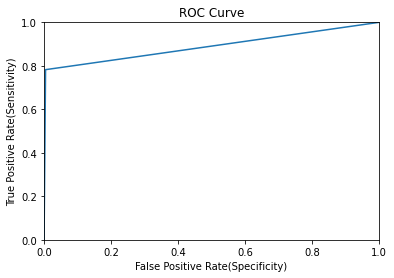

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(M2_Fe_SMOT_false_positive_rate, M2_Fe_SMOT_true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###### **AUC**

In [ ]:
M2_Fe_SMOT_roc_auc = auc(M2_Fe_SMOT_false_positive_rate, M2_Fe_SMOT_true_positive_rate)
M2_Fe_SMOT_roc_auc

0.8890156361592705

###### K- Fold cross validation

In [ ]:
M2_Fe_SMOT_KF_X = np.array(M2_Fe_X)
M2_Fe_SMOT_KF_y = np.array(feature_engineer_data['Target'])

M2_Fe_SMOT_tree_KF = tree.DecisionTreeClassifier()

#Simple K-Fold cross validation. 10 folds.
from sklearn.model_selection import KFold
M2_Fe_SMOT_KF_kfold_models = KFold(n_splits=10)

from sklearn import model_selection
M2_Fe_SMOT_KF_scores = model_selection.cross_val_score(M2_Fe_SMOT_tree_KF,M2_Fe_SMOT_KF_X, M2_Fe_SMOT_KF_y,cv=M2_Fe_SMOT_KF_kfold_models)
M2_Fe_SMOT_KF_Accuracy=M2_Fe_SMOT_KF_scores.mean()*100
print(M2_Fe_SMOT_KF_scores)
print("Avg K-Fold Accuracy", M2_Fe_SMOT_KF_Accuracy)

[0.96324739 0.9662644  0.9591333  0.95858475 0.96379594 0.96050466
 0.95776193 0.95528121 0.9484225  0.8866941 ]
Avg K-Fold Accuracy 95.19690180418324


### **SUMMARY DECISION TREE MODELS**

In [ ]:
best_dt={'Balance_Method':['OSUS','OSUS','OSUS','OSUS','OSUS','SMOTE','SMOTE','SMOTE','SMOTE','SMOTE'],'Parameter':['Accuracy','Sensitivity','Specificity','AUC','Avg K-Fold Accuracy','Accuracy','Sensitivity','Specificity','AUC','Avg K-Fold Accuracy'],'Normal_Data':[M2_OUS_accuracy1,M2_OUS_sensitivity1,M2_OUS_specificity1,M2_OUS_roc_auc,M2_OUS_KF_Accuracy,M2_SMOT_accuracy1,M2_SMOT_sensitivity1,M2_SMOT_specificity1,M2_SMOT_roc_auc,M2_SMOT_KF_Accuracy],'Feature_Engineering_Data':[M2_Fe_OUS_accuracy1,M2_Fe_OUS_sensitivity1,M2_Fe_OUS_specificity1,M2_Fe_OUS_roc_auc,M2_Fe_OUS_KF_Accuracy,M2_Fe_SMOT_accuracy1,M2_Fe_SMOT_sensitivity1,M2_Fe_SMOT_specificity1,M2_Fe_SMOT_roc_auc,M2_Fe_SMOT_KF_Accuracy]}

In [ ]:
best_DT=pd.DataFrame(best_dt)
best_DT

,Balance_Method,Parameter,Normal_Data,Feature_Engineering_Data
0,OSUS,Accuracy,0.978605,0.978001
1,OSUS,Sensitivity,0.978237,0.977623
2,OSUS,Specificity,1.000000,1.000000
3,OSUS,AUC,0.989119,0.988812
4,OSUS,Avg K-Fold Accuracy,95.290192,97.232350
5,SMOTE,Accuracy,0.903530,0.997842
6,SMOTE,Sensitivity,0.909015,0.999025
7,SMOTE,Specificity,0.584416,0.995859
8,SMOTE,AUC,0.746715,0.889016
9,SMOTE,Avg K-Fold Accuracy,95.526078,95.196902


## M3:RANDOM FOREST

### **Using OVERSAMPLING & UNDERSAMPLING DT model**

In [ ]:
M2_Fe_OUS_credit_risk_balanced.columns

Index(['Target', 'Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal',
       'Education', 'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')

In [ ]:
M2_Fe_OUS_X_train.columns

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')

In [ ]:
M2_Fe_OUS_X_train.shape

(27148, 53)

In [ ]:
import math
math.sqrt(53)

7.280109889280518

features i.e. t=53 then p~7 also in max_leaf_nodes is 1000 in Decission tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_OUS_forest=RandomForestClassifier(n_estimators=300, max_features=7, max_leaf_nodes=2000)
# n_estimators - Trees - As high as possible
# max_features - p - low ==>(sqrt(t))
# max_leaf_nodes - Slightly higher than single tree
RF_OUS_forest.fit(M2_Fe_OUS_X_train,M2_Fe_OUS_y_train)

RandomForestClassifier(max_features=7, max_leaf_nodes=2000, n_estimators=300)

#### Random Forest Results

In [ ]:
#####predicting on test data ####
RF_OUS_Forest_predict_train=RF_OUS_forest.predict(M2_Fe_OUS_X_train)
RF_OUS_Forest_predict_test=RF_OUS_forest.predict(M2_Fe_OUS_X_test)

In [ ]:
#On Train Data
print("=====================\n On Train Data : \n=====================")
RF_OUS_cm1 = confusion_matrix(M2_Fe_OUS_y_train,RF_OUS_Forest_predict_train)
print("Confusion Matrix : \n", RF_OUS_cm1)
RF_OUS_Forest_total1 = sum(sum(RF_OUS_cm1))
RF_OUS_Forest_accuracy1 = (RF_OUS_cm1[0,0]+RF_OUS_cm1[1,1])/RF_OUS_Forest_total1
print("Accuracy\t: ", RF_OUS_Forest_accuracy1)
RF_OUS_Forest_sensitivity1 = RF_OUS_cm1[0,0]/(RF_OUS_cm1[0,0]+RF_OUS_cm1[0,1])
print('Sensitivity\t: ', RF_OUS_Forest_sensitivity1 )
RF_OUS_Forest_specificity1 = RF_OUS_cm1[1,1]/(RF_OUS_cm1[1,0]+RF_OUS_cm1[1,1])
print('Specificity\t: ', RF_OUS_Forest_specificity1)

#On Test Data
print("\n=====================\n On Test Data : \n=====================")
RF_OUS_cm2 = confusion_matrix(M2_Fe_OUS_y_test,RF_OUS_Forest_predict_test)
print("Confusion Matrix : \n", RF_OUS_cm2)
RF_OUS_Forest_total2 = sum(sum(RF_OUS_cm2))
RF_OUS_Forest_accuracy2 = (RF_OUS_cm2[0,0]+RF_OUS_cm2[1,1])/RF_OUS_Forest_total2
print("Accuracy\t: ", RF_OUS_Forest_accuracy2)
RF_OUS_Forest_sensitivity2 = RF_OUS_cm2[0,0]/(RF_OUS_cm2[0,0]+RF_OUS_cm2[0,1])
print('Sensitivity\t: ', RF_OUS_Forest_sensitivity2 )
RF_OUS_Forest_specificity2 = RF_OUS_cm2[1,1]/(RF_OUS_cm2[1,0]+RF_OUS_cm2[1,1])
print('Specificity\t: ', RF_OUS_Forest_specificity2)

#Difference
print("\n=====================\n Difference Data(%) : \n=====================")
print('Accuracy\t: ',(RF_OUS_Forest_accuracy1-RF_OUS_Forest_accuracy2)*100)
print('Sensitivity\t: ',(RF_OUS_Forest_sensitivity1-RF_OUS_Forest_sensitivity2)*100)
print('Specificity\t: ',(RF_OUS_Forest_specificity1-RF_OUS_Forest_specificity2)*100)


 On Train Data : 
Confusion Matrix : 
 [[14307    32]
 [    0 12809]]
Accuracy	:  0.9988212759687638
Sensitivity	:  0.9977683241509171
Specificity	:  1.0

 On Test Data : 
Confusion Matrix : 
 [[3545   36]
 [   0 3207]]
Accuracy	:  0.99469652327637
Sensitivity	:  0.9899469421949176
Specificity	:  1.0

 Difference Data(%) : 
Accuracy	:  0.4124752692393763
Sensitivity	:  0.7821381955999462
Specificity	:  0.0


#### **Applying Original Data to MODEL**

In [ ]:
#####Create the confusion matrix
##########Tree Validation
#Tree Validation
RF_OUS_predictions = RF_OUS_forest.predict(M2_Fe_X)

RF_OUS_threshold=0.5
RF_OUS_predicted_class1=[ 0 if x < RF_OUS_threshold else 1 for x in RF_OUS_predictions]

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
RF_OUS_cm1 = confusion_matrix(M2_Fe_y, RF_OUS_predicted_class1)
print('Confusion Matrix :\n', RF_OUS_cm1)

RF_OUS_total1=sum(sum(RF_OUS_cm1))
#####from confusion matrix calculate accuracy
RF_OUS_accuracy1=(RF_OUS_cm1[0,0]+RF_OUS_cm1[1,1])/RF_OUS_total1
print ('Accuracy\t: ', RF_OUS_accuracy1)

RF_OUS_sensitivity1 = RF_OUS_cm1[0,0]/(RF_OUS_cm1[0,0]+RF_OUS_cm1[0,1])
print('Sensitivity\t: ', RF_OUS_sensitivity1 )

RF_OUS_specificity1 = RF_OUS_cm1[1,1]/(RF_OUS_cm1[1,0]+RF_OUS_cm1[1,1])
print('Specificity\t: ', RF_OUS_specificity1)

Confusion Matrix :
 [[35576   265]
 [    0   616]]
Accuracy	:  0.9927311627396659
Sensitivity	:  0.9926062330850144
Specificity	:  1.0


###### **Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
RF_OUS_accuracy1=(RF_OUS_cm1[0,0]+RF_OUS_cm1[1,1])/RF_OUS_total1
print ('Accuracy\t: ', RF_OUS_accuracy1)

RF_OUS_Precision_Class0 = RF_OUS_cm1[0,0]/(RF_OUS_cm1[0,0]+RF_OUS_cm1[1,0])
print('Precision_Class0: ', RF_OUS_Precision_Class0 )

RF_OUS_Recall_Class0 = RF_OUS_cm1[0,0]/(RF_OUS_cm1[0,0]+RF_OUS_cm1[0,1])
print('Recall_Class0\t: ', RF_OUS_Recall_Class0 )

RF_OUS_F1_Class0 = 2/((1/RF_OUS_Precision_Class0)+(1/RF_OUS_Recall_Class0))
print('F1_Class0\t: ', RF_OUS_F1_Class0 )


RF_OUS_Precision_Class1 = RF_OUS_cm1[1,1]/(RF_OUS_cm1[0,1]+RF_OUS_cm1[1,1])
print('Precision_Class1: ', RF_OUS_Precision_Class1 )

RF_OUS_Recall_Class1 = RF_OUS_cm1[1,1]/(RF_OUS_cm1[1,0]+RF_OUS_cm1[1,1])
print('Recall_Class1\t: ', RF_OUS_Recall_Class1 )

RF_OUS_F1_Class1 = 2/((1/RF_OUS_Precision_Class1)+(1/RF_OUS_Recall_Class1))
print('F1_Class1\t: ', RF_OUS_F1_Class1 )

Accuracy	:  0.9927311627396659
Precision_Class0:  1.0
Recall_Class0	:  0.9926062330850144
F1_Class0	:  0.9962893988826191
Precision_Class1:  0.699205448354143
Recall_Class1	:  1.0
F1_Class1	:  0.8229792919171677


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(M2_Fe_y,RF_OUS_predicted_class1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     35841
           1       0.70      1.00      0.82       616

    accuracy                           0.99     36457
   macro avg       0.85      1.00      0.91     36457
weighted avg       0.99      0.99      0.99     36457



###### **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

RF_OUS_actual = feature_engineer_data["Target"]
RF_OUS_false_positive_rate, RF_OUS_true_positive_rate, RF_OUS_thresholds = roc_curve(RF_OUS_actual, RF_OUS_predictions)
print("false_positive_rate\t:", RF_OUS_false_positive_rate)
print("true_positive_rate\t:", RF_OUS_true_positive_rate)
print("thresholds\t\t:", RF_OUS_thresholds)

false_positive_rate	: [0.         0.00739377 1.        ]
true_positive_rate	: [0. 1. 1.]
thresholds		: [2 1 0]


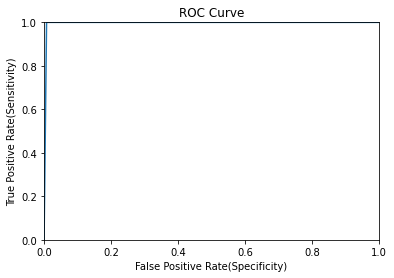

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(RF_OUS_false_positive_rate, RF_OUS_true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###### **AUC**

In [ ]:
RF_OUS_roc_auc = auc(RF_OUS_false_positive_rate, RF_OUS_true_positive_rate)
RF_OUS_roc_auc

0.9963031165425072

### **Using SMOTE DT Oversampling**

In [ ]:
M2_Fe_SMOT_credit_Balance.columns

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation', 'Target'],
      dtype='object')

In [ ]:
M2_Fe_SMOT_X_train.columns

Index(['Gender', 'Car', 'House', 'NoOfChild', 'IncomeTotal', 'Education',
       'WkPhone', 'Phone', 'email', 'FamSize', 'Account_Length',
       'Marriage_Status', 'Age', 'Age_Bucket', 'EmpExperience',
       'EmpExp_Category', 'Employement_Status', 'Commercial_associate',
       'Pensioner', 'State_servant', 'Student', 'Working', 'Civil_marriage',
       'Married', 'Separated', 'Single_or_not_married', 'Widow',
       'Co_Op_Appartment', 'House_Or_apartment', 'Municipal_apartment',
       'Office_apartment', 'Rented_apartment', 'With_parents', 'Accountants',
       'Cleaning_staff', 'Cooking_staff', 'Core_staff', 'Drivers', 'HR_staff',
       'High_skill_tech_staff', 'IT_staff', 'Laborers', 'Low_skill_Laborers',
       'Managers', 'Medicine_staff', 'Private_service_staff', 'Realty_agents',
       'Sales_staff', 'Secretaries', 'Security_staff',
       'Waiters_or_barmen_staff', 'Children_Segmentation',
       'FamSize_Segmentation'],
      dtype='object')

In [ ]:
M2_Fe_SMOT_X_train.shape

(45876, 53)

In [ ]:
import math
math.sqrt(53)

7.280109889280518

features i.e. t=53 then p~7 also in max_leaf_nodes is 1000 in Decission tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_SMOT_forest=RandomForestClassifier(n_estimators=300, max_features=7, max_leaf_nodes=2000)
# n_estimators - Trees - As high as possible
# max_features - p - low ==>(sqrt(t))
# max_leaf_nodes - Slightly higher than single tree
RF_SMOT_forest.fit(M2_Fe_SMOT_X_train,M2_Fe_SMOT_y_train)

RandomForestClassifier(max_features=7, max_leaf_nodes=2000, n_estimators=300)

#### Random Forest Results

In [ ]:
#####predicting on test data ####
RF_SMOT_Forest_predict_train=RF_SMOT_forest.predict(M2_Fe_SMOT_X_train)
RF_SMOT_Forest_predict_test=RF_SMOT_forest.predict(M2_Fe_SMOT_X_test)

In [ ]:
#On Train Data
print("=====================\n On Train Data : \n=====================")
RF_SMOT_cm1 = confusion_matrix(M2_Fe_SMOT_y_train,RF_SMOT_Forest_predict_train)
print("Confusion Matrix : \n", RF_SMOT_cm1)
RF_SMOT_Forest_total1 = sum(sum(RF_SMOT_cm1))
RF_SMOT_Forest_accuracy1 = (RF_SMOT_cm1[0,0]+RF_SMOT_cm1[1,1])/RF_SMOT_Forest_total1
print("Accuracy\t: ", RF_SMOT_Forest_accuracy1)
RF_SMOT_Forest_sensitivity1 = RF_SMOT_cm1[0,0]/(RF_SMOT_cm1[0,0]+RF_SMOT_cm1[0,1])
print('Sensitivity\t: ', RF_SMOT_Forest_sensitivity1 )
RF_SMOT_Forest_specificity1 = RF_SMOT_cm1[1,1]/(RF_SMOT_cm1[1,0]+RF_SMOT_cm1[1,1])
print('Specificity\t: ', RF_SMOT_Forest_specificity1)

#On Test Data
print("\n=====================\n On Test Data : \n=====================")
RF_SMOT_cm2 = confusion_matrix(M2_Fe_SMOT_y_test,RF_SMOT_Forest_predict_test)
print("Confusion Matrix : \n", RF_SMOT_cm2)
RF_SMOT_Forest_total2 = sum(sum(RF_SMOT_cm2))
RF_SMOT_Forest_accuracy2 = (RF_SMOT_cm2[0,0]+RF_SMOT_cm2[1,1])/RF_SMOT_Forest_total2
print("Accuracy\t: ", RF_SMOT_Forest_accuracy2)
RF_SMOT_Forest_sensitivity2 = RF_SMOT_cm2[0,0]/(RF_SMOT_cm2[0,0]+RF_SMOT_cm2[0,1])
print('Sensitivity\t: ', RF_SMOT_Forest_sensitivity2 )
RF_SMOT_Forest_specificity2 = RF_SMOT_cm2[1,1]/(RF_SMOT_cm2[1,0]+RF_SMOT_cm2[1,1])
print('Specificity\t: ', RF_SMOT_Forest_specificity2)

#Difference
print("\n=====================\n Difference Data(%) : \n=====================")
print('Accuracy\t: ',(RF_SMOT_Forest_accuracy1-RF_SMOT_Forest_accuracy2)*100)
print('Sensitivity\t: ',(RF_SMOT_Forest_sensitivity1-RF_SMOT_Forest_sensitivity2)*100)
print('Specificity\t: ',(RF_SMOT_Forest_specificity1-RF_SMOT_Forest_specificity2)*100)


 On Train Data : 
Confusion Matrix : 
 [[28689    41]
 [   96 17050]]
Accuracy	:  0.9970136890748975
Sensitivity	:  0.9985729202923773
Specificity	:  0.9944010264784789

 On Test Data : 
Confusion Matrix : 
 [[7069   42]
 [  93 4265]]
Accuracy	:  0.9882291394193042
Sensitivity	:  0.9940936577134017
Specificity	:  0.9786599357503442

 Difference Data(%) : 
Accuracy	:  0.8784549655593277
Sensitivity	:  0.44792625789755736
Specificity	:  1.5741090728134788


#### **Applying Original Data to MODEL**

In [ ]:
#####Create the confusion matrix
##########Tree Validation
#Tree Validation
RF_SMOT_predictions = RF_SMOT_forest.predict(M2_Fe_X)

RF_SMOT_threshold=0.5
RF_SMOT_predicted_class1=[ 0 if x < RF_SMOT_threshold else 1 for x in RF_SMOT_predictions]

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
RF_SMOT_cm1 = confusion_matrix(M2_Fe_y, RF_SMOT_predicted_class1)
print('Confusion Matrix : \n', RF_SMOT_cm1)

RF_SMOT_total1=sum(sum(RF_SMOT_cm1))
#####from confusion matrix calculate accuracy
RF_SMOT_accuracy1=(RF_SMOT_cm1[0,0]+RF_SMOT_cm1[1,1])/RF_SMOT_total1
print ('Accuracy\t: ', RF_SMOT_accuracy1)

RF_SMOT_sensitivity1 = RF_SMOT_cm1[0,0]/(RF_SMOT_cm1[0,0]+RF_SMOT_cm1[0,1])
print('Sensitivity\t: ', RF_SMOT_sensitivity1 )

RF_SMOT_specificity1 = RF_SMOT_cm1[1,1]/(RF_SMOT_cm1[1,0]+RF_SMOT_cm1[1,1])
print('Specificity\t: ', RF_SMOT_specificity1)

Confusion Matrix : 
 [[35758    83]
 [  172   444]]
Accuracy	:  0.9930054584853389
Sensitivity	:  0.9976842164002121
Specificity	:  0.7207792207792207


###### **Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
RF_SMOT_accuracy1=(RF_SMOT_cm1[0,0]+RF_SMOT_cm1[1,1])/RF_SMOT_total1
print ('Accuracy\t: ', RF_SMOT_accuracy1)

RF_SMOT_Precision_Class0 = RF_SMOT_cm1[0,0]/(RF_SMOT_cm1[0,0]+RF_SMOT_cm1[1,0])
print('Precision_Class0: ', RF_SMOT_Precision_Class0 )

RF_SMOT_Recall_Class0 = RF_SMOT_cm1[0,0]/(RF_SMOT_cm1[0,0]+RF_SMOT_cm1[0,1])
print('Recall_Class0\t: ', RF_SMOT_Recall_Class0 )

RF_SMOT_F1_Class0 = 2/((1/RF_SMOT_Precision_Class0)+(1/RF_SMOT_Recall_Class0))
print('F1_Class0\t: ', RF_SMOT_F1_Class0 )


RF_SMOT_Precision_Class1 = RF_SMOT_cm1[1,1]/(RF_SMOT_cm1[0,1]+RF_SMOT_cm1[1,1])
print('Precision_Class1: ', RF_SMOT_Precision_Class1 )

RF_SMOT_Recall_Class1 = RF_SMOT_cm1[1,1]/(RF_SMOT_cm1[1,0]+RF_SMOT_cm1[1,1])
print('Recall_Class1\t: ', RF_SMOT_Recall_Class1 )

RF_SMOT_F1_Class1 = 2/((1/RF_SMOT_Precision_Class1)+(1/RF_SMOT_Recall_Class1))
print('F1_Class1\t: ', RF_SMOT_F1_Class1 )

Accuracy	:  0.9930054584853389
Precision_Class0:  0.9952129139994433
Recall_Class0	:  0.9976842164002121
F1_Class0	:  0.9964470329241616
Precision_Class1:  0.8425047438330171
Recall_Class1	:  0.7207792207792207
F1_Class1	:  0.7769028871391075


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(M2_Fe_y,RF_SMOT_predicted_class1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35841
           1       0.84      0.72      0.78       616

    accuracy                           0.99     36457
   macro avg       0.92      0.86      0.89     36457
weighted avg       0.99      0.99      0.99     36457



###### **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

RF_SMOT_actual = feature_engineer_data["Target"]
RF_SMOT_false_positive_rate, RF_SMOT_true_positive_rate, RF_SMOT_thresholds = roc_curve(RF_SMOT_actual, RF_SMOT_predictions)
print("false_positive_rate", RF_SMOT_false_positive_rate)
print("true_positive_rate", RF_SMOT_true_positive_rate)
print("thresholds", RF_SMOT_thresholds)

false_positive_rate [0.         0.00231578 1.        ]
true_positive_rate [0.         0.72077922 1.        ]
thresholds [2 1 0]


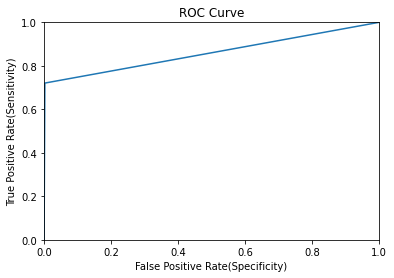

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(RF_SMOT_false_positive_rate, RF_SMOT_true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###### **AUC**

In [ ]:
RF_SMOT_roc_auc = auc(RF_SMOT_false_positive_rate, RF_SMOT_true_positive_rate)
RF_SMOT_roc_auc

0.8592317185897164

## **M4:BOOSTING**

### **Using OVERSAMPLING & UNDERSAMPLING model**

#### 1.GRADIENT BOOSTING METHOD (GBM)

In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
import scipy as sp
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import time
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn import preprocessing

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Fe_OUS_boost=GradientBoostingClassifier(n_estimators=300,learning_rate=0.1, verbose=1) 
##fitting the gradient boost classifier
start_time = time.time()
Fe_OUS_boost.fit(M2_Fe_OUS_X_train,M2_Fe_OUS_y_train)
print("Time taken by GBM "+ str((time.time() - start_time))+ " Seconds")

      Iter       Train Loss   Remaining Time 
         1           1.3659           10.01s
         2           1.3519            9.97s
         3           1.3406            9.97s
         4           1.3303            9.87s
         5           1.3215            9.81s
         6           1.3139           10.20s
         7           1.3073           10.12s
         8           1.3012           10.03s
         9           1.2943            9.93s
        10           1.2884            9.90s
        20           1.2465            9.41s
        30           1.2202            9.05s
        40           1.1967            8.71s
        50           1.1698            8.31s
        60           1.1503            7.93s
        70           1.1351            7.60s
        80           1.1154            7.24s
        90           1.1024            6.91s
       100           1.0868            6.58s
       200           0.9748            3.26s
       300           0.8860            0.00s
Time take

##### **GBM Results**

In [ ]:
#On Train Data
print("=====================\n On Train Data : \n=====================")
Fe_OUS_boost_predict_train=Fe_OUS_boost.predict(M2_Fe_OUS_X_train)

Fe_OUS_boost_cm1 = confusion_matrix(M2_Fe_OUS_y_train,Fe_OUS_boost_predict_train)
print("Confusion Matrix : \n", Fe_OUS_boost_cm1)
Fe_OUS_boost_total1 = sum(sum(Fe_OUS_boost_cm1))
Fe_OUS_boost_accuracy1 = (Fe_OUS_boost_cm1[0,0]+Fe_OUS_boost_cm1[1,1])/Fe_OUS_boost_total1
print("Accuracy\t: ", Fe_OUS_boost_accuracy1)
Fe_OUS_boost_sensitivity1 = Fe_OUS_boost_cm1[0,0]/(Fe_OUS_boost_cm1[0,0]+Fe_OUS_boost_cm1[0,1])
print('Sensitivity\t: ', Fe_OUS_boost_sensitivity1 )
Fe_OUS_boost_specificity1 = Fe_OUS_boost_cm1[1,1]/(Fe_OUS_boost_cm1[1,0]+Fe_OUS_boost_cm1[1,1])
print('Specificity\t: ', Fe_OUS_boost_specificity1)

#On Test Data
print("\n=====================\n On Test Data : \n=====================")
Fe_OUS_boost_predict_test=Fe_OUS_boost.predict(M2_Fe_OUS_X_test)

Fe_OUS_boost_cm2 = confusion_matrix(M2_Fe_OUS_y_test,Fe_OUS_boost_predict_test)
print("Confusion Matrix : \n", Fe_OUS_boost_cm2)
Fe_OUS_boost_total2 = sum(sum(Fe_OUS_boost_cm2))
Fe_OUS_boost_accuracy2 = (Fe_OUS_boost_cm2[0,0]+Fe_OUS_boost_cm2[1,1])/Fe_OUS_boost_total2
print("Accuracy\t: ", Fe_OUS_boost_accuracy2)
Fe_OUS_boost_sensitivity2 = Fe_OUS_boost_cm2[0,0]/(Fe_OUS_boost_cm2[0,0]+Fe_OUS_boost_cm2[0,1])
print('Sensitivity\t: ', Fe_OUS_boost_sensitivity2 )
Fe_OUS_boost_specificity2 = Fe_OUS_boost_cm2[1,1]/(Fe_OUS_boost_cm2[1,0]+Fe_OUS_boost_cm2[1,1])
print('Specificity\t: ', Fe_OUS_boost_specificity2)

#Difference
print("\n=====================\n Difference Data(%) : \n=====================")
print('Accuracy\t: ',(Fe_OUS_boost_accuracy1-Fe_OUS_boost_accuracy2)*100)
print('Sensitivity\t: ',(Fe_OUS_boost_sensitivity1-Fe_OUS_boost_sensitivity2)*100)
print('Specificity\t: ',(Fe_OUS_boost_specificity1-Fe_OUS_boost_specificity2)*100)


 On Train Data : 
Confusion Matrix : 
 [[11788  2551]
 [ 2356 10453]]
Accuracy	:  0.819250036835126
Sensitivity	:  0.8220935909059209
Specificity	:  0.8160668280115544

 On Test Data : 
Confusion Matrix : 
 [[2908  673]
 [ 630 2577]]
Accuracy	:  0.808043606364172
Sensitivity	:  0.8120636693660989
Specificity	:  0.80355472404116

 Difference Data(%) : 
Accuracy	:  1.1206430470953932
Sensitivity	:  1.0029921539822073
Specificity	:  1.2512103970394373


#### **Applying Original Data to MODEL**

In [ ]:
#####Create the confusion matrix
##########Tree Validation
#Tree Validation
Fe_OUS_boost_predictions = Fe_OUS_boost.predict(M2_Fe_X)

Fe_OUS_boost_threshold=0.5
Fe_OUS_boost_predicted_class1=[ 0 if x < Fe_OUS_boost_threshold else 1 for x in Fe_OUS_boost_predictions]

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
Fe_OUS_boost_cm1 = confusion_matrix(M2_Fe_y, Fe_OUS_boost_predicted_class1)
print('Confusion Matrix : \n', Fe_OUS_boost_cm1)

Fe_OUS_boost_total1=sum(sum(Fe_OUS_boost_cm1))
#####from confusion matrix calculate accuracy
Fe_OUS_boost_accuracy1=(Fe_OUS_boost_cm1[0,0]+Fe_OUS_boost_cm1[1,1])/Fe_OUS_boost_total1
print ('Accuracy\t: ', Fe_OUS_boost_accuracy1)

Fe_OUS_boost_sensitivity1 = Fe_OUS_boost_cm1[0,0]/(Fe_OUS_boost_cm1[0,0]+Fe_OUS_boost_cm1[0,1])
print('Sensitivity\t: ', Fe_OUS_boost_sensitivity1 )

Fe_OUS_boost_specificity1 = Fe_OUS_boost_cm1[1,1]/(Fe_OUS_boost_cm1[1,0]+Fe_OUS_boost_cm1[1,1])
print('Specificity\t: ', Fe_OUS_boost_specificity1)

Confusion Matrix : 
 [[29277  6564]
 [  119   497]]
Accuracy	:  0.8166881531667444
Sensitivity	:  0.8168577885661672
Specificity	:  0.8068181818181818


###### **Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
Fe_OUS_boost_accuracy1=(Fe_OUS_boost_cm1[0,0]+Fe_OUS_boost_cm1[1,1])/Fe_OUS_boost_total1
print ('Accuracy\t: ', Fe_OUS_boost_accuracy1)

Fe_OUS_boost_Precision_Class0 = Fe_OUS_boost_cm1[0,0]/(Fe_OUS_boost_cm1[0,0]+Fe_OUS_boost_cm1[1,0])
print('Precision_Class0: ', Fe_OUS_boost_Precision_Class0 )

Fe_OUS_boost_Recall_Class0 = Fe_OUS_boost_cm1[0,0]/(Fe_OUS_boost_cm1[0,0]+Fe_OUS_boost_cm1[0,1])
print('Recall_Class0\t: ', Fe_OUS_boost_Recall_Class0 )

Fe_OUS_boost_F1_Class0 = 2/((1/Fe_OUS_boost_Precision_Class0)+(1/Fe_OUS_boost_Recall_Class0))
print('F1_Class0\t: ', Fe_OUS_boost_F1_Class0 )


Fe_OUS_boost_Precision_Class1 = Fe_OUS_boost_cm1[1,1]/(Fe_OUS_boost_cm1[0,1]+Fe_OUS_boost_cm1[1,1])
print('Precision_Class1: ', Fe_OUS_boost_Precision_Class1 )

Fe_OUS_boost_Recall_Class1 = Fe_OUS_boost_cm1[1,1]/(Fe_OUS_boost_cm1[1,0]+Fe_OUS_boost_cm1[1,1])
print('Recall_Class1\t: ', Fe_OUS_boost_Recall_Class1 )

Fe_OUS_boost_F1_Class1 = 2/((1/Fe_OUS_boost_Precision_Class1)+(1/Fe_OUS_boost_Recall_Class1))
print('F1_Class1\t: ', Fe_OUS_boost_F1_Class1 )

Accuracy	:  0.8166881531667444
Precision_Class0:  0.995951830180977
Recall_Class0	:  0.8168577885661672
F1_Class0	:  0.8975581341876543
Precision_Class1:  0.07038663078884011
Recall_Class1	:  0.8068181818181818
F1_Class1	:  0.1294776605444835


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(M2_Fe_y,Fe_OUS_boost_predicted_class1))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90     35841
           1       0.07      0.81      0.13       616

    accuracy                           0.82     36457
   macro avg       0.53      0.81      0.51     36457
weighted avg       0.98      0.82      0.88     36457



###### **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

Fe_OUS_boost_actual = feature_engineer_data["Target"]
Fe_OUS_boost_false_positive_rate, Fe_OUS_boost_true_positive_rate, Fe_OUS_boost_thresholds = roc_curve(Fe_OUS_boost_actual, Fe_OUS_boost_predictions)
print("false_positive_rate", Fe_OUS_boost_false_positive_rate)
print("true_positive_rate", Fe_OUS_boost_true_positive_rate)
print("thresholds", Fe_OUS_boost_thresholds)

false_positive_rate [0.         0.18314221 1.        ]
true_positive_rate [0.         0.80681818 1.        ]
thresholds [2 1 0]


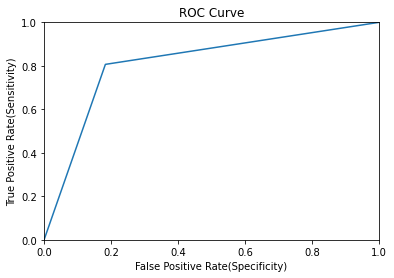

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(Fe_OUS_boost_false_positive_rate, Fe_OUS_boost_true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###### **AUC**

In [ ]:
Fe_OUS_boost_roc_auc = auc(Fe_OUS_boost_false_positive_rate, Fe_OUS_boost_true_positive_rate)
Fe_OUS_boost_roc_auc

0.8118379851921744

#### 2.XGB Model

In [ ]:
#Creating XGB Friendly data and matrices
Fe_OUS_train_labels = M2_Fe_OUS_y_train.values
Fe_OUS_train_labels = preprocessing.LabelEncoder().fit_transform(Fe_OUS_train_labels)
Fe_OUS_test_labels = M2_Fe_OUS_y_test.values
Fe_OUS_test_labels = preprocessing.LabelEncoder().fit_transform(Fe_OUS_test_labels)

Fe_OUS_matrix_train = xgboost.DMatrix(M2_Fe_OUS_X_train,label=Fe_OUS_train_labels)
Fe_OUS_matrix_test = xgboost.DMatrix(M2_Fe_OUS_X_test,label=Fe_OUS_test_labels)

In [ ]:
params = {
    'max_depth': 8, 
    'eta':0.1, #Learning Rate
    'eval_metric':'merror', # Multiclass classification error rate. 
    # 'tree_method' : "gpu_hist", # use this with colab in gpu mode for faster training
    'num_class': 9
}

start_time = time.time()

Fe_OUS_model=xgboost.train(params=params,
                    dtrain=Fe_OUS_matrix_train,
                    num_boost_round=1000,    #Number of trees
                    early_stopping_rounds=4, # Stop after 4 rounds, if test error doesn't improve. 
                    evals=[(Fe_OUS_matrix_test,'test')] 
                   )

print("Time taken by XGB "+ str((time.time() - start_time))+ " Seconds")

[0]	test-merror:0.259281
Will train until test-merror hasn't improved in 4 rounds.
[1]	test-merror:0.223041
[2]	test-merror:0.209782
[3]	test-merror:0.205362
[4]	test-merror:0.192251
[5]	test-merror:0.182086
[6]	test-merror:0.174278
[7]	test-merror:0.169269
[8]	test-merror:0.166323
[9]	test-merror:0.15881
[10]	test-merror:0.155569
[11]	test-merror:0.155569
[12]	test-merror:0.152475
[13]	test-merror:0.149381
[14]	test-merror:0.144078
[15]	test-merror:0.139511
[16]	test-merror:0.132145
[17]	test-merror:0.130672
[18]	test-merror:0.122864
[19]	test-merror:0.120065
[20]	test-merror:0.117266
[21]	test-merror:0.113435
[22]	test-merror:0.110342
[23]	test-merror:0.110636
[24]	test-merror:0.102976
[25]	test-merror:0.101355
[26]	test-merror:0.099588
[27]	test-merror:0.099735
[28]	test-merror:0.099293
[29]	test-merror:0.099293
[30]	test-merror:0.098851
[31]	test-merror:0.097083
[32]	test-merror:0.094579
[33]	test-merror:0.094579
[34]	test-merror:0.090306
[35]	test-merror:0.088244
[36]	test-merror:

##### XGB Results

In [ ]:
#On Train Data
print("=====================\n On Train Data : \n=====================")
Fe_OUS_XGB_predict_train=Fe_OUS_model.predict(Fe_OUS_matrix_train)
Fe_OUS_XGB_cm1 = confusion_matrix(Fe_OUS_train_labels,Fe_OUS_XGB_predict_train)

print("Confusion Matrix : \n", Fe_OUS_XGB_cm1)
Fe_OUS_XGB_total1 = sum(sum(Fe_OUS_XGB_cm1))
Fe_OUS_XGB_accuracy1 = (Fe_OUS_XGB_cm1[0,0]+Fe_OUS_XGB_cm1[1,1])/Fe_OUS_XGB_total1
print("Accuracy\t: ", Fe_OUS_XGB_accuracy1)
Fe_OUS_XGB_sensitivity1 = Fe_OUS_XGB_cm1[0,0]/(Fe_OUS_XGB_cm1[0,0]+Fe_OUS_XGB_cm1[0,1])
print('Sensitivity\t: ', Fe_OUS_XGB_sensitivity1 )
Fe_OUS_XGB_specificity1 = Fe_OUS_XGB_cm1[1,1]/(Fe_OUS_XGB_cm1[1,0]+Fe_OUS_XGB_cm1[1,1])
print('Specificity\t: ', Fe_OUS_XGB_specificity1)

#On Test Data
print("\n=====================\n On Test Data : \n=====================")
Fe_OUS_XGB_predict_test=Fe_OUS_model.predict(Fe_OUS_matrix_test)
Fe_OUS_XGB_cm2 = confusion_matrix(Fe_OUS_test_labels,Fe_OUS_XGB_predict_test)

print("Confusion Matrix : \n", Fe_OUS_XGB_cm2)
Fe_OUS_XGB_total2 = sum(sum(Fe_OUS_XGB_cm2))
Fe_OUS_XGB_accuracy2 = (Fe_OUS_XGB_cm2[0,0]+Fe_OUS_XGB_cm2[1,1])/Fe_OUS_XGB_total2
print("Accuracy\t: ", Fe_OUS_XGB_accuracy2)
Fe_OUS_XGB_sensitivity2 = Fe_OUS_XGB_cm2[0,0]/(Fe_OUS_XGB_cm2[0,0]+Fe_OUS_XGB_cm2[0,1])
print('Sensitivity\t: ', Fe_OUS_XGB_sensitivity2 )
Fe_OUS_XGB_specificity2 = Fe_OUS_XGB_cm2[1,1]/(Fe_OUS_XGB_cm2[1,0]+Fe_OUS_XGB_cm2[1,1])
print('Specificity\t: ', Fe_OUS_XGB_specificity2)

#Difference
print("\n=====================\n Difference Data(%) : \n=====================")
print('Accuracy\t: ',(Fe_OUS_XGB_accuracy1-Fe_OUS_XGB_accuracy2)*100)
print('Sensitivity\t: ',(Fe_OUS_XGB_sensitivity1-Fe_OUS_XGB_sensitivity2)*100)
print('Specificity\t: ',(Fe_OUS_XGB_specificity1-Fe_OUS_XGB_specificity2)*100)


 On Train Data : 
Confusion Matrix : 
 [[13306  1033]
 [  517 12292]]
Accuracy	:  0.9429055547369972
Sensitivity	:  0.927958713996792
Specificity	:  0.9596377547037239

 On Test Data : 
Confusion Matrix : 
 [[3268  313]
 [ 130 3077]]
Accuracy	:  0.9347377725397761
Sensitivity	:  0.9125942474169226
Specificity	:  0.9594636732148425

 Difference Data(%) : 
Accuracy	:  0.8167782197221141
Sensitivity	:  1.536446657986934
Specificity	:  0.017408148888142794


#### **Applying Original Data to MODEL**

In [ ]:
#Creating XGB Friendly data and matrices
M2_Fe_test_labels = M2_Fe_y_test.values
M2_Fe_test_labels = preprocessing.LabelEncoder().fit_transform(M2_Fe_test_labels)


M2_Fe_matrix = xgboost.DMatrix(M2_Fe_X,label=M2_Fe_test_labels)

In [ ]:
#####Create the confusion matrix
##########Tree Validation
#Tree Validation
Fe_OUS_XGB_predictions = Fe_OUS_model.predict(M2_Fe_matrix)

Fe_OUS_XGB_threshold=0.5
Fe_OUS_XGB_predicted_class1=[ 0 if x < Fe_OUS_XGB_threshold else 1 for x in Fe_OUS_XGB_predictions]

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
Fe_OUS_XGB_cm1 = confusion_matrix(M2_Fe_y, Fe_OUS_XGB_predicted_class1)
print('Confusion Matrix : \n', Fe_OUS_XGB_cm1)

Fe_OUS_XGB_total1=sum(sum(Fe_OUS_XGB_cm1))
#####from confusion matrix calculate accuracy
Fe_OUS_XGB_accuracy1=(Fe_OUS_XGB_cm1[0,0]+Fe_OUS_XGB_cm1[1,1])/Fe_OUS_XGB_total1
print ('Accuracy\t: ', Fe_OUS_XGB_accuracy1)

Fe_OUS_XGB_sensitivity1 = Fe_OUS_XGB_cm1[0,0]/(Fe_OUS_XGB_cm1[0,0]+Fe_OUS_XGB_cm1[0,1])
print('Sensitivity\t: ', Fe_OUS_XGB_sensitivity1 )

Fe_OUS_XGB_specificity1 = Fe_OUS_XGB_cm1[1,1]/(Fe_OUS_XGB_cm1[1,0]+Fe_OUS_XGB_cm1[1,1])
print('Specificity\t: ', Fe_OUS_XGB_specificity1)

Confusion Matrix : 
 [[32915  2926]
 [   27   589]]
Accuracy	:  0.9190004663027677
Sensitivity	:  0.9183616528556681
Specificity	:  0.9561688311688312


###### **Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
Fe_OUS_XGB_accuracy1=(Fe_OUS_XGB_cm1[0,0]+Fe_OUS_XGB_cm1[1,1])/Fe_OUS_XGB_total1
print ('Accuracy\t: ', Fe_OUS_XGB_accuracy1)

Fe_OUS_XGB_Precision_Class0 = Fe_OUS_XGB_cm1[0,0]/(Fe_OUS_XGB_cm1[0,0]+Fe_OUS_XGB_cm1[1,0])
print('Precision_Class0: ', Fe_OUS_XGB_Precision_Class0 )

Fe_OUS_XGB_Recall_Class0 = Fe_OUS_XGB_cm1[0,0]/(Fe_OUS_XGB_cm1[0,0]+Fe_OUS_XGB_cm1[0,1])
print('Recall_Class0\t: ', Fe_OUS_XGB_Recall_Class0 )

Fe_OUS_XGB_F1_Class0 = 2/((1/Fe_OUS_XGB_Precision_Class0)+(1/Fe_OUS_XGB_Recall_Class0))
print('F1_Class0\t: ', Fe_OUS_XGB_F1_Class0 )


Fe_OUS_XGB_Precision_Class1 = Fe_OUS_XGB_cm1[1,1]/(Fe_OUS_XGB_cm1[0,1]+Fe_OUS_XGB_cm1[1,1])
print('Precision_Class1: ', Fe_OUS_XGB_Precision_Class1 )

Fe_OUS_XGB_Recall_Class1 = Fe_OUS_XGB_cm1[1,1]/(Fe_OUS_XGB_cm1[1,0]+Fe_OUS_XGB_cm1[1,1])
print('Recall_Class1\t: ', Fe_OUS_XGB_Recall_Class1 )

Fe_OUS_XGB_F1_Class1 = 2/((1/Fe_OUS_XGB_Precision_Class1)+(1/Fe_OUS_XGB_Recall_Class1))
print('F1_Class1\t: ', Fe_OUS_XGB_F1_Class1 )

Accuracy	:  0.9190004663027677
Precision_Class0:  0.9991803776334163
Recall_Class0	:  0.9183616528556681
F1_Class0	:  0.9570678801448033
Precision_Class1:  0.16756756756756758
Recall_Class1	:  0.9561688311688312
F1_Class1	:  0.28516097797143547


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(M2_Fe_y,Fe_OUS_XGB_predicted_class1))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     35841
           1       0.17      0.96      0.29       616

    accuracy                           0.92     36457
   macro avg       0.58      0.94      0.62     36457
weighted avg       0.99      0.92      0.95     36457



###### **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

Fe_OUS_XGB_actual = feature_engineer_data["Target"]
Fe_OUS_XGB_false_positive_rate, Fe_OUS_XGB_true_positive_rate, Fe_OUS_XGB_thresholds = roc_curve(Fe_OUS_XGB_actual, Fe_OUS_XGB_predictions)
print("false_positive_rate", Fe_OUS_XGB_false_positive_rate)
print("true_positive_rate", Fe_OUS_XGB_true_positive_rate)
print("thresholds", Fe_OUS_XGB_thresholds)

false_positive_rate [0.         0.08163835 1.        ]
true_positive_rate [0.         0.95616883 1.        ]
thresholds [2. 1. 0.]


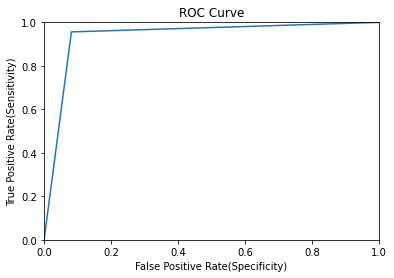

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(Fe_OUS_XGB_false_positive_rate, Fe_OUS_XGB_true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###### **AUC**

In [ ]:
Fe_OUS_XGB_roc_auc = auc(Fe_OUS_XGB_false_positive_rate, Fe_OUS_XGB_true_positive_rate)
Fe_OUS_XGB_roc_auc

0.9372652420122496

### **Using SMOTE DT Oversampling**

##### 1.GRADIENT BOOSTING METHOD (GBM)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Fe_SMOT_boost=GradientBoostingClassifier(n_estimators=400,learning_rate=0.1, verbose=1) 
##fitting the gradient boost classifier
start_time = time.time()
Fe_SMOT_boost.fit(M2_Fe_SMOT_X_train,M2_Fe_SMOT_y_train)
print("Time taken by GBM "+ str((time.time() - start_time))+ " Seconds")

      Iter       Train Loss   Remaining Time 
         1           1.2849           24.12s
         2           1.2541           23.32s
         3           1.2220           23.26s
         4           1.1989           23.24s
         5           1.1749           23.95s
         6           1.1521           23.72s
         7           1.1198           23.60s
         8           1.0949           23.53s
         9           1.0735           23.35s
        10           1.0579           23.21s
        20           0.8887           22.16s
        30           0.7860           21.64s
        40           0.7176           20.90s
        50           0.6595           20.38s
        60           0.6235           19.80s
        70           0.5959           19.08s
        80           0.5634           18.42s
        90           0.5406           17.76s
       100           0.5210           17.15s
       200           0.3907           11.28s
       300           0.3218            5.65s
       40

##### **GBM Results**

In [ ]:
#On Train Data
print("=====================\n On Train Data : \n=====================")
Fe_SMOT_boost_predict_train=Fe_SMOT_boost.predict(M2_Fe_SMOT_X_train)

Fe_SMOT_boost_cm1 = confusion_matrix(M2_Fe_SMOT_y_train,Fe_SMOT_boost_predict_train)
print("Confusion Matrix : \n", Fe_SMOT_boost_cm1)
Fe_SMOT_boost_total1 = sum(sum(Fe_SMOT_boost_cm1))
Fe_SMOT_boost_accuracy1 = (Fe_SMOT_boost_cm1[0,0]+Fe_SMOT_boost_cm1[1,1])/Fe_SMOT_boost_total1
print("Accuracy\t: ", Fe_SMOT_boost_accuracy1)
Fe_SMOT_boost_sensitivity1 = Fe_SMOT_boost_cm1[0,0]/(Fe_SMOT_boost_cm1[0,0]+Fe_SMOT_boost_cm1[0,1])
print('Sensitivity\t: ', Fe_SMOT_boost_sensitivity1 )
Fe_SMOT_boost_specificity1 = Fe_SMOT_boost_cm1[1,1]/(Fe_SMOT_boost_cm1[1,0]+Fe_SMOT_boost_cm1[1,1])
print('Specificity\t: ', Fe_SMOT_boost_specificity1)

#On Test Data
print("\n=====================\n On Test Data : \n=====================")
Fe_SMOT_boost_predict_test=Fe_SMOT_boost.predict(M2_Fe_SMOT_X_test)

Fe_SMOT_boost_cm2 = confusion_matrix(M2_Fe_SMOT_y_test,Fe_SMOT_boost_predict_test)
print("Confusion Matrix : \n", Fe_SMOT_boost_cm2)
Fe_SMOT_boost_total2 = sum(sum(Fe_SMOT_boost_cm2))
Fe_SMOT_boost_accuracy2 = (Fe_SMOT_boost_cm2[0,0]+Fe_SMOT_boost_cm2[1,1])/Fe_SMOT_boost_total2
print("Accuracy\t: ", Fe_SMOT_boost_accuracy2)
Fe_SMOT_boost_sensitivity2 = Fe_SMOT_boost_cm2[0,0]/(Fe_SMOT_boost_cm2[0,0]+Fe_SMOT_boost_cm2[0,1])
print('Sensitivity\t: ', Fe_SMOT_boost_sensitivity2 )
Fe_SMOT_boost_specificity2 = Fe_SMOT_boost_cm2[1,1]/(Fe_SMOT_boost_cm2[1,0]+Fe_SMOT_boost_cm2[1,1])
print('Specificity\t: ', Fe_SMOT_boost_specificity2)

#Difference
print("\n=====================\n Difference Data(%) : \n=====================")
print('Accuracy\t: ',(Fe_SMOT_boost_accuracy1-Fe_SMOT_boost_accuracy2)*100)
print('Sensitivity\t: ',(Fe_SMOT_boost_sensitivity1-Fe_SMOT_boost_sensitivity2)*100)
print('Specificity\t: ',(Fe_SMOT_boost_specificity1-Fe_SMOT_boost_specificity2)*100)


 On Train Data : 
Confusion Matrix : 
 [[28641    89]
 [ 1648 15498]]
Accuracy	:  0.9621370651320952
Sensitivity	:  0.9969021928297946
Specificity	:  0.9038842878805552

 On Test Data : 
Confusion Matrix : 
 [[7082   29]
 [ 422 3936]]
Accuracy	:  0.9606766065044904
Sensitivity	:  0.9959218112783013
Specificity	:  0.9031665901789812

 Difference Data(%) : 
Accuracy	:  0.14604586276047993
Sensitivity	:  0.09803815514933811
Specificity	:  0.07176977015740382


##### **Applying Original Data to MODEL**

In [ ]:
#####Create the confusion matrix
##########Tree Validation
#Tree Validation
Fe_SMOT_boost_predictions = Fe_SMOT_boost.predict(M2_Fe_X)

Fe_SMOT_boost_threshold=0.5
Fe_SMOT_boost_predicted_class1=[ 0 if x < Fe_SMOT_boost_threshold else 1 for x in Fe_SMOT_boost_predictions]

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
Fe_SMOT_boost_cm1 = confusion_matrix(M2_Fe_y, Fe_SMOT_boost_predicted_class1)
print('Confusion Matrix : \n', Fe_SMOT_boost_cm1)

Fe_SMOT_boost_total1=sum(sum(Fe_SMOT_boost_cm1))
#####from confusion matrix calculate accuracy
Fe_SMOT_boost_accuracy1=(Fe_SMOT_boost_cm1[0,0]+Fe_SMOT_boost_cm1[1,1])/Fe_SMOT_boost_total1
print ('Accuracy\t: ', Fe_SMOT_boost_accuracy1)

Fe_SMOT_boost_sensitivity1 = Fe_SMOT_boost_cm1[0,0]/(Fe_SMOT_boost_cm1[0,0]+Fe_SMOT_boost_cm1[0,1])
print('Sensitivity\t: ', Fe_SMOT_boost_sensitivity1 )

Fe_SMOT_boost_specificity1 = Fe_SMOT_boost_cm1[1,1]/(Fe_SMOT_boost_cm1[1,0]+Fe_SMOT_boost_cm1[1,1])
print('Specificity\t: ', Fe_SMOT_boost_specificity1)

Confusion Matrix : 
 [[35723   118]
 [  498   118]]
Accuracy	:  0.9831033820665441
Sensitivity	:  0.9967076811472895
Specificity	:  0.19155844155844157


###### **Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
Fe_SMOT_boost_accuracy1=(Fe_SMOT_boost_cm1[0,0]+Fe_SMOT_boost_cm1[1,1])/Fe_SMOT_boost_total1
print ('Accuracy\t: ', Fe_SMOT_boost_accuracy1)

Fe_SMOT_boost_Precision_Class0 = Fe_SMOT_boost_cm1[0,0]/(Fe_SMOT_boost_cm1[0,0]+Fe_SMOT_boost_cm1[1,0])
print('Precision_Class0: ', Fe_SMOT_boost_Precision_Class0 )

Fe_SMOT_boost_Recall_Class0 = Fe_SMOT_boost_cm1[0,0]/(Fe_SMOT_boost_cm1[0,0]+Fe_SMOT_boost_cm1[0,1])
print('Recall_Class0\t: ', Fe_SMOT_boost_Recall_Class0 )

Fe_SMOT_boost_F1_Class0 = 2/((1/Fe_SMOT_boost_Precision_Class0)+(1/Fe_SMOT_boost_Recall_Class0))
print('F1_Class0\t: ', Fe_SMOT_boost_F1_Class0 )


Fe_SMOT_boost_Precision_Class1 = Fe_SMOT_boost_cm1[1,1]/(Fe_SMOT_boost_cm1[0,1]+Fe_SMOT_boost_cm1[1,1])
print('Precision_Class1: ', Fe_SMOT_boost_Precision_Class1 )

Fe_SMOT_boost_Recall_Class1 = Fe_SMOT_boost_cm1[1,1]/(Fe_SMOT_boost_cm1[1,0]+Fe_SMOT_boost_cm1[1,1])
print('Recall_Class1\t: ', Fe_SMOT_boost_Recall_Class1 )

Fe_SMOT_boost_F1_Class1 = 2/((1/Fe_SMOT_boost_Precision_Class1)+(1/Fe_SMOT_boost_Recall_Class1))
print('F1_Class1\t: ', Fe_SMOT_boost_F1_Class1 )

Accuracy	:  0.9831033820665441
Precision_Class0:  0.9862510698213743
Recall_Class0	:  0.9967076811472895
F1_Class0	:  0.9914518053898032
Precision_Class1:  0.5
Recall_Class1	:  0.19155844155844157
F1_Class1	:  0.27699530516431925


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(M2_Fe_y,Fe_SMOT_boost_predicted_class1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     35841
           1       0.50      0.19      0.28       616

    accuracy                           0.98     36457
   macro avg       0.74      0.59      0.63     36457
weighted avg       0.98      0.98      0.98     36457



###### **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

Fe_SMOT_boost_actual = feature_engineer_data["Target"]
Fe_SMOT_boost_false_positive_rate, Fe_SMOT_boost_true_positive_rate, Fe_SMOT_boost_thresholds = roc_curve(Fe_SMOT_boost_actual, Fe_SMOT_boost_predictions)
print("false_positive_rate", Fe_SMOT_boost_false_positive_rate)
print("true_positive_rate", Fe_SMOT_boost_true_positive_rate)
print("thresholds", Fe_SMOT_boost_thresholds)

false_positive_rate [0.         0.00329232 1.        ]
true_positive_rate [0.         0.19155844 1.        ]
thresholds [2 1 0]


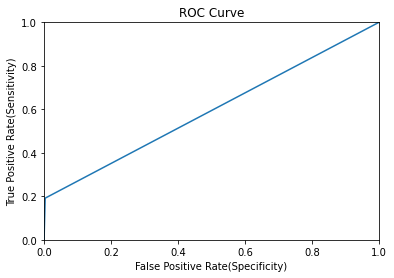

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(Fe_SMOT_boost_false_positive_rate, Fe_SMOT_boost_true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###### **AUC**

In [ ]:
Fe_SMOT_boost_roc_auc = auc(Fe_SMOT_boost_false_positive_rate, Fe_SMOT_boost_true_positive_rate)
Fe_SMOT_boost_roc_auc

0.5941330613528655

##### 2.XGB Model

In [ ]:
#Creating XGB Friendly data and matrices
Fe_SMOT_train_labels = M2_Fe_SMOT_y_train.values
Fe_SMOT_train_labels = preprocessing.LabelEncoder().fit_transform(Fe_SMOT_train_labels)
Fe_SMOT_test_labels = M2_Fe_SMOT_y_test.values
Fe_SMOT_test_labels = preprocessing.LabelEncoder().fit_transform(Fe_SMOT_test_labels)

Fe_SMOT_matrix_train = xgboost.DMatrix(M2_Fe_SMOT_X_train,label=Fe_SMOT_train_labels)
Fe_SMOT_matrix_test = xgboost.DMatrix(M2_Fe_SMOT_X_test,label=Fe_SMOT_test_labels)

In [ ]:
params = {
    'max_depth': 8, 
    'eta':0.1, #Learning Rate
    'eval_metric':'merror', # Multiclass classification error rate. 
    # 'tree_method' : "gpu_hist", # use this with colab in gpu mode for faster training
    'num_class': 9
}

start_time = time.time()

Fe_SMOT_model=xgboost.train(params=params,
                    dtrain=Fe_SMOT_matrix_train,
                    num_boost_round=1000,    #Number of trees
                    early_stopping_rounds=4, # Stop after 4 rounds, if test error doesn't improve. 
                    evals=[(Fe_SMOT_matrix_test,'test')] 
                   )

print("Time taken by XGB "+ str((time.time() - start_time))+ " Seconds")

[0]	test-merror:0.108902
Will train until test-merror hasn't improved in 4 rounds.
[1]	test-merror:0.093644
[2]	test-merror:0.080739
[3]	test-merror:0.065306
[4]	test-merror:0.06086
[5]	test-merror:0.055541
[6]	test-merror:0.05031
[7]	test-merror:0.048566
[8]	test-merror:0.046735
[9]	test-merror:0.046037
[10]	test-merror:0.04377
[11]	test-merror:0.042549
[12]	test-merror:0.041852
[13]	test-merror:0.040457
[14]	test-merror:0.039759
[15]	test-merror:0.040195
[16]	test-merror:0.038539
[17]	test-merror:0.037144
[18]	test-merror:0.036708
[19]	test-merror:0.03662
[20]	test-merror:0.036359
[21]	test-merror:0.035749
[22]	test-merror:0.035574
[23]	test-merror:0.035225
[24]	test-merror:0.034528
[25]	test-merror:0.033307
[26]	test-merror:0.032958
[27]	test-merror:0.03261
[28]	test-merror:0.031912
[29]	test-merror:0.030953
[30]	test-merror:0.030779
[31]	test-merror:0.030517
[32]	test-merror:0.02982
[33]	test-merror:0.029471
[34]	test-merror:0.029384
[35]	test-merror:0.029209
[36]	test-merror:0.029

##### XGB Results

In [ ]:
#On Train Data
print("=====================\n On Train Data : \n=====================")
Fe_SMOT_XGB_predict_train=Fe_SMOT_model.predict(Fe_SMOT_matrix_train)
Fe_SMOT_XGB_cm1 = confusion_matrix(Fe_SMOT_train_labels,Fe_SMOT_XGB_predict_train)

print("Confusion Matrix : \n", Fe_SMOT_XGB_cm1)
Fe_SMOT_XGB_total1 = sum(sum(Fe_SMOT_XGB_cm1))
Fe_SMOT_XGB_accuracy1 = (Fe_SMOT_XGB_cm1[0,0]+Fe_SMOT_XGB_cm1[1,1])/Fe_SMOT_XGB_total1
print("Accuracy\t: ", Fe_SMOT_XGB_accuracy1)
Fe_SMOT_XGB_sensitivity1 = Fe_SMOT_XGB_cm1[0,0]/(Fe_SMOT_XGB_cm1[0,0]+Fe_SMOT_XGB_cm1[0,1])
print('Sensitivity\t: ', Fe_SMOT_XGB_sensitivity1 )
Fe_SMOT_XGB_specificity1 = Fe_SMOT_XGB_cm1[1,1]/(Fe_SMOT_XGB_cm1[1,0]+Fe_SMOT_XGB_cm1[1,1])
print('Specificity\t: ', Fe_SMOT_XGB_specificity1)

#On Test Data
print("\n=====================\n On Test Data : \n=====================")
Fe_SMOT_XGB_predict_test=Fe_SMOT_model.predict(Fe_SMOT_matrix_test)
Fe_SMOT_XGB_cm2 = confusion_matrix(Fe_SMOT_test_labels,Fe_SMOT_XGB_predict_test)

print("Confusion Matrix : \n", Fe_SMOT_XGB_cm2)
Fe_SMOT_XGB_total2 = sum(sum(Fe_SMOT_XGB_cm2))
Fe_SMOT_XGB_accuracy2 = (Fe_SMOT_XGB_cm2[0,0]+Fe_SMOT_XGB_cm2[1,1])/Fe_SMOT_XGB_total2
print("Accuracy\t: ", Fe_SMOT_XGB_accuracy2)
Fe_SMOT_XGB_sensitivity2 = Fe_SMOT_XGB_cm2[0,0]/(Fe_SMOT_XGB_cm2[0,0]+Fe_SMOT_XGB_cm2[0,1])
print('Sensitivity\t: ', Fe_SMOT_XGB_sensitivity2 )
Fe_SMOT_XGB_specificity2 = Fe_SMOT_XGB_cm2[1,1]/(Fe_SMOT_XGB_cm2[1,0]+Fe_SMOT_XGB_cm2[1,1])
print('Specificity\t: ', Fe_SMOT_XGB_specificity2)

#Difference
print("\n=====================\n Difference Data(%) : \n=====================")
print('Accuracy\t: ',(Fe_SMOT_XGB_accuracy1-Fe_SMOT_XGB_accuracy2)*100)
print('Sensitivity\t: ',(Fe_SMOT_XGB_sensitivity1-Fe_SMOT_XGB_sensitivity2)*100)
print('Specificity\t: ',(Fe_SMOT_XGB_specificity1-Fe_SMOT_XGB_specificity2)*100)


 On Train Data : 
Confusion Matrix : 
 [[28605   125]
 [  743 16403]]
Accuracy	:  0.9810794315110297
Sensitivity	:  0.9956491472328577
Specificity	:  0.956666277849061

 On Test Data : 
Confusion Matrix : 
 [[7073   38]
 [ 214 4144]]
Accuracy	:  0.9780277269160346
Sensitivity	:  0.9946561665026016
Specificity	:  0.9508949059201468

 Difference Data(%) : 
Accuracy	:  0.30517045949951527
Sensitivity	:  0.099298073025611
Specificity	:  0.5771371928914193


##### **Applying Original Data to MODEL**

In [ ]:
#Creating XGB Friendly data and matrices
M2_Fe_test_labels = M2_Fe_y_test.values
M2_Fe_test_labels = preprocessing.LabelEncoder().fit_transform(M2_Fe_test_labels)


M2_Fe_matrix = xgboost.DMatrix(M2_Fe_X,label=M2_Fe_test_labels)

In [ ]:
#####Create the confusion matrix
##########Tree Validation
#Tree Validation
Fe_SMOT_XGB_predictions = Fe_SMOT_model.predict(M2_Fe_matrix)

Fe_SMOT_XGB_threshold=0.5
Fe_SMOT_XGB_predicted_class1=[ 0 if x < Fe_SMOT_XGB_threshold else 1 for x in Fe_SMOT_XGB_predictions]

from sklearn.metrics import confusion_matrix ###for using confusion matrix###
Fe_SMOT_XGB_cm1 = confusion_matrix(M2_Fe_y, Fe_SMOT_XGB_predicted_class1)
print('Confusion Matrix : \n', Fe_SMOT_XGB_cm1)

Fe_SMOT_XGB_total1=sum(sum(Fe_SMOT_XGB_cm1))
#####from confusion matrix calculate accuracy
Fe_SMOT_XGB_accuracy1=(Fe_SMOT_XGB_cm1[0,0]+Fe_SMOT_XGB_cm1[1,1])/Fe_SMOT_XGB_total1
print ('Accuracy\t: ', Fe_SMOT_XGB_accuracy1)

Fe_SMOT_XGB_sensitivity1 = Fe_SMOT_XGB_cm1[0,0]/(Fe_SMOT_XGB_cm1[0,0]+Fe_SMOT_XGB_cm1[0,1])
print('Sensitivity\t: ', Fe_SMOT_XGB_sensitivity1 )

Fe_SMOT_XGB_specificity1 = Fe_SMOT_XGB_cm1[1,1]/(Fe_SMOT_XGB_cm1[1,0]+Fe_SMOT_XGB_cm1[1,1])
print('Specificity\t: ', Fe_SMOT_XGB_specificity1)

Confusion Matrix : 
 [[35678   163]
 [  365   251]]
Accuracy	:  0.9855171846284664
Sensitivity	:  0.9954521358221031
Specificity	:  0.4074675324675325


###### **Precision, Recall and F1-Score**

In [ ]:
#####from confusion matrix calculate accuracy
Fe_SMOT_XGB_accuracy1=(Fe_SMOT_XGB_cm1[0,0]+Fe_SMOT_XGB_cm1[1,1])/Fe_SMOT_XGB_total1
print ('Accuracy\t: ', Fe_SMOT_XGB_accuracy1)

Fe_SMOT_XGB_Precision_Class0 = Fe_SMOT_XGB_cm1[0,0]/(Fe_SMOT_XGB_cm1[0,0]+Fe_SMOT_XGB_cm1[1,0])
print('Precision_Class0: ', Fe_SMOT_XGB_Precision_Class0 )

Fe_SMOT_XGB_Recall_Class0 = Fe_SMOT_XGB_cm1[0,0]/(Fe_SMOT_XGB_cm1[0,0]+Fe_SMOT_XGB_cm1[0,1])
print('Recall_Class0\t: ', Fe_SMOT_XGB_Recall_Class0 )

Fe_SMOT_XGB_F1_Class0 = 2/((1/Fe_SMOT_XGB_Precision_Class0)+(1/Fe_SMOT_XGB_Recall_Class0))
print('F1_Class0\t: ', Fe_SMOT_XGB_F1_Class0 )


Fe_SMOT_XGB_Precision_Class1 = Fe_SMOT_XGB_cm1[1,1]/(Fe_SMOT_XGB_cm1[0,1]+Fe_SMOT_XGB_cm1[1,1])
print('Precision_Class1: ', Fe_SMOT_XGB_Precision_Class1 )

Fe_SMOT_XGB_Recall_Class1 = Fe_SMOT_XGB_cm1[1,1]/(Fe_SMOT_XGB_cm1[1,0]+Fe_SMOT_XGB_cm1[1,1])
print('Recall_Class1\t: ', Fe_SMOT_XGB_Recall_Class1 )

Fe_SMOT_XGB_F1_Class1 = 2/((1/Fe_SMOT_XGB_Precision_Class1)+(1/Fe_SMOT_XGB_Recall_Class1))
print('F1_Class1\t: ', Fe_SMOT_XGB_F1_Class1 )

Accuracy	:  0.9855171846284664
Precision_Class0:  0.9898732070027467
Recall_Class0	:  0.9954521358221031
F1_Class0	:  0.9926548327861553
Precision_Class1:  0.606280193236715
Recall_Class1	:  0.4074675324675325
F1_Class1	:  0.487378640776699


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(M2_Fe_y,Fe_SMOT_XGB_predicted_class1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     35841
           1       0.61      0.41      0.49       616

    accuracy                           0.99     36457
   macro avg       0.80      0.70      0.74     36457
weighted avg       0.98      0.99      0.98     36457



###### **ROC**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

Fe_SMOT_XGB_actual = feature_engineer_data["Target"]
Fe_SMOT_XGB_false_positive_rate, Fe_SMOT_XGB_true_positive_rate, Fe_SMOT_XGB_thresholds = roc_curve(Fe_SMOT_XGB_actual, Fe_SMOT_XGB_predictions)
print("false_positive_rate", Fe_SMOT_XGB_false_positive_rate)
print("true_positive_rate", Fe_SMOT_XGB_true_positive_rate)
print("thresholds", Fe_SMOT_XGB_thresholds)

false_positive_rate [0.         0.00454786 1.        ]
true_positive_rate [0.         0.40746753 1.        ]
thresholds [2. 1. 0.]


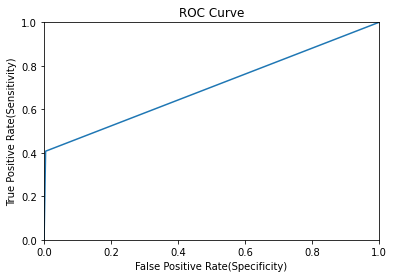

In [ ]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(Fe_SMOT_XGB_false_positive_rate, Fe_SMOT_XGB_true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###### **AUC**

In [ ]:
Fe_SMOT_XGB_roc_auc = auc(Fe_SMOT_XGB_false_positive_rate, Fe_SMOT_XGB_true_positive_rate)
Fe_SMOT_XGB_roc_auc

0.7014598341448178